In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.misc import derivative
from scipy.stats import norm
import seaborn as sns

In [3]:
dfOriginal=pd.read_csv("D:/GUC/Sem5/(NETW504) Random Signals and Noise (466)/Project/UNR-IDD.csv")
df=pd.read_csv("D:/GUC/Sem5/(NETW504) Random Signals and Noise (466)/Project/UNR-IDD.csv")

In [4]:
df.columns=df.columns.str.lower()
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('(', '') for c in df.columns]
df.columns = [c.replace(')', '') for c in df.columns]
df.head()

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,unknown_load/latest,latest_bytes_counter,is_valid,table_id,active_flow_entries,packets_looked_up,packets_matched,max_size,label,binary_label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [5]:
columns=df.columns
print(columns)

Index(['switch_id', 'port_number', 'received_packets', 'received_bytes',
       'sent_bytes', 'sent_packets', 'port_alive_duration_s',
       'packets_rx_dropped', 'packets_tx_dropped', 'packets_rx_errors',
       'packets_tx_errors', 'delta_received_packets', 'delta_received_bytes',
       'delta_sent_bytes', 'delta_sent_packets', 'delta_port_alive_duration_s',
       'delta_packets_rx_dropped', '_delta_packets_tx_dropped',
       'delta_packets_rx_errors', 'delta_packets_tx_errors',
       'connection_point', 'total_load/rate', 'total_load/latest',
       'unknown_load/rate', 'unknown_load/latest', 'latest_bytes_counter',
       'is_valid', 'table_id', 'active_flow_entries', 'packets_looked_up',
       'packets_matched', 'max_size', 'label', 'binary_label'],
      dtype='object')


In [6]:
DataTypes=df.dtypes
print(DataTypes)

switch_id                      object
port_number                    object
received_packets                int64
received_bytes                  int64
sent_bytes                      int64
sent_packets                    int64
port_alive_duration_s           int64
packets_rx_dropped              int64
packets_tx_dropped              int64
packets_rx_errors               int64
packets_tx_errors               int64
delta_received_packets          int64
delta_received_bytes            int64
delta_sent_bytes                int64
delta_sent_packets              int64
delta_port_alive_duration_s     int64
delta_packets_rx_dropped        int64
_delta_packets_tx_dropped       int64
delta_packets_rx_errors         int64
delta_packets_tx_errors         int64
connection_point                int64
total_load/rate                 int64
total_load/latest               int64
unknown_load/rate               int64
unknown_load/latest             int64
latest_bytes_counter            int64
is_valid    

In [7]:
df.isnull().any()

switch_id                      False
port_number                    False
received_packets               False
received_bytes                 False
sent_bytes                     False
sent_packets                   False
port_alive_duration_s          False
packets_rx_dropped             False
packets_tx_dropped             False
packets_rx_errors              False
packets_tx_errors              False
delta_received_packets         False
delta_received_bytes           False
delta_sent_bytes               False
delta_sent_packets             False
delta_port_alive_duration_s    False
delta_packets_rx_dropped       False
_delta_packets_tx_dropped      False
delta_packets_rx_errors        False
delta_packets_tx_errors        False
connection_point               False
total_load/rate                False
total_load/latest              False
unknown_load/rate              False
unknown_load/latest            False
latest_bytes_counter           False
is_valid                       False
t

In [8]:
for col in df.columns:
    temp=df[col]
    for i,j in temp.iteritems():
        if(j==np.inf)|(j==-np.inf):
            print(True)
        

In [9]:
for col in df.columns:
    print("The number of categories in: ",col,"is equal to ",len(df[col].unique()))

The number of categories in:  switch_id is equal to  12
The number of categories in:  port_number is equal to  4
The number of categories in:  received_packets is equal to  9931
The number of categories in:  received_bytes is equal to  26044
The number of categories in:  sent_bytes is equal to  32456
The number of categories in:  sent_packets is equal to  11570
The number of categories in:  port_alive_duration_s is equal to  1206
The number of categories in:  packets_rx_dropped is equal to  1
The number of categories in:  packets_tx_dropped is equal to  1
The number of categories in:  packets_rx_errors is equal to  1
The number of categories in:  packets_tx_errors is equal to  1
The number of categories in:  delta_received_packets is equal to  676
The number of categories in:  delta_received_bytes is equal to  3635
The number of categories in:  delta_sent_bytes is equal to  3476
The number of categories in:  delta_sent_packets is equal to  567
The number of categories in:  delta_port_a

In [10]:
df.max()

switch_id                      of:000000000000000c
port_number                                Port#:4
received_packets                            352772
received_bytes                           271592472
sent_bytes                               239242994
sent_packets                                421598
port_alive_duration_s                         3317
packets_rx_dropped                               0
packets_tx_dropped                               0
packets_rx_errors                                0
packets_tx_errors                                0
delta_received_packets                       15695
delta_received_bytes                       6647966
delta_sent_bytes                           6647970
delta_sent_packets                           15659
delta_port_alive_duration_s                      5
delta_packets_rx_dropped                         0
_delta_packets_tx_dropped                        0
delta_packets_rx_errors                          0
delta_packets_tx_errors        

In [11]:
df.min()

switch_id                      of:0000000000000001
port_number                                Port#:1
received_packets                                 9
received_bytes                                 786
sent_bytes                                    5705
sent_packets                                    41
port_alive_duration_s                           26
packets_rx_dropped                               0
packets_tx_dropped                               0
packets_rx_errors                                0
packets_tx_errors                                0
delta_received_packets                           0
delta_received_bytes                             0
delta_sent_bytes                               278
delta_sent_packets                               2
delta_port_alive_duration_s                      4
delta_packets_rx_dropped                         0
_delta_packets_tx_dropped                        0
delta_packets_rx_errors                          0
delta_packets_tx_errors        

In [12]:
df.mean()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


received_packets               2.161890e+04
received_bytes                 2.647491e+07
sent_bytes                     2.451212e+07
sent_packets                   3.362682e+04
port_alive_duration_s          9.110964e+02
packets_rx_dropped             0.000000e+00
packets_tx_dropped             0.000000e+00
packets_rx_errors              0.000000e+00
packets_tx_errors              0.000000e+00
delta_received_packets         1.949581e+02
delta_received_bytes           3.427001e+05
delta_sent_bytes               3.145126e+05
delta_sent_packets             1.780833e+02
delta_port_alive_duration_s    4.842934e+00
delta_packets_rx_dropped       0.000000e+00
_delta_packets_tx_dropped      0.000000e+00
delta_packets_rx_errors        0.000000e+00
delta_packets_tx_errors        0.000000e+00
connection_point               2.437839e+00
total_load/rate                1.921455e+04
total_load/latest              5.145597e+05
unknown_load/rate              1.921455e+04
unknown_load/latest            5

In [13]:
df.var()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


received_packets               4.261892e+09
received_bytes                 1.371254e+15
sent_bytes                     1.183275e+15
sent_packets                   7.884192e+09
port_alive_duration_s          9.645468e+05
packets_rx_dropped             0.000000e+00
packets_tx_dropped             0.000000e+00
packets_rx_errors              0.000000e+00
packets_tx_errors              0.000000e+00
delta_received_packets         1.181875e+06
delta_received_bytes           1.447523e+12
delta_sent_bytes               1.332209e+12
delta_sent_packets             1.066124e+06
delta_port_alive_duration_s    1.323999e-01
delta_packets_rx_dropped       0.000000e+00
_delta_packets_tx_dropped      0.000000e+00
delta_packets_rx_errors        0.000000e+00
delta_packets_tx_errors        0.000000e+00
connection_point               1.322486e+00
total_load/rate                1.226425e+10
total_load/latest              3.472272e+12
unknown_load/rate              1.226425e+10
unknown_load/latest            3

In [14]:
dfSorted=pd.read_csv("D:/GUC/Sem5/(NETW504) Random Signals and Noise (466)/Project/UNR-IDD.csv")
dfSorted = dfSorted.apply(lambda x: x.sort_values().values)

In [15]:
df1=dfSorted.iloc[:9353,:]
df2=dfSorted.iloc[9353:9352*2+1,:]
df3=dfSorted.iloc[9352*2+1:9352*3+1,:]
df4=dfSorted.iloc[9352*3+1:,:]

In [16]:
df1.head(50)

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:0000000000000001,Port#:1,9,786,5705,41,26,0,0,0,...,0,-1284277,True,0,4,87,37,-1,Blackhole,Attack
1,of:0000000000000001,Port#:1,9,786,5705,41,26,0,0,0,...,0,-645593,True,0,4,87,37,-1,Blackhole,Attack
2,of:0000000000000001,Port#:1,9,786,5705,41,26,0,0,0,...,0,-644624,True,0,4,91,38,-1,Blackhole,Attack
3,of:0000000000000001,Port#:1,9,786,5723,41,26,0,0,0,...,0,-644624,True,0,4,91,38,-1,Blackhole,Attack
4,of:0000000000000001,Port#:1,9,786,5747,41,26,0,0,0,...,0,-642520,True,0,4,102,48,-1,Blackhole,Attack
5,of:0000000000000001,Port#:1,9,786,5775,41,26,0,0,0,...,0,-639866,True,0,4,102,48,-1,Blackhole,Attack
6,of:0000000000000001,Port#:1,10,856,5899,41,26,0,0,0,...,0,-639547,True,0,4,104,50,-1,Blackhole,Attack
7,of:0000000000000001,Port#:1,10,856,5899,41,26,0,0,0,...,0,-639547,True,0,4,104,50,-1,Blackhole,Attack
8,of:0000000000000001,Port#:1,10,856,5899,41,26,0,0,0,...,0,-634732,True,0,4,104,51,-1,Blackhole,Attack
9,of:0000000000000001,Port#:1,10,856,5899,42,26,0,0,0,...,0,-632647,True,0,4,104,51,-1,Blackhole,Attack


In [17]:
max1 = df1.max()
min1 = df1.min()
mean1 = df1.mean()
var1 = df1.var()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/89761371.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean1 = df1.mean()
C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/89761371.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var1 = df1.var()


In [18]:
max2 = df2.max()
min2 = df2.min()
mean2 = df2.mean()
var2 = df2.var()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/1793331324.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean2 = df2.mean()
C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/1793331324.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var2 = df2.var()


In [19]:
max3 = df3.max()
min3 = df3.min()
mean3 = df3.mean()
var3 = df3.var()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/720911455.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean3 = df3.mean()
C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/720911455.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var3 = df3.var()


In [20]:
max4 = df4.max()
min4 = df4.min()
mean4 = df4.mean()
var4 = df4.var()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/3167349163.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean4 = df4.mean()
C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_4332/3167349163.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var4 = df4.var()


In [21]:
df.label.unique()

array(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow', 'Normal',
       'PortScan'], dtype=object)

In [22]:
TCP_SYN=np.zeros((37411,1))
Blackhole=np.zeros((37411,1))
Diversion=np.zeros((37411,1))
Overflow=np.zeros((37411,1))
Normal=np.zeros((37411,1))
PortScan=np.zeros((37411,1))

In [23]:
counter=0
for data in df.label:
    if data=="TCP-SYN":
        TCP_SYN[counter]=1
    elif data=="Blackhole":
        Blackhole[counter]=1
    elif data=="Diversion":
        Diversion[counter]=1
    elif data=="Overflow":
        Overflow[counter]=1
    elif data=="Normal":
        Normal[counter]=1
    elif data=="PortScan":
        PortScan[counter]=1
    counter+=1      


In [24]:
df["TCP-SYN"]=TCP_SYN.astype(np.int64)
df["Blackhole"]=Blackhole.astype(np.int64)
df["Diversion"]=Diversion.astype(np.int64)
df["Overflow"]=Overflow.astype(np.int64)
df["Normal"]=Normal.astype(np.int64)
df["PortScan"]=PortScan.astype(np.int64)

In [25]:
df.head()

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,packets_matched,max_size,label,binary_label,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,688,-1,TCP-SYN,Attack,1,0,0,0,0,0
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,688,-1,TCP-SYN,Attack,1,0,0,0,0,0
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,688,-1,TCP-SYN,Attack,1,0,0,0,0,0
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,688,-1,TCP-SYN,Attack,1,0,0,0,0,0
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,403,-1,TCP-SYN,Attack,1,0,0,0,0,0


In [26]:

print(df.Blackhole.unique())
print(df.Diversion.unique())
print(df.Overflow.unique())
print(df.Normal.unique())
print(df.PortScan.unique())


[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [27]:
df.dtypes

switch_id                      object
port_number                    object
received_packets                int64
received_bytes                  int64
sent_bytes                      int64
sent_packets                    int64
port_alive_duration_s           int64
packets_rx_dropped              int64
packets_tx_dropped              int64
packets_rx_errors               int64
packets_tx_errors               int64
delta_received_packets          int64
delta_received_bytes            int64
delta_sent_bytes                int64
delta_sent_packets              int64
delta_port_alive_duration_s     int64
delta_packets_rx_dropped        int64
_delta_packets_tx_dropped       int64
delta_packets_rx_errors         int64
delta_packets_tx_errors         int64
connection_point                int64
total_load/rate                 int64
total_load/latest               int64
unknown_load/rate               int64
unknown_load/latest             int64
latest_bytes_counter            int64
is_valid    

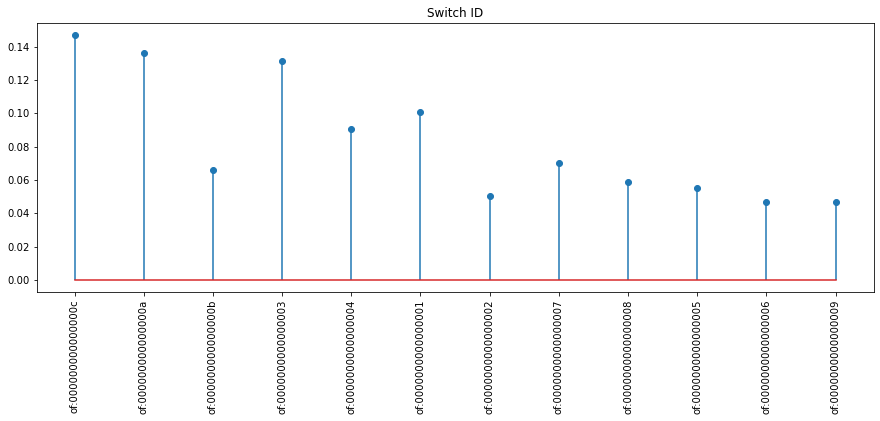

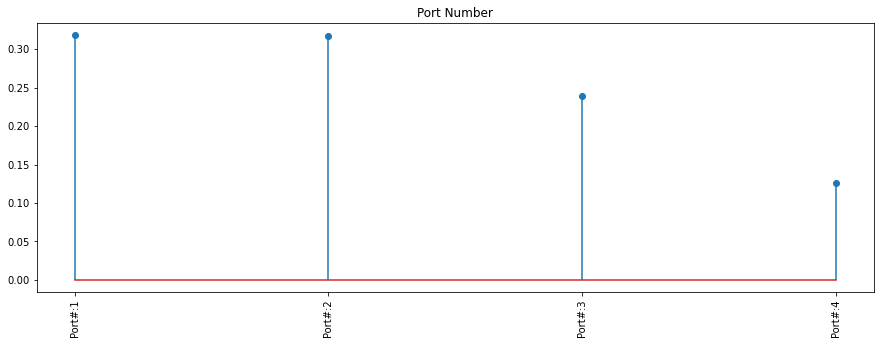

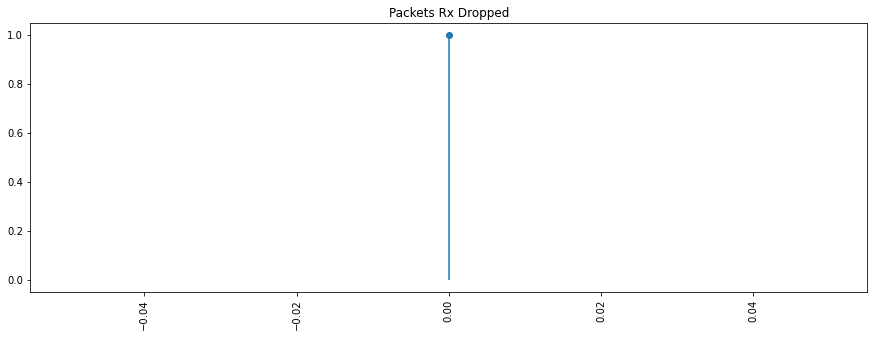

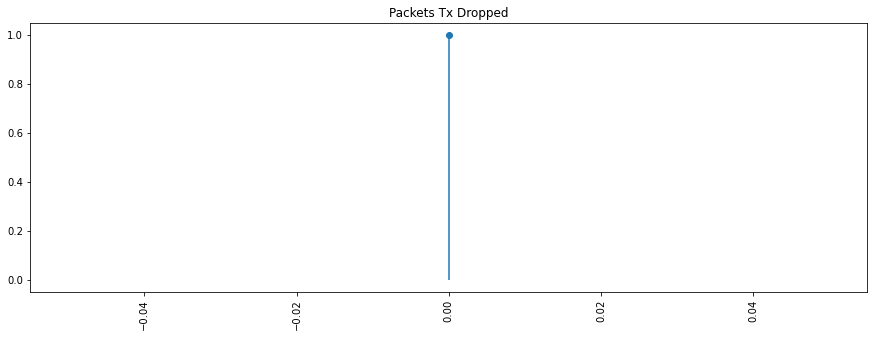

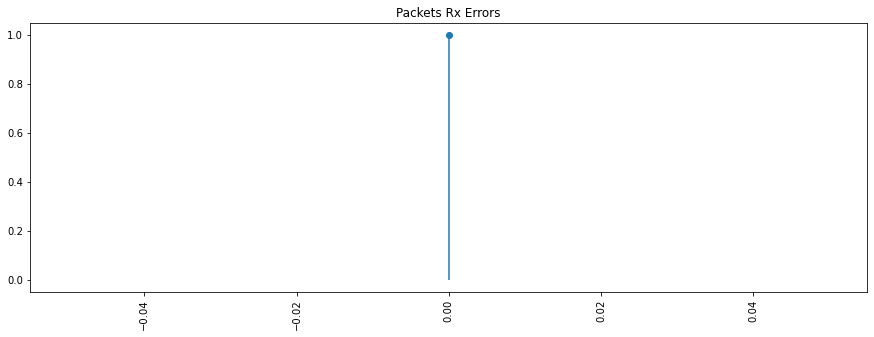

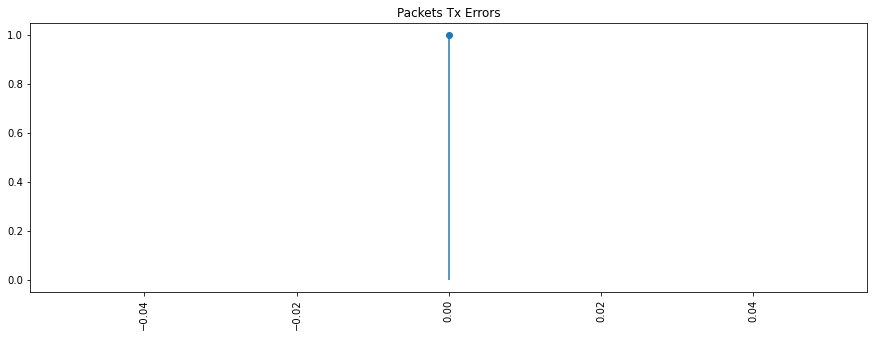

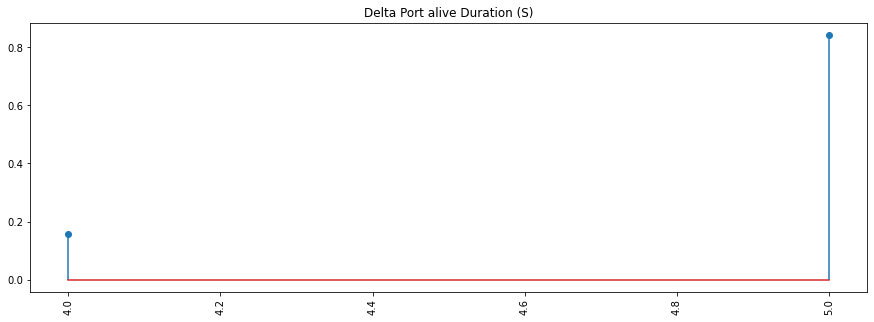

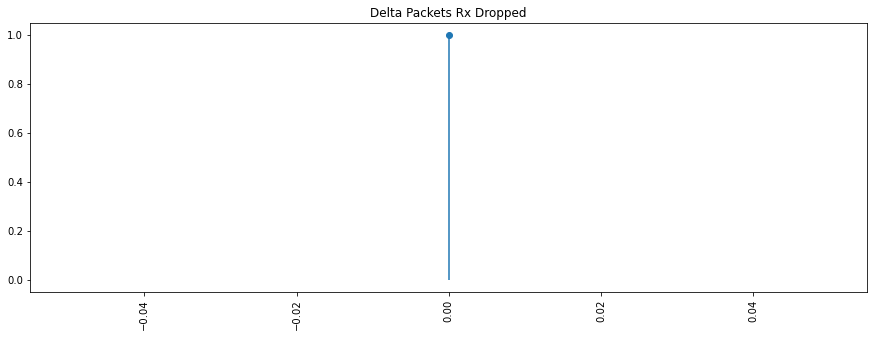

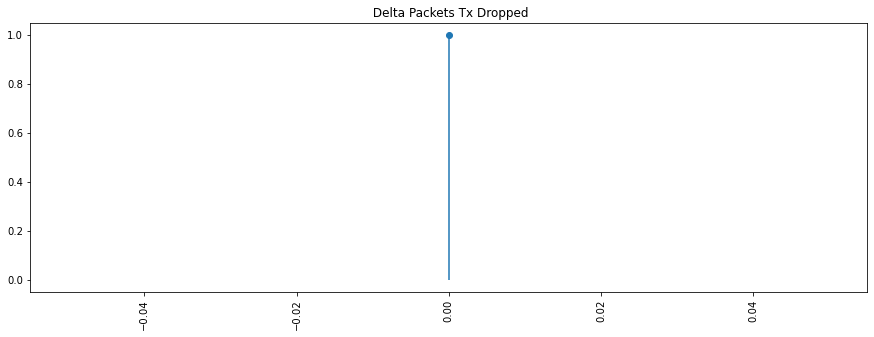

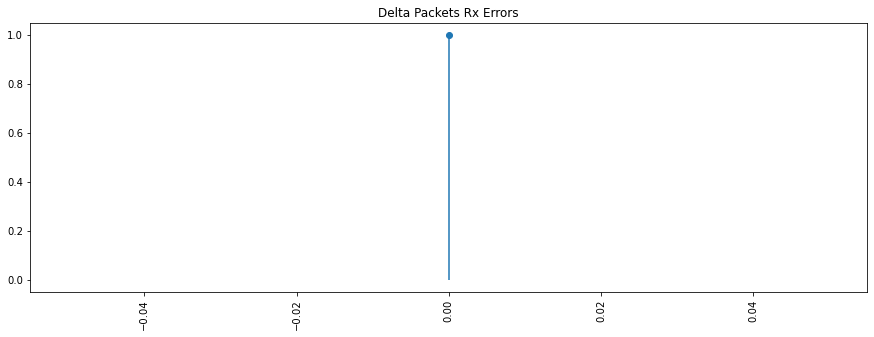

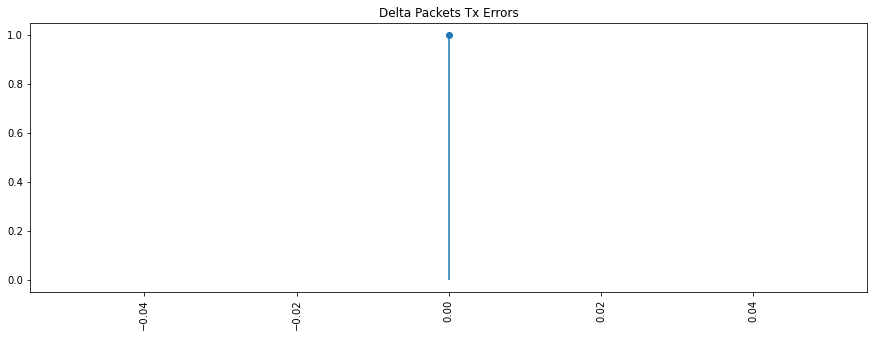

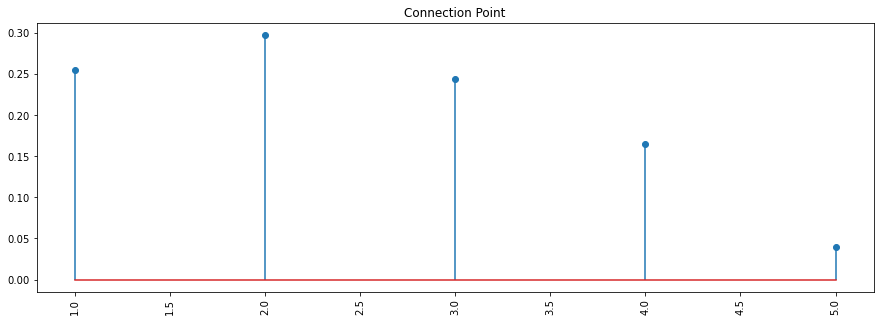

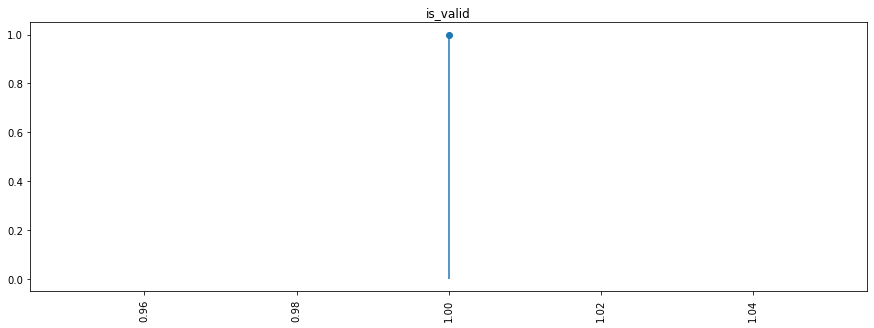

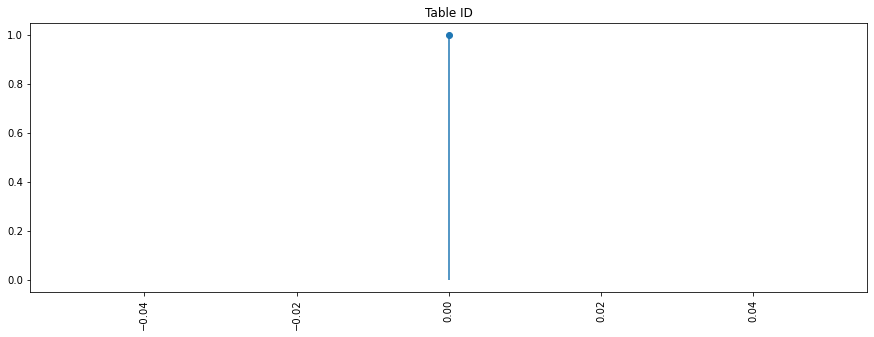

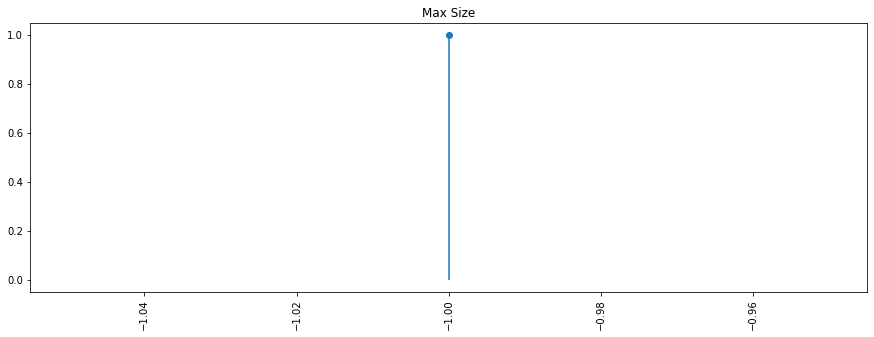

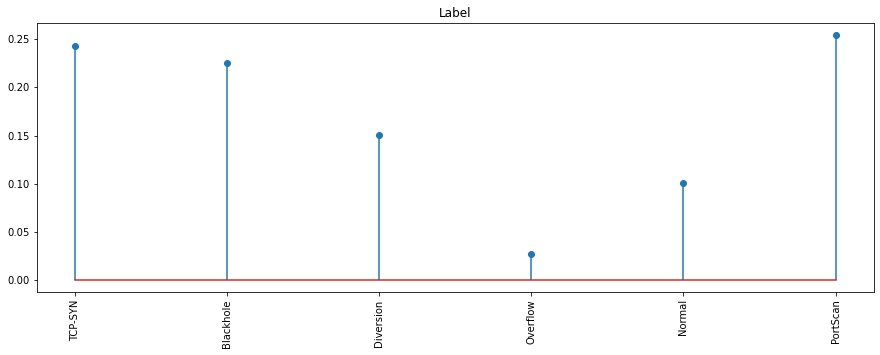

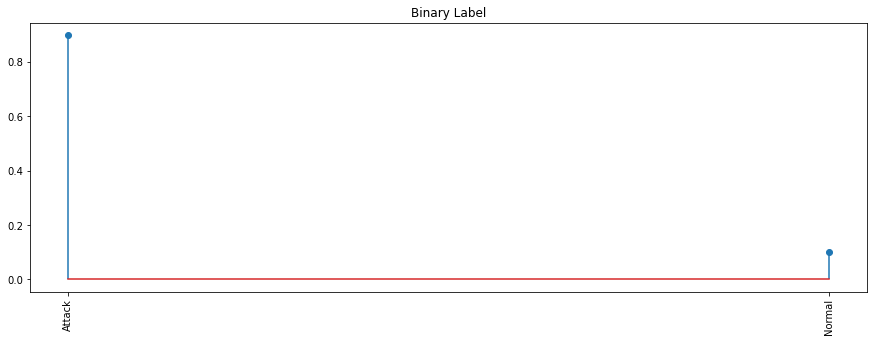

In [28]:
pmfIndex=[0,1,7,8,9,10,15,16,17,18,19,20,26,27,31,32,33]
counter=1
for index in pmfIndex:
    field1 = dfOriginal[dfOriginal.columns[index]].unique()
    prob1 = [0] * len(field1)
    for i in range(len(field1)):
        for data in dfOriginal[dfOriginal.columns[index]]:
            if(data == field1[i]):
                prob1[i] += 1

    for y in range(len(prob1)):
        prob1[y] = prob1[y]/len(dfOriginal)
    plt.figure(figsize=(15,100))
    plt.subplot(17, 1, counter)
    plt.xticks(rotation=90)
    plt.title(dfOriginal.columns[index])
    plt.stem(field1, prob1)
    plt.show()
    counter+=1

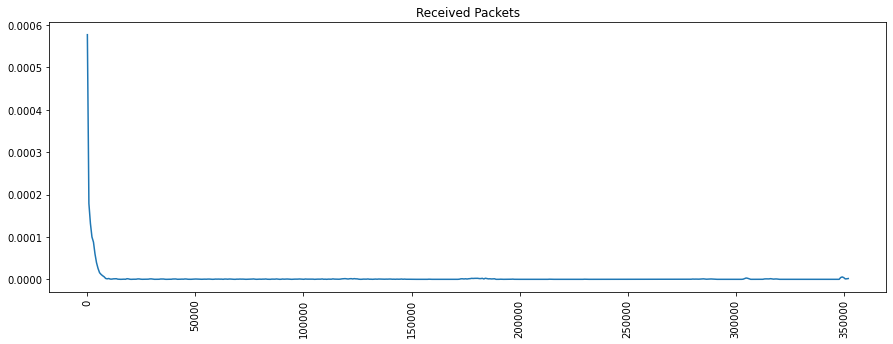

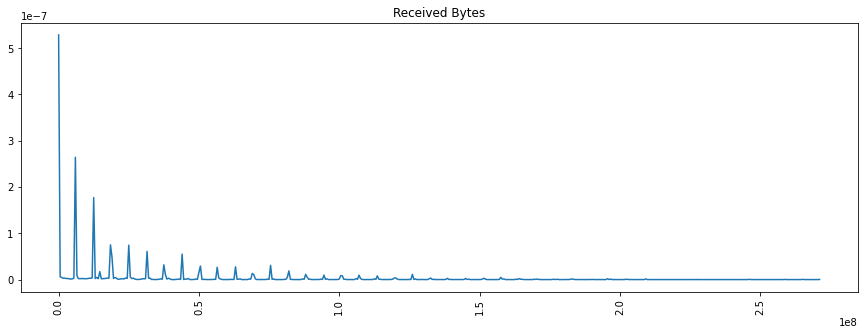

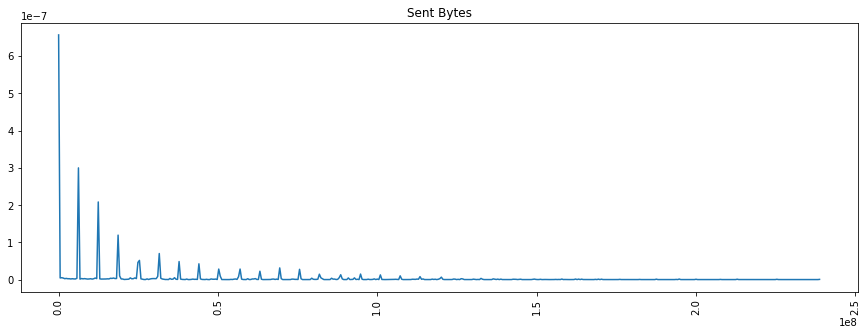

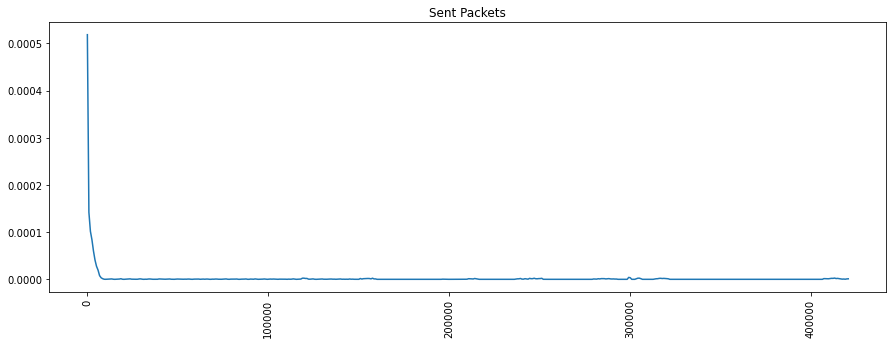

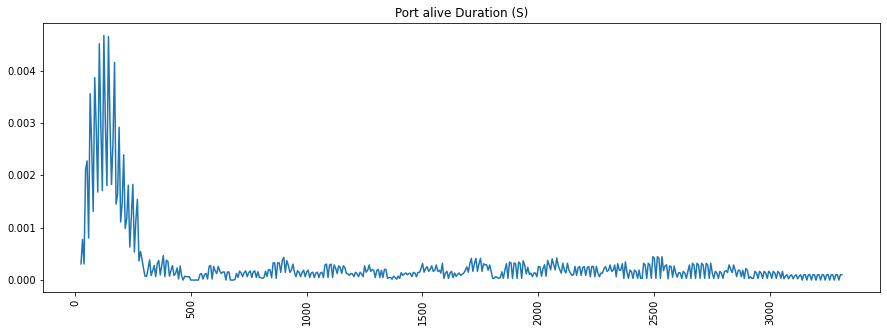

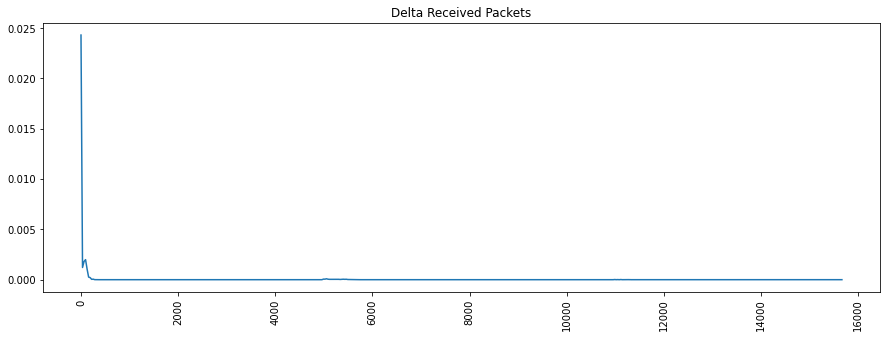

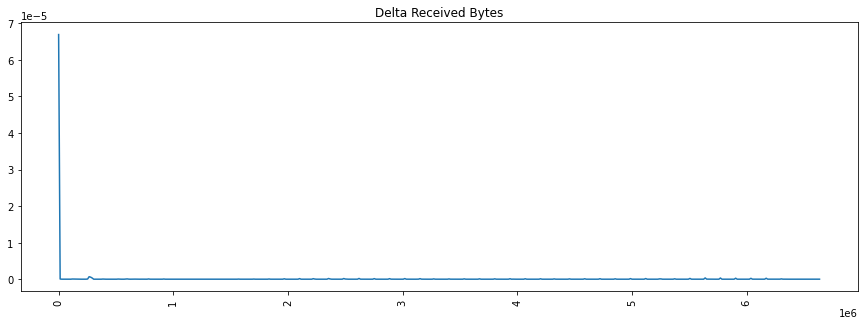

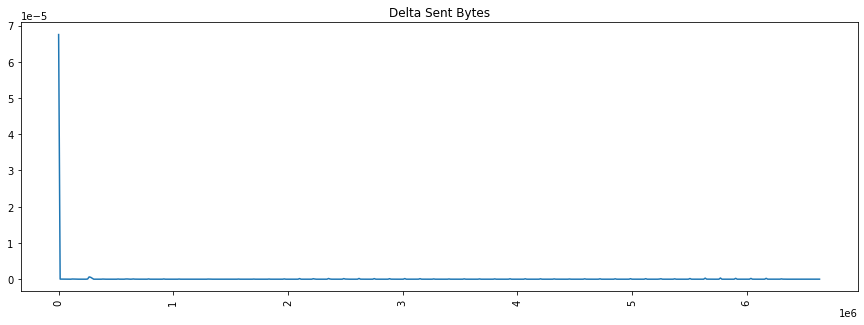

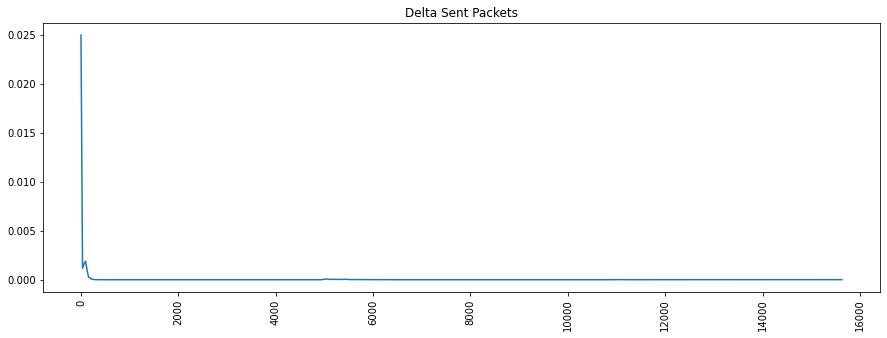

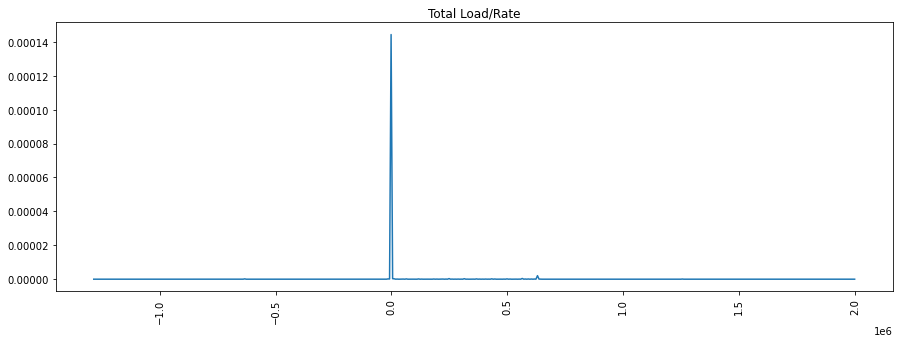

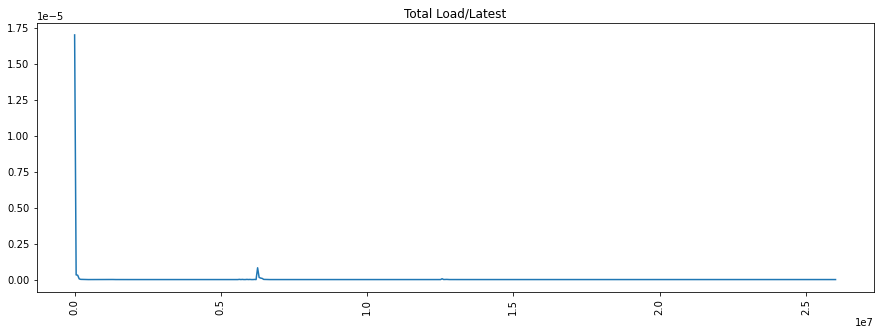

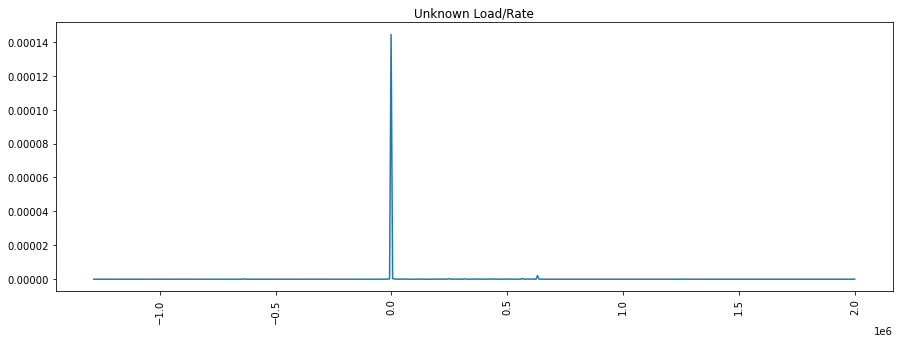

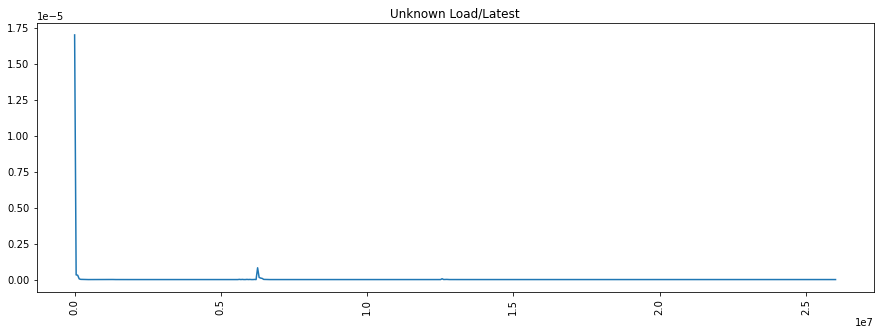

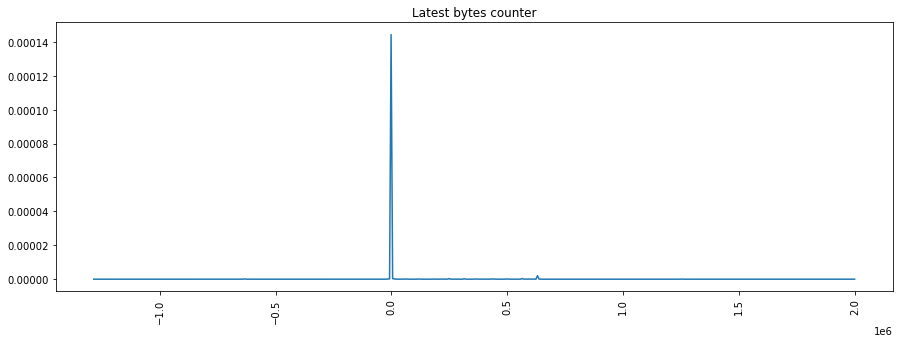

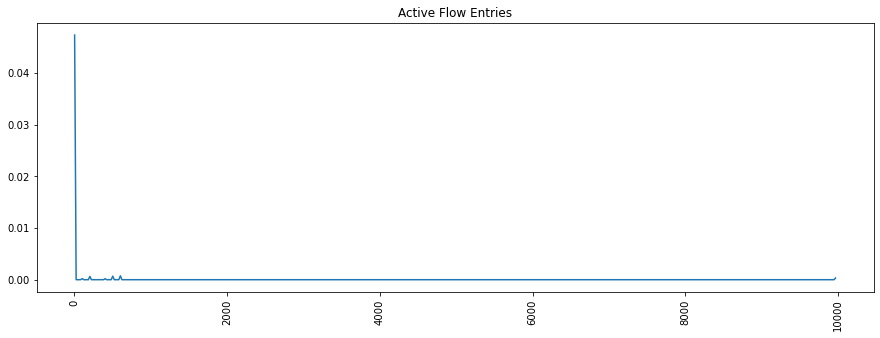

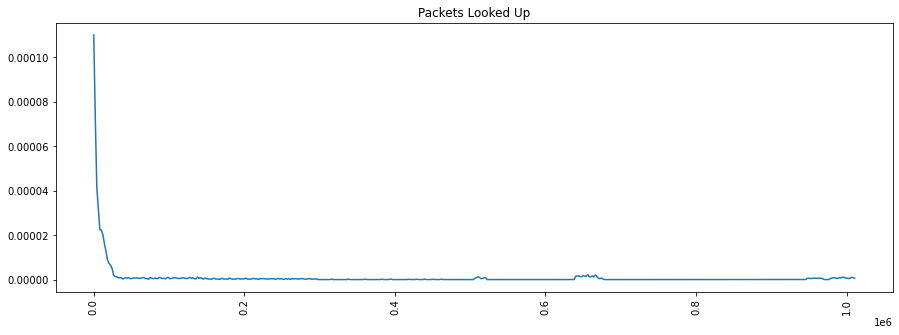

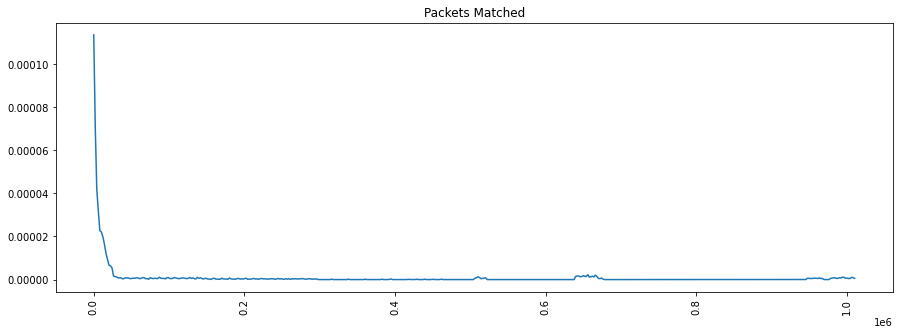

In [29]:
pdfIndex=[2,3,4,5,6,11,12,13,14,21,22,23,24,25,28,29,30]
counter=1
for index in pdfIndex:
    field7=dfOriginal[dfOriginal.columns[index]].sort_values()
    x,y= np.histogram(field7,bins=500,density=True)
#     mean7=np.mean(field7)
#     std7=np.std(field7)
#     pdf7= stats.norm.pdf(field7.sort_values(), mean7, std7)
    plt.figure(figsize=(15,100))
    plt.subplot(17, 1, counter)
    plt.xticks(rotation=90)
    plt.title(dfOriginal.columns[index])
    plt.plot(y[:-1],x)
    counter+=1

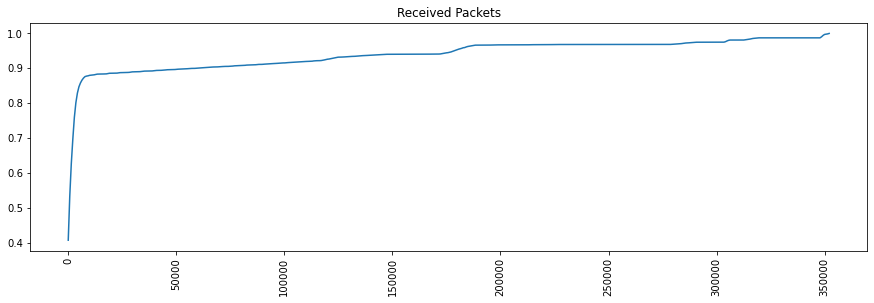

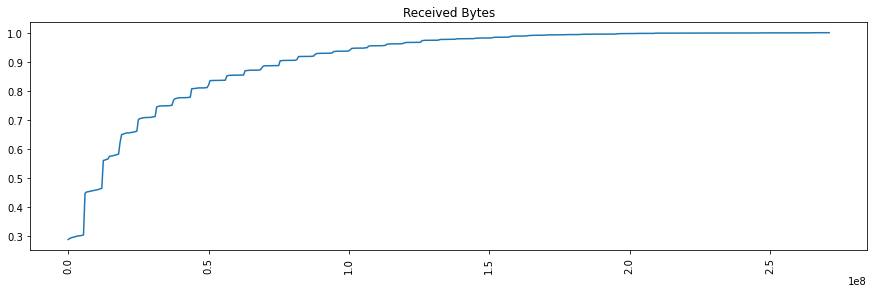

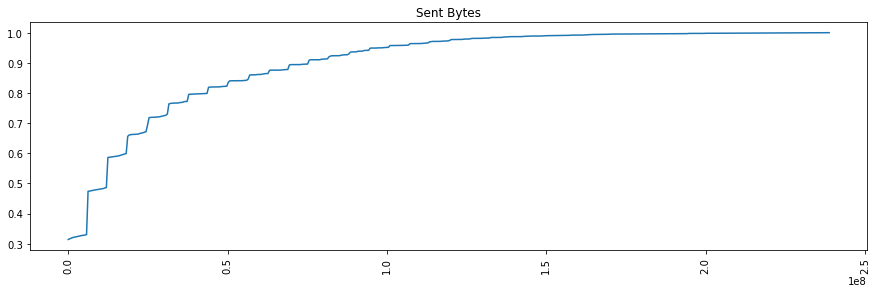

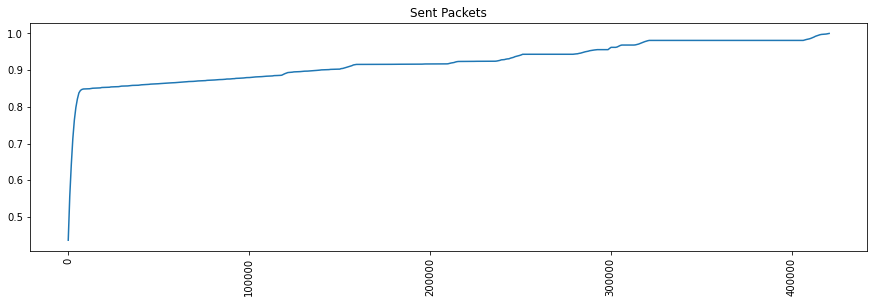

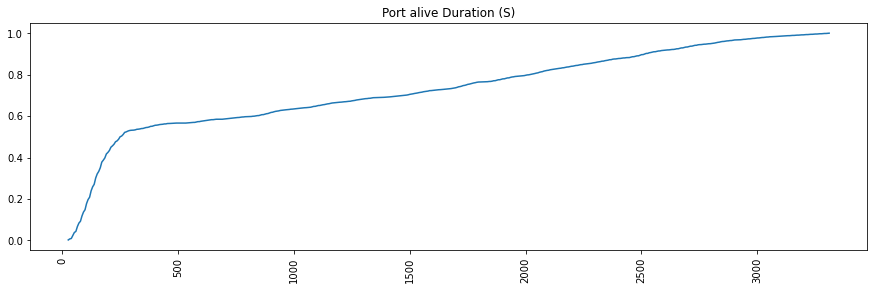

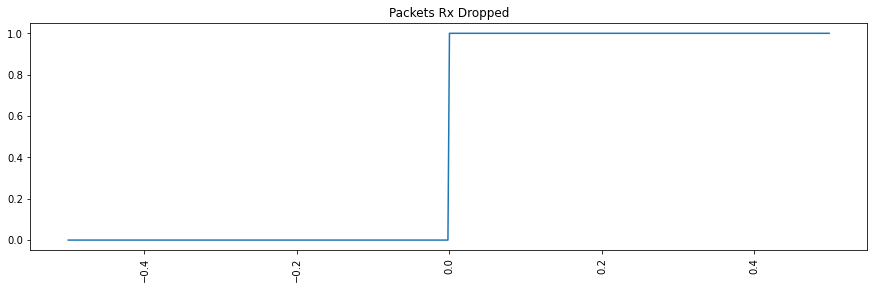

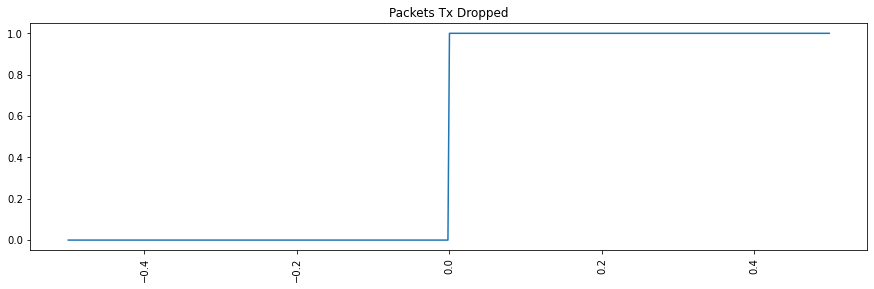

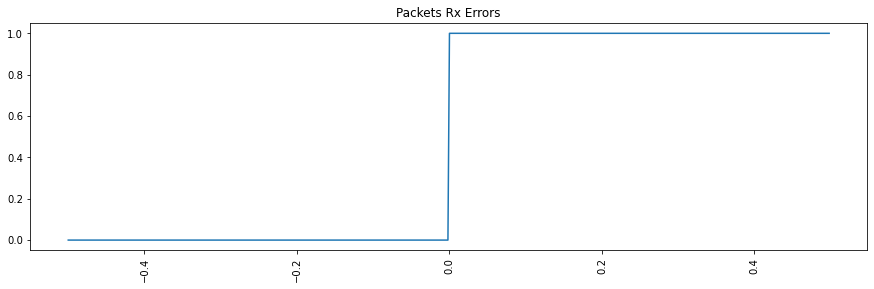

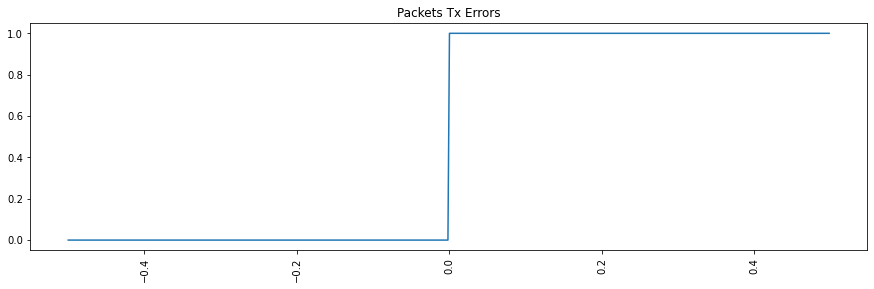

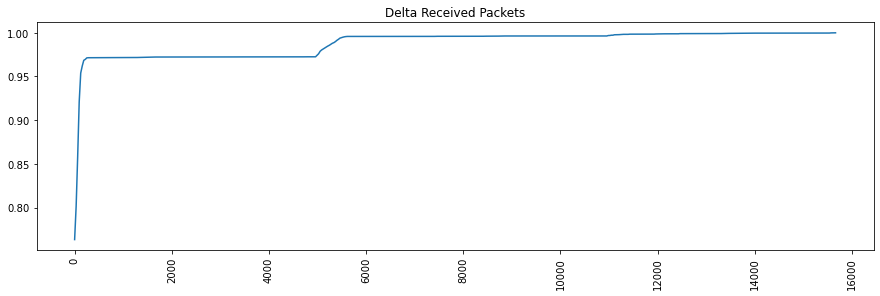

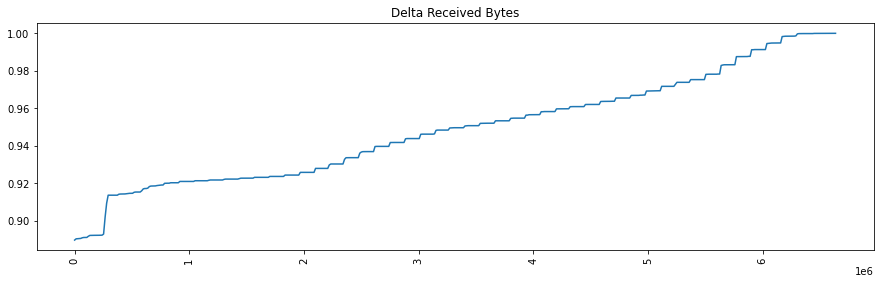

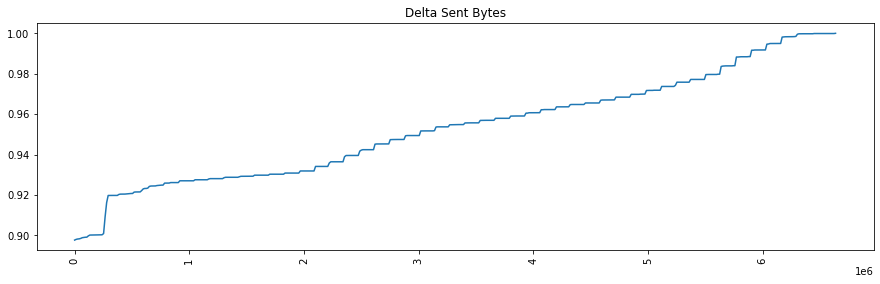

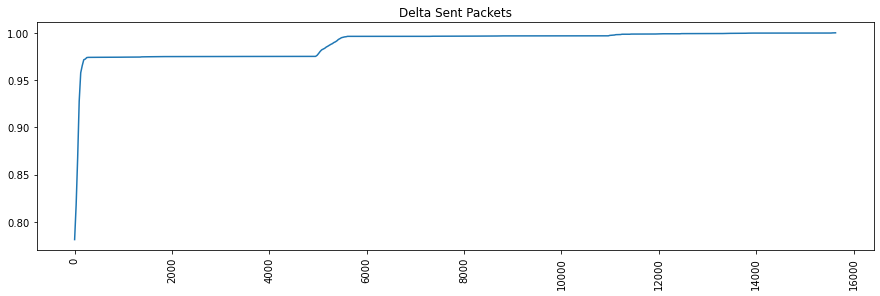

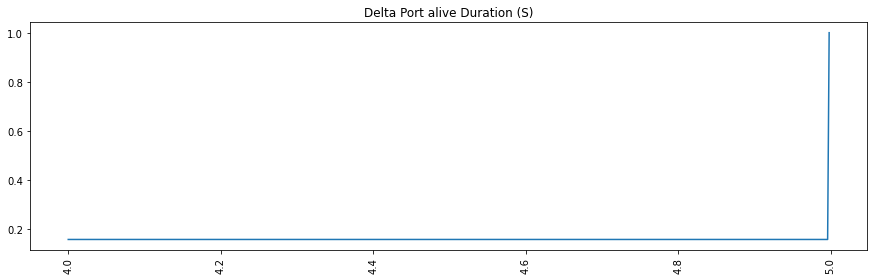

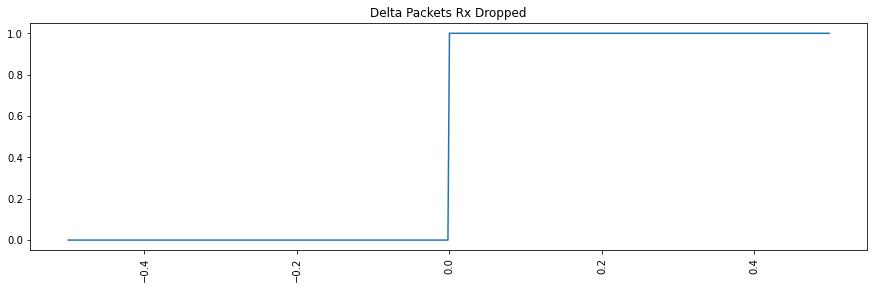

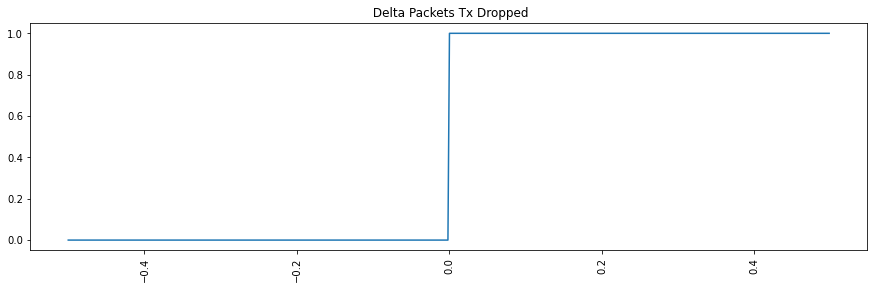

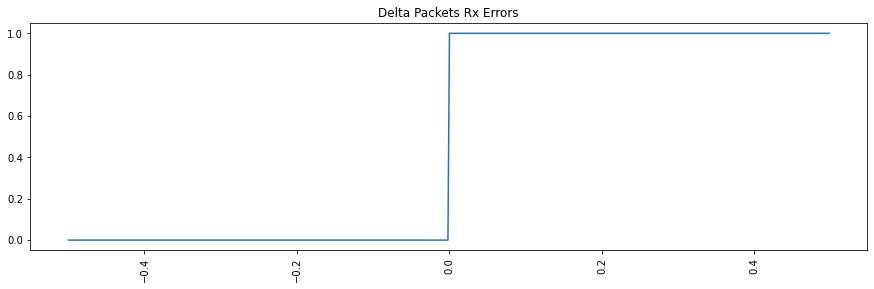

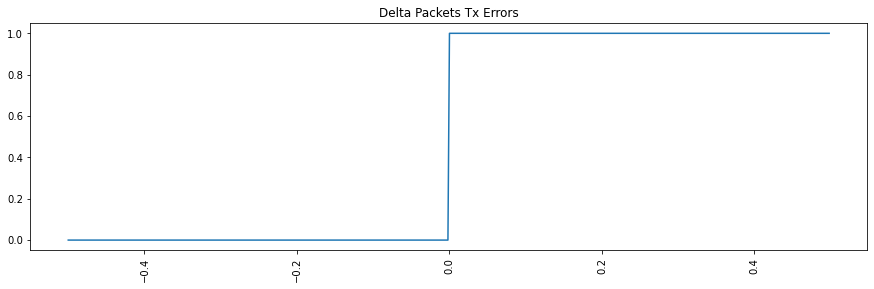

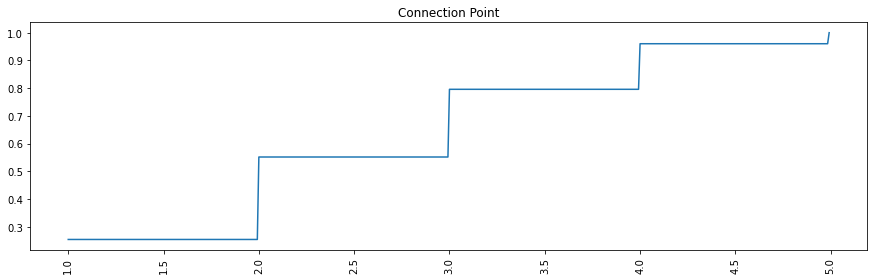

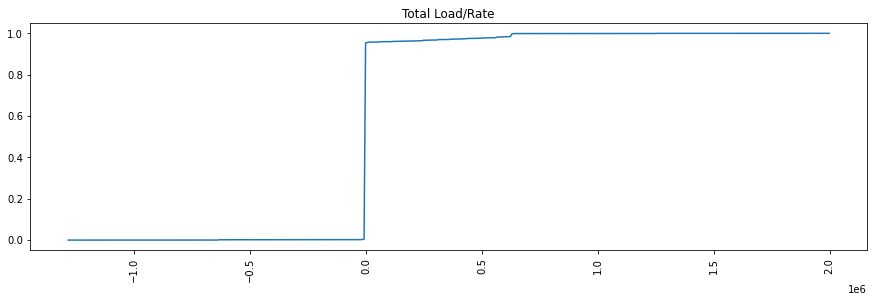

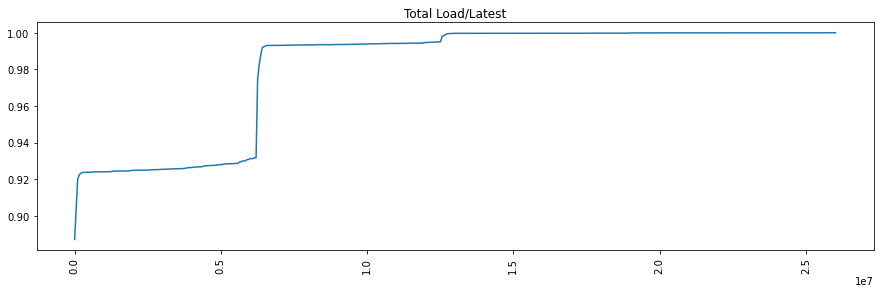

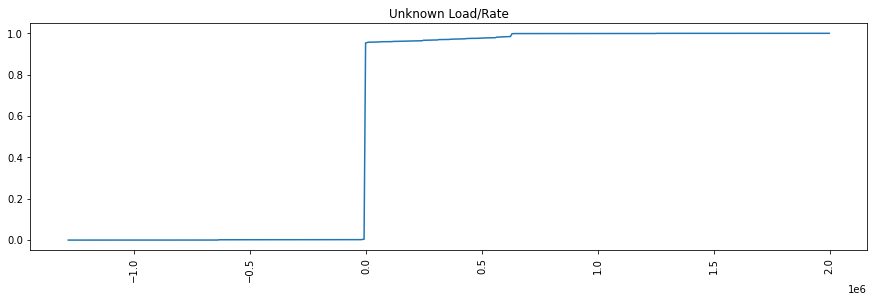

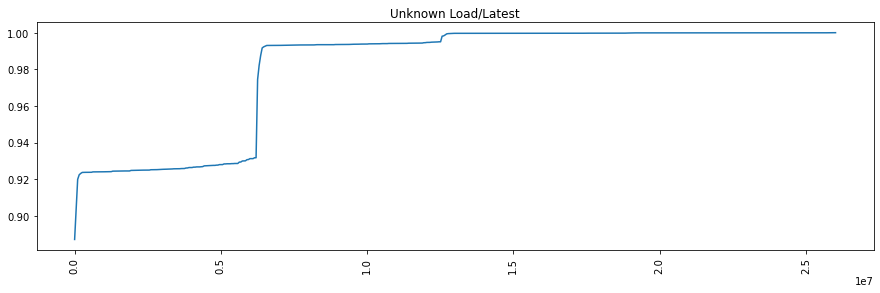

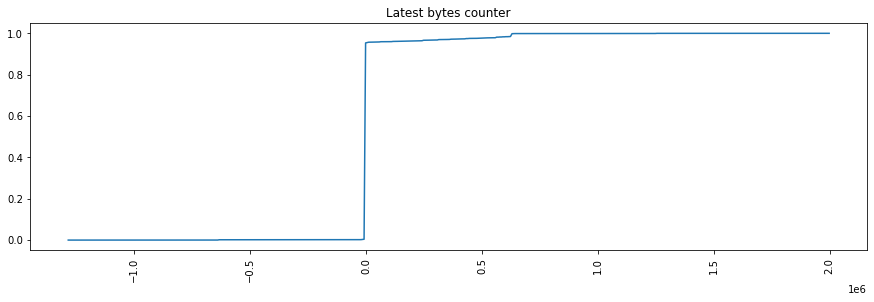

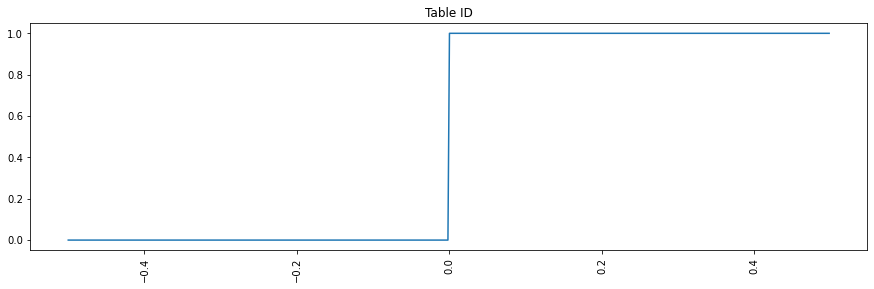

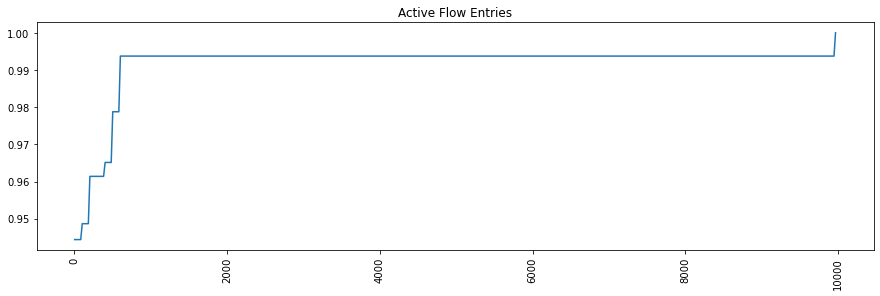

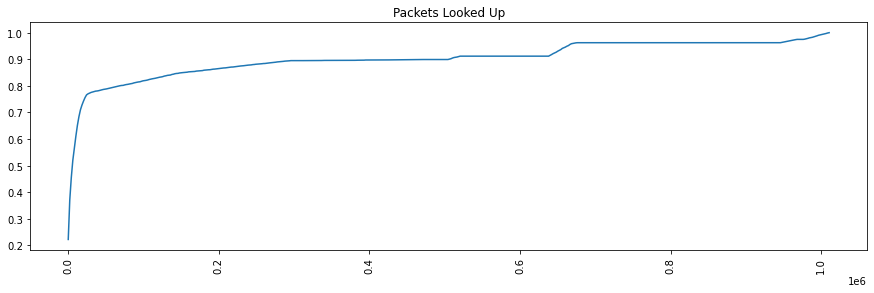

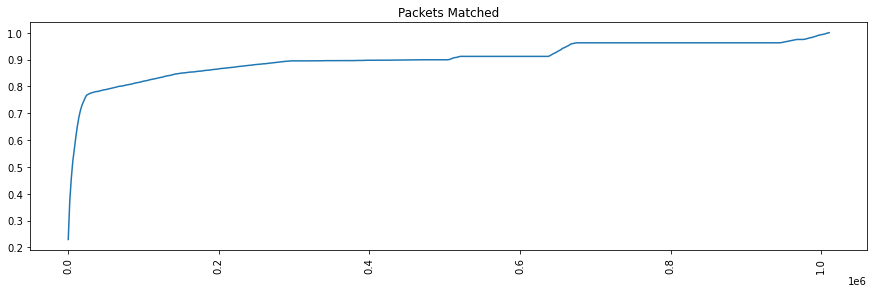

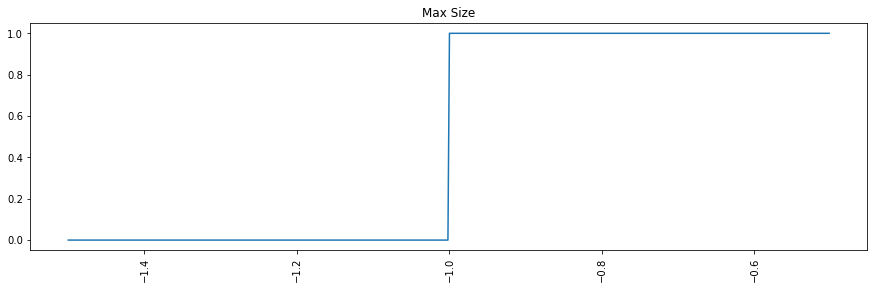

In [30]:
counter = 1
for col in dfOriginal.columns:
    field7=dfOriginal[col].sort_values()
    if field7.dtype=="int64":
        mean7=np.mean(field7)
        std7=np.std(field7)
        x,y= np.histogram(field7,bins=500)
        plt.figure(figsize=(15,200))
        plt.subplot(40, 1, counter)
        plt.plot(y[:-1],np.cumsum(x/len(df)))
        plt.xticks(rotation=90)
        plt.title(col)
        plt.show()
        counter+=1

In [31]:
dfa = dfOriginal.loc[ :9080 , :] # TCP-SYN
dfb = dfOriginal.loc[9081:17500 , :] # Blackhole
dfc = dfOriginal.loc[17501 : 23115, :] # Diversion
dfd = dfOriginal.loc[23116 : 24137, :] # Overflow
dfe = dfOriginal.loc[24138 :27910 , :] # Normal
dff = dfOriginal.loc[27911 : , :] # PortScann

In [32]:
dfa.columns=dfa.columns.str.lower()
dfa.columns = [c.replace(' ', '_') for c in dfa.columns]
dfa.columns = [c.replace('(', '') for c in dfa.columns]
dfa.columns = [c.replace(')', '') for c in dfa.columns]
dfb.columns=dfb.columns.str.lower()
dfb.columns = [c.replace(' ', '_') for c in dfb.columns]
dfb.columns = [c.replace('(', '') for c in dfb.columns]
dfb.columns = [c.replace(')', '') for c in dfb.columns]
dfc.columns=dfa.columns.str.lower()
dfc.columns = [c.replace(' ', '_') for c in dfc.columns]
dfc.columns = [c.replace('(', '') for c in dfc.columns]
dfc.columns = [c.replace(')', '') for c in dfc.columns]
dfd.columns=dfa.columns.str.lower()
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.columns = [c.replace('(', '') for c in dfd.columns]
dfd.columns = [c.replace(')', '') for c in dfd.columns]
dfe.columns=dfa.columns.str.lower()
dfe.columns = [c.replace(' ', '_') for c in dfe.columns]
dfe.columns = [c.replace('(', '') for c in dfe.columns]
dfe.columns = [c.replace(')', '') for c in dfe.columns]
dff.columns=dfa.columns.str.lower()
dff.columns = [c.replace(' ', '_') for c in dff.columns]
dff.columns = [c.replace('(', '') for c in dff.columns]
dff.columns = [c.replace(')', '') for c in dff.columns]

In [33]:
dfa["label"].unique()

array(['TCP-SYN'], dtype=object)

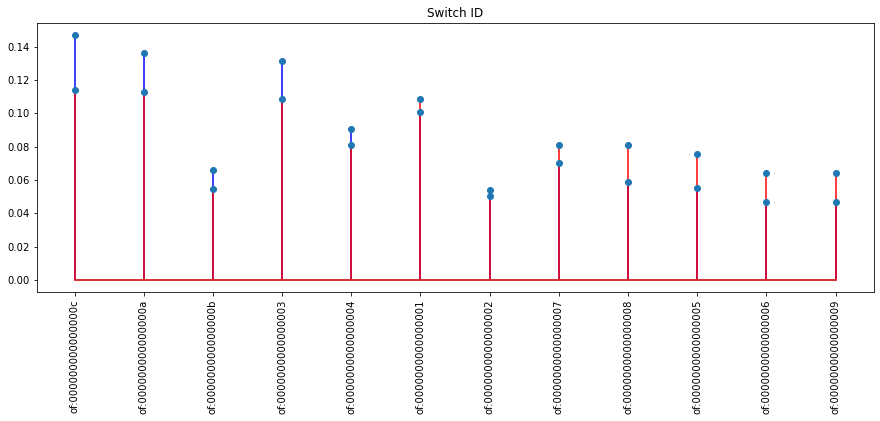

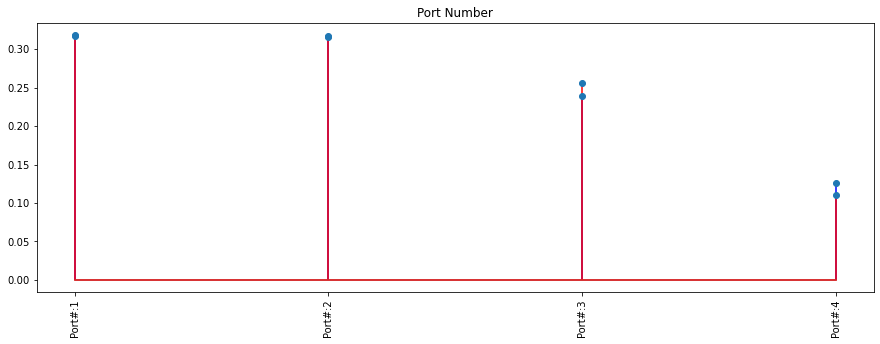

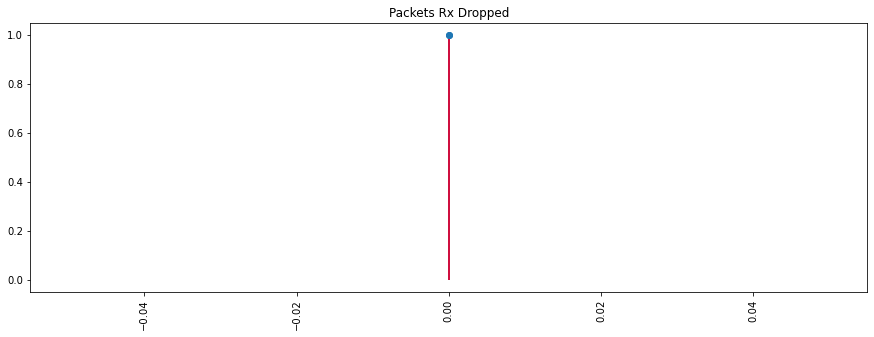

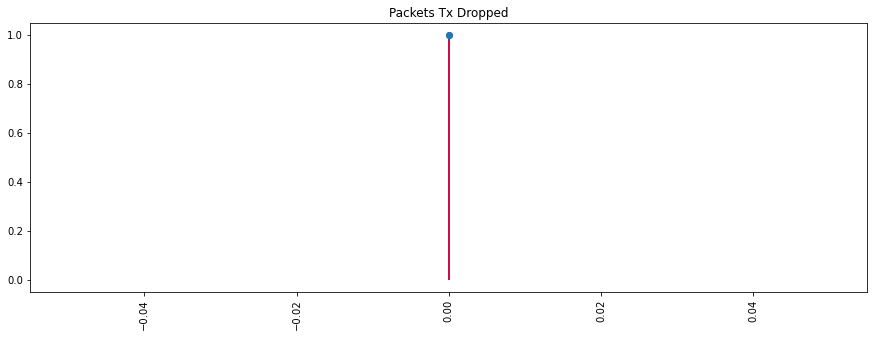

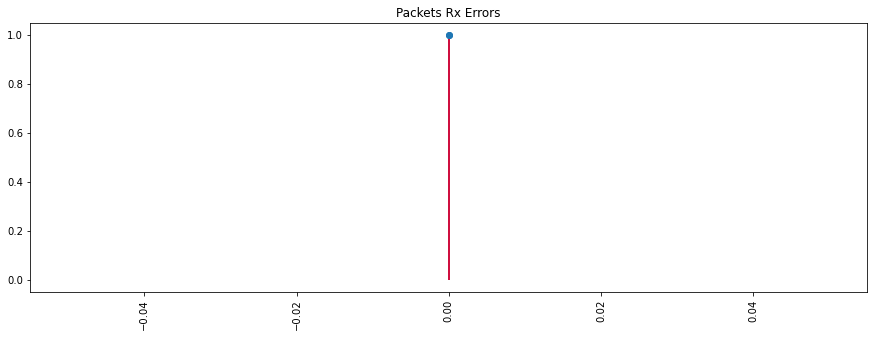

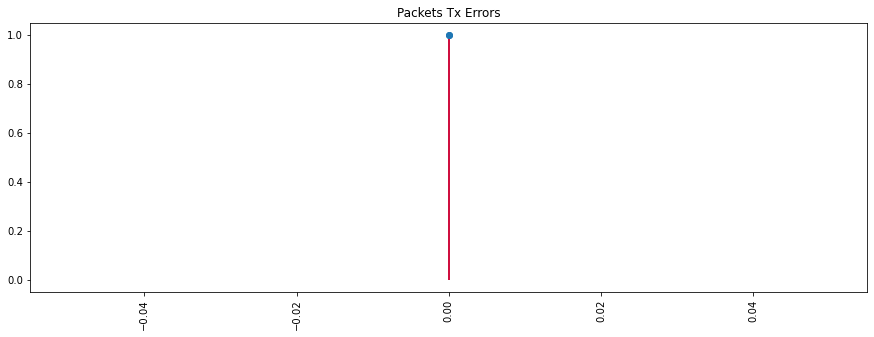

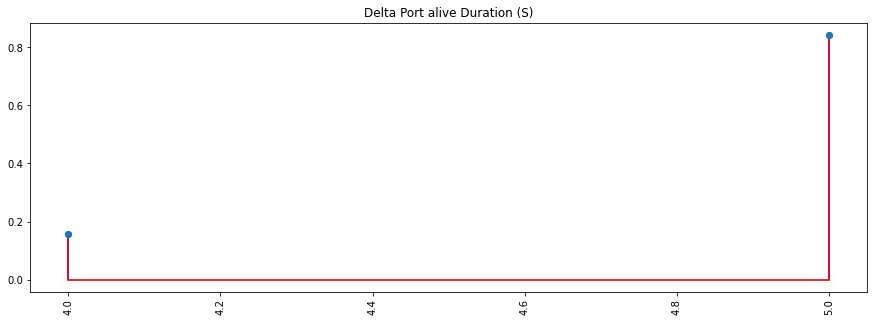

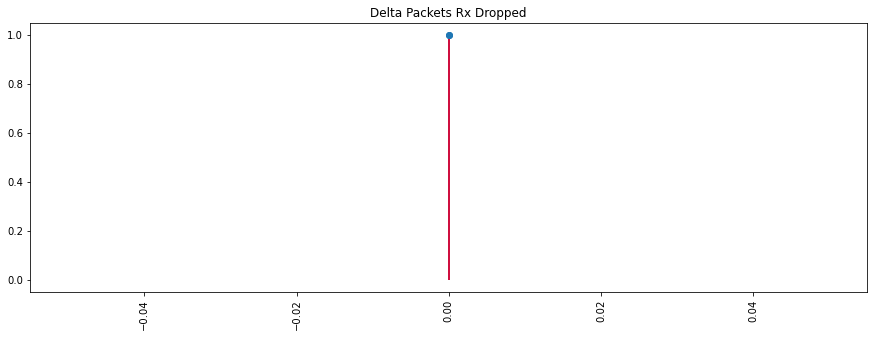

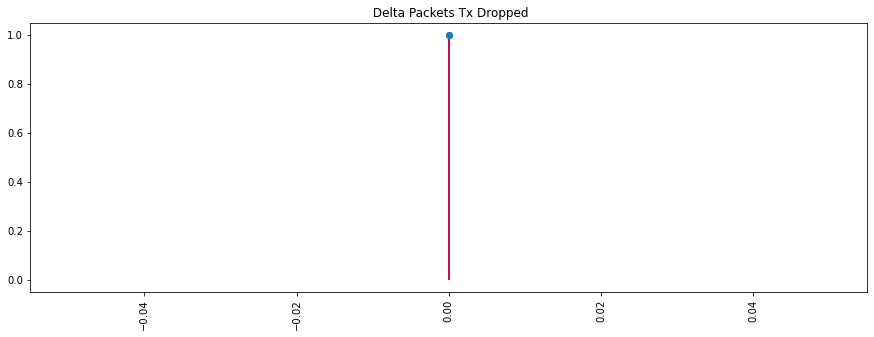

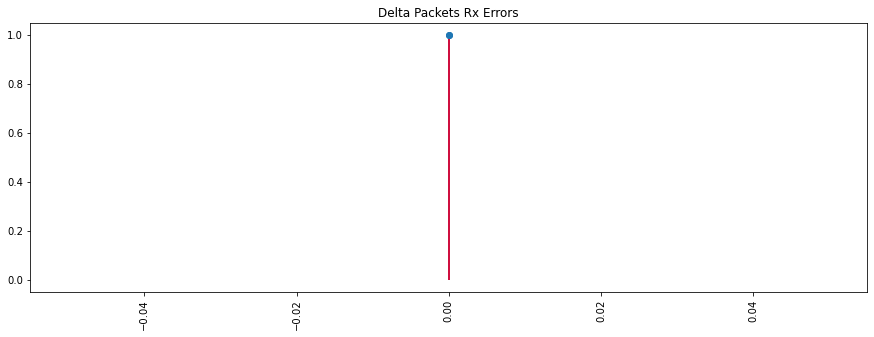

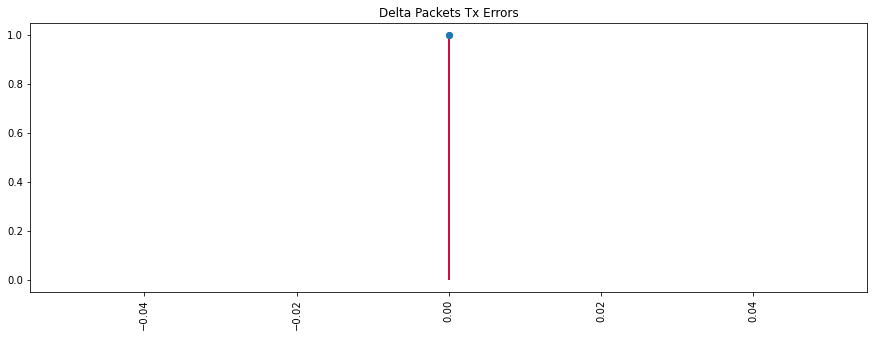

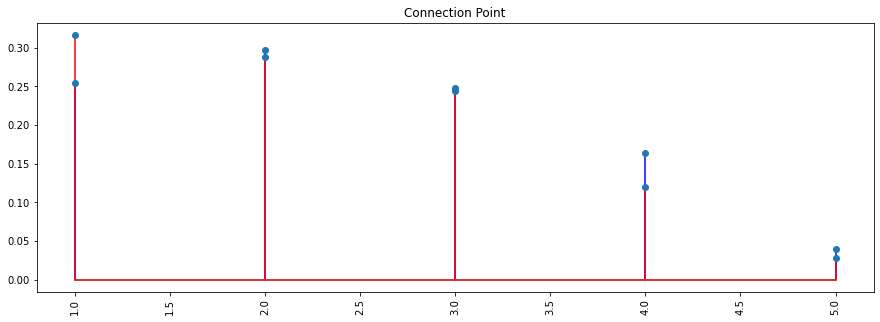

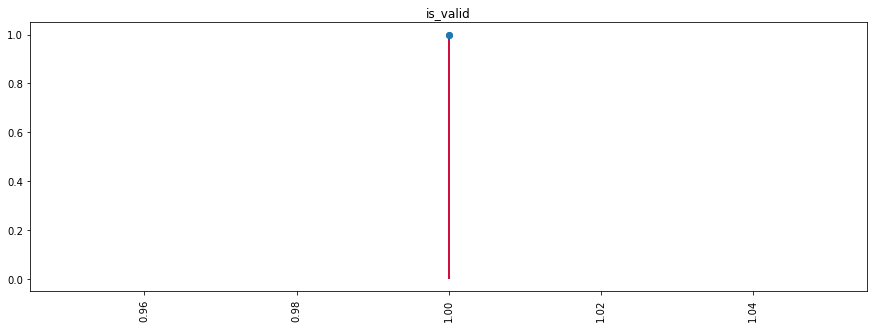

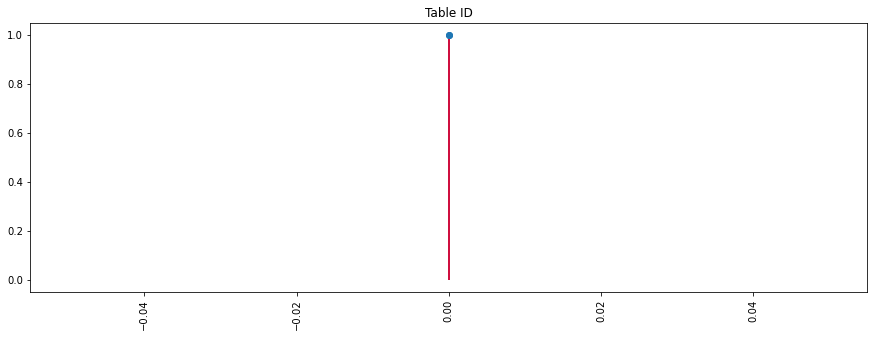

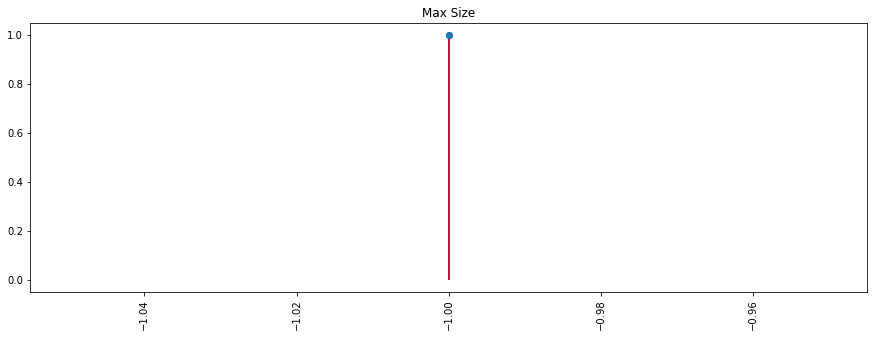

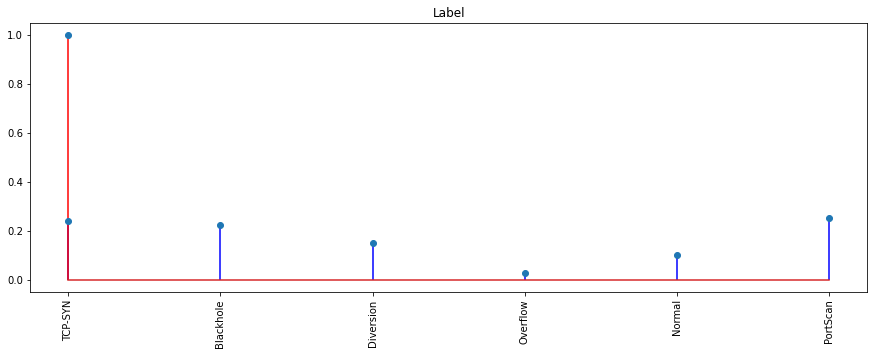

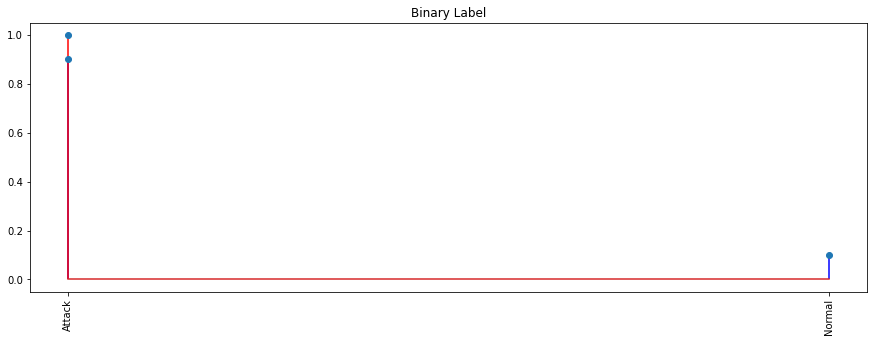

In [34]:
pmfIndex=[0,1,7,8,9,10,15,16,17,18,19,20,26,27,31,32,33]  #given TCP-SYN
counter=1
for index in pmfIndex:
    field1 = dfOriginal[dfOriginal.columns[index]].unique()
    prob1 = [0] * len(field1)
    for i in range(len(field1)):
        for data in dfOriginal[dfOriginal.columns[index]]:
            if(data == field1[i]):
                prob1[i] += 1

    for y in range(len(prob1)):
        prob1[y] = prob1[y]/len(dfOriginal)

    field2 = dfa[dfa.columns[index]].unique()
    prob2 = [0] * len(field2)
    for i in range(len(field2)):
        for data in dfa[dfa.columns[index]]:
            if(data == field2[i]):
                prob2[i] += 1

    for y in range(len(prob2)):
        prob2[y] = prob2[y]/len(dfa)

    plt.figure(figsize=(15,100))
    plt.subplot(17, 1, counter)
    plt.xticks(rotation=90)
    plt.title(dfOriginal.columns[index])
    plt.stem(field1, prob1, 'b')
    plt.stem(field2, prob2,'r')
    plt.show()
    counter+=1

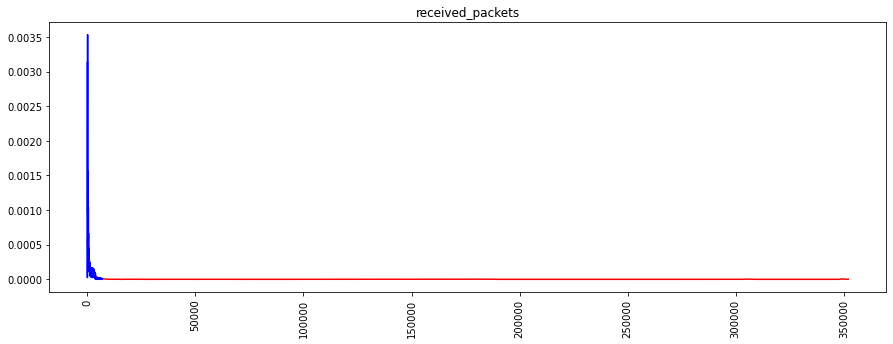

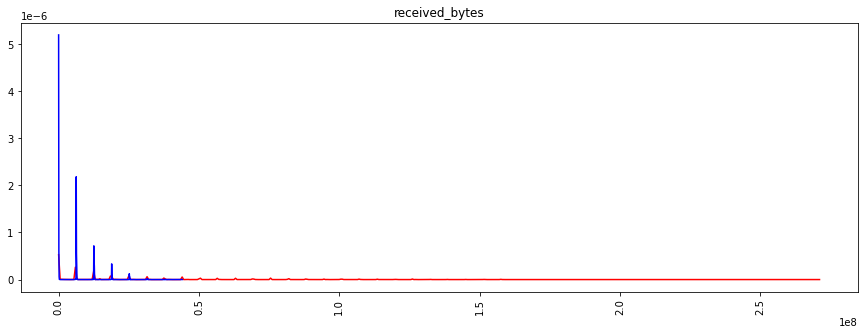

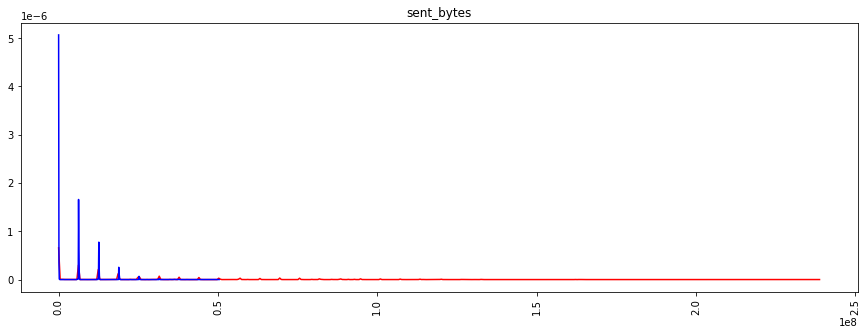

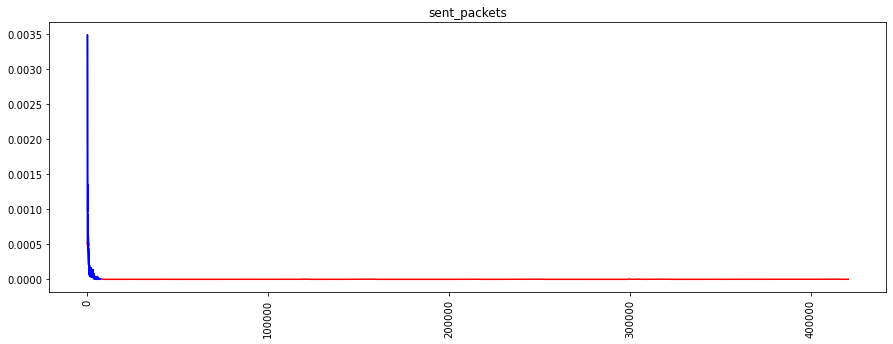

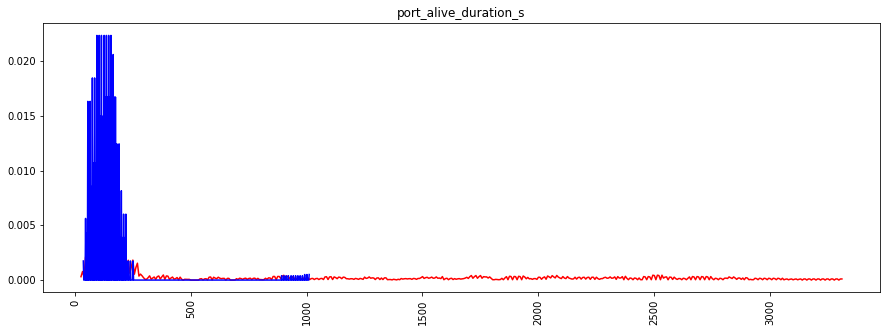

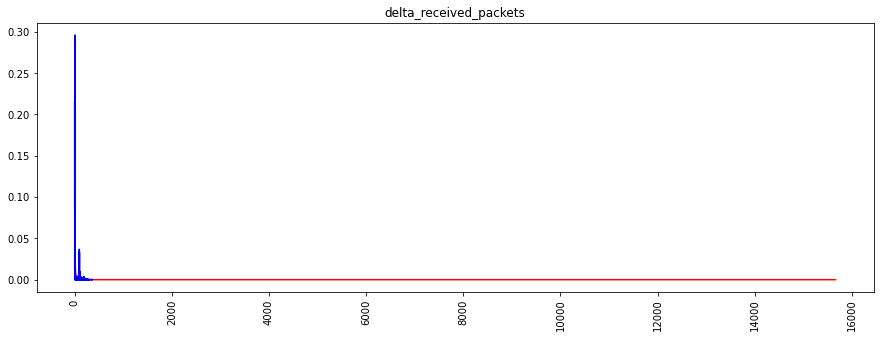

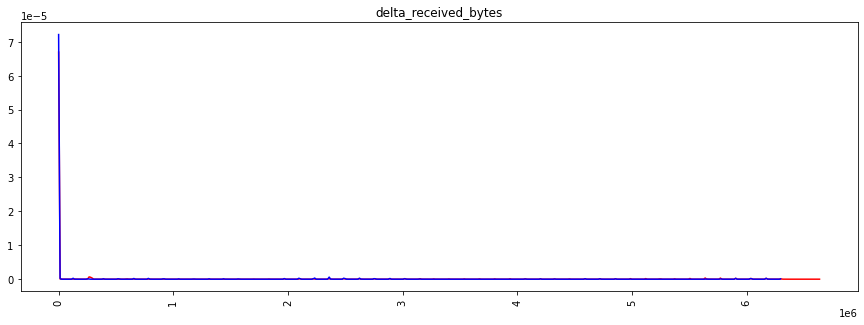

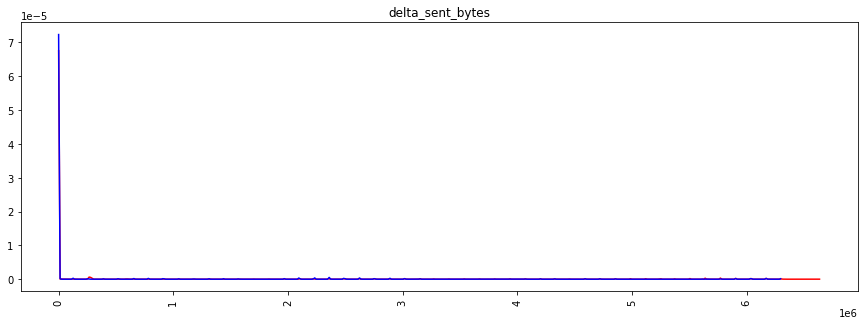

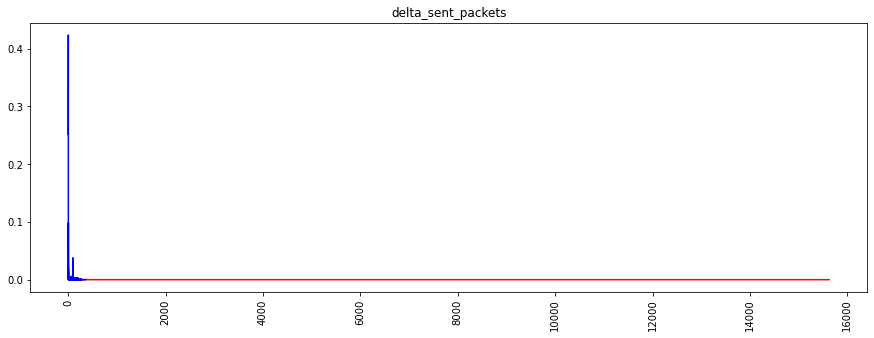

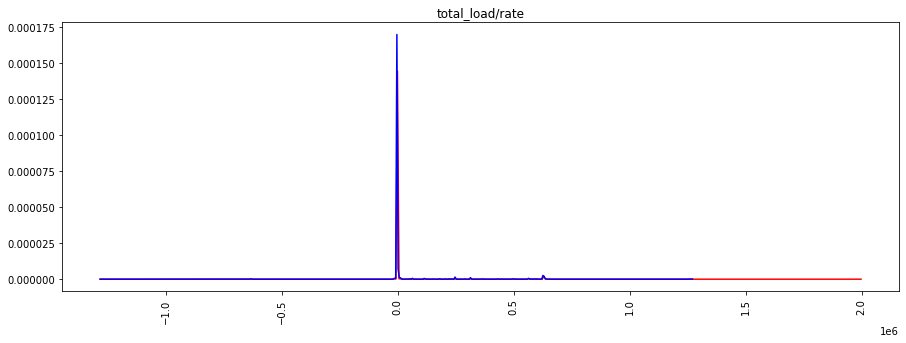

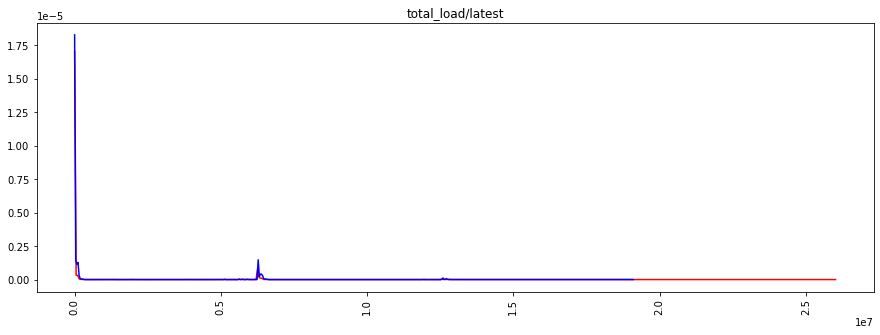

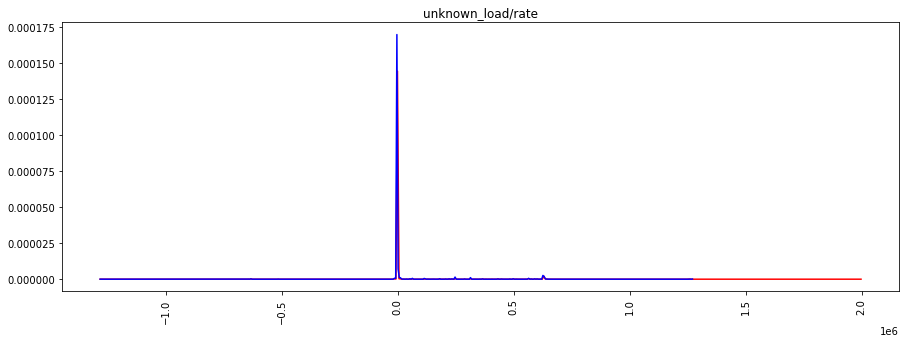

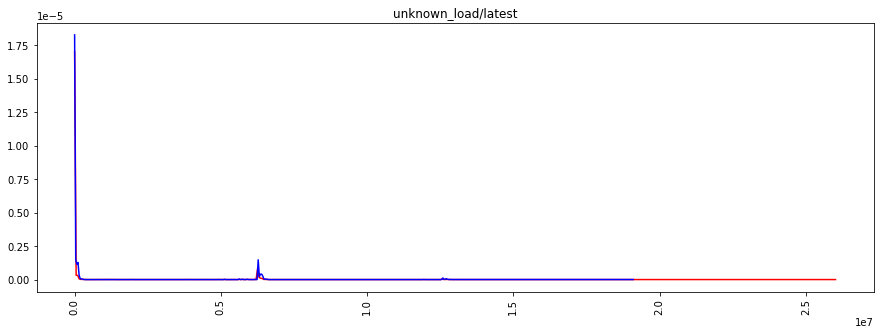

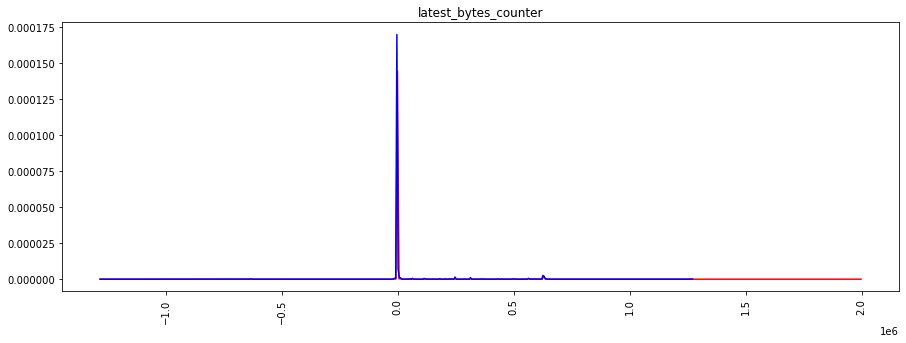

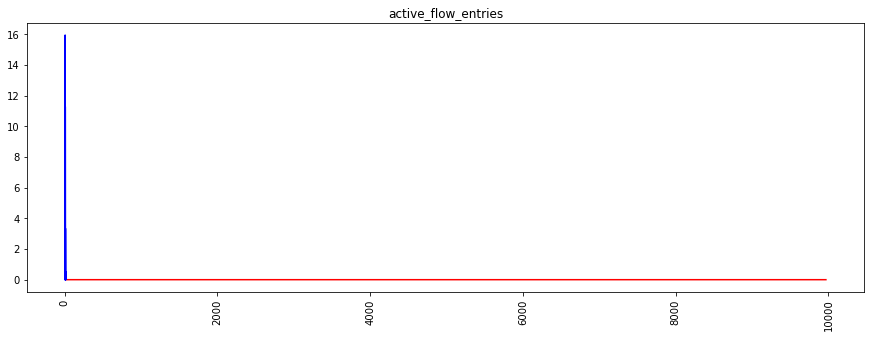

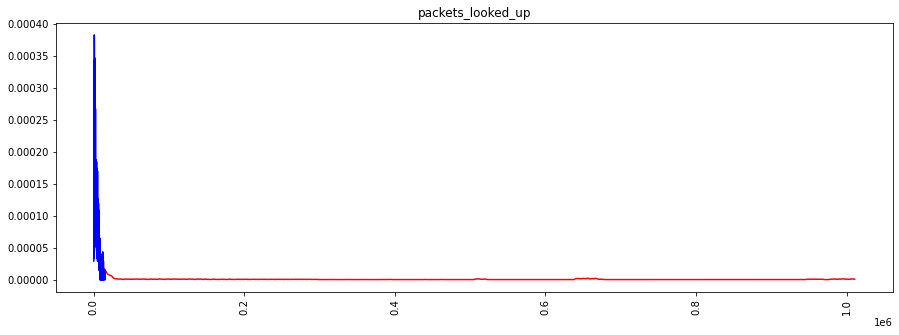

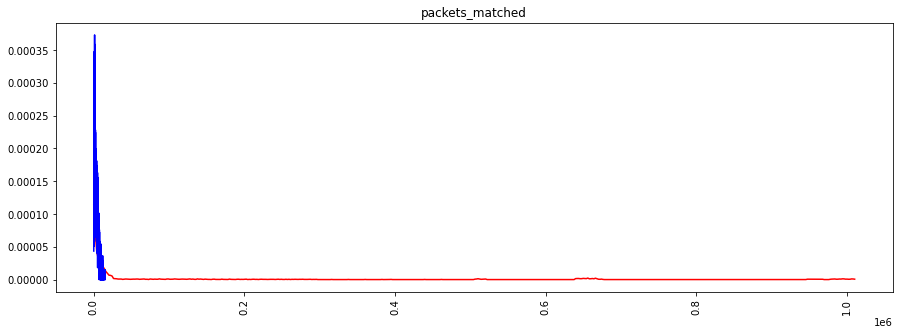

In [35]:
pdfIndex=[2,3,4,5,6,11,12,13,14,21,22,23,24,25,28,29,30] # given TCP-SYN
counter=1
for index in pdfIndex:
    field7=df[df.columns[index]].sort_values()
    x,y= np.histogram(field7,bins=500,density=True)
    #mean7=np.mean(field7)
    #std7=np.std(field7)
    #pdf7= stats.norm.pdf(field7.sort_values(), mean7, std7)
    field8=dfa[dfa.columns[index]].sort_values()
    x1,y1= np.histogram(field8,bins=500,density=True)
    #mean8=np.mean(field8)
    #std8=np.std(field8)
    #pdf8= stats.norm.pdf(field8.sort_values(), mean8, std8)
    plt.figure(figsize=(15,100))
    plt.subplot(17, 1, counter)
    plt.xticks(rotation=90)
    plt.title(df.columns[index])
    plt.plot(y[:-1],x,'r')
    plt.plot(y1[:-1],x1,'b')
    counter+=1

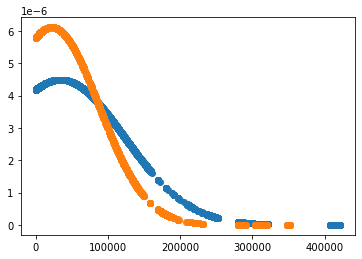

In [36]:
field7=df["sent_packets"].sort_values()
mean7=np.mean(field7)
std7=np.std(field7)
pdf7= stats.norm.pdf(field7.sort_values(), mean7, std7)
plt.scatter(field7, pdf7)

field7=df["received_packets"].sort_values()
mean7=np.mean(field7)
std7=np.std(field7)
pdf7= stats.norm.pdf(field7.sort_values(), mean7, std7)
plt.scatter(field7, pdf7)

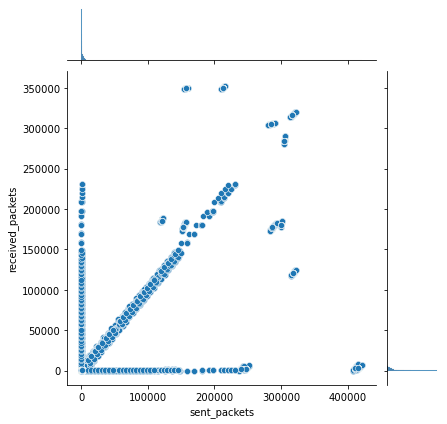

In [37]:
sns.jointplot(data = df, x = df.sent_packets, y = df.received_packets )
#sns.scatterplot(df.sent_packets,df.received_packets)

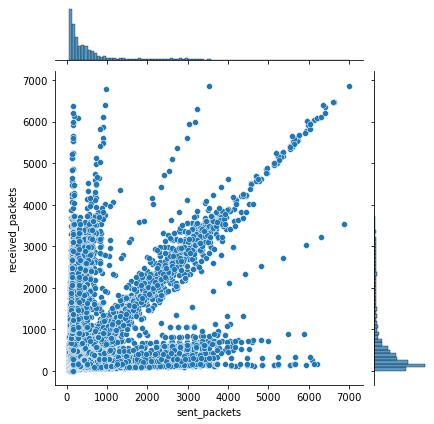

In [38]:
sns.jointplot(data = dfa, x = dfa.sent_packets, y = dfa.received_packets )
#sns.scatterplot(dfa.sent_packets,dfa.received_packets)  #given TCP-SYN attack

In [39]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [40]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9081 entries, 0 to 9080
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   switch_id                    9081 non-null   object
 1   port_number                  9081 non-null   object
 2   received_packets             9081 non-null   int64 
 3   received_bytes               9081 non-null   int64 
 4   sent_bytes                   9081 non-null   int64 
 5   sent_packets                 9081 non-null   int64 
 6   port_alive_duration_s        9081 non-null   int64 
 7   packets_rx_dropped           9081 non-null   int64 
 8   packets_tx_dropped           9081 non-null   int64 
 9   packets_rx_errors            9081 non-null   int64 
 10  packets_tx_errors            9081 non-null   int64 
 11  delta_received_packets       9081 non-null   int64 
 12  delta_received_bytes         9081 non-null   int64 
 13  delta_sent_bytes             9081

In [41]:
dfOriginal.corr()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
Received Packets,1.000000,0.235931,0.263276,0.585578,0.201716,NaN,NaN,NaN,NaN,0.178632,...,0.033358,0.020503,0.033358,0.020503,NaN,NaN,-0.032871,0.737932,0.737933,NaN
Received Bytes,0.235931,1.000000,0.678341,0.393544,0.753177,NaN,NaN,NaN,NaN,-0.042367,...,0.005309,0.021954,0.005309,0.021954,NaN,NaN,-0.033760,0.378620,0.378530,NaN
Sent Bytes,0.263276,0.678341,1.000000,0.492114,0.744272,NaN,NaN,NaN,NaN,-0.072000,...,0.030538,0.030343,0.030538,0.030343,NaN,NaN,-0.032480,0.452300,0.452223,NaN
Sent Packets,0.585578,0.393544,0.492114,1.000000,0.291104,NaN,NaN,NaN,NaN,0.034219,...,0.025320,0.021972,0.025320,0.021972,NaN,NaN,-0.038064,0.936095,0.936094,NaN
Port alive Duration (S),0.201716,0.753177,0.744272,0.291104,1.000000,NaN,NaN,NaN,NaN,-0.124533,...,-0.024441,0.003296,-0.024441,0.003296,NaN,NaN,-0.031836,0.287166,0.287050,NaN
Packets Rx Dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packets Tx Dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packets Rx Errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packets Tx Errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta Received Packets,0.178632,-0.042367,-0.072000,0.034219,-0.124533,NaN,NaN,NaN,NaN,1.000000,...,-0.022130,-0.014579,-0.022130,-0.014579,NaN,NaN,-0.017069,0.044765,0.044780,NaN


In [42]:
dfa.corr()

,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,packets_tx_errors,delta_received_packets,...,total_load/latest,unknown_load/rate,unknown_load/latest,latest_bytes_counter,is_valid,table_id,active_flow_entries,packets_looked_up,packets_matched,max_size
received_packets,1.000000,0.395564,0.182224,0.529126,0.138090,NaN,NaN,NaN,NaN,0.768177,...,0.141327,0.042669,0.141327,0.042669,NaN,NaN,0.312808,0.600837,0.601138,NaN
received_bytes,0.395564,1.000000,0.062535,0.132158,0.163736,NaN,NaN,NaN,NaN,0.211077,...,-0.018962,-0.014422,-0.018962,-0.014422,NaN,NaN,0.110538,0.256507,0.256413,NaN
sent_bytes,0.182224,0.062535,1.000000,0.455520,0.176242,NaN,NaN,NaN,NaN,0.070076,...,0.370794,0.221462,0.370794,0.221462,NaN,NaN,0.107076,0.249874,0.249934,NaN
sent_packets,0.529126,0.132158,0.455520,1.000000,0.188100,NaN,NaN,NaN,NaN,0.380709,...,0.251268,0.097448,0.251268,0.097448,NaN,NaN,0.283072,0.567614,0.568037,NaN
port_alive_duration_s,0.138090,0.163736,0.176242,0.188100,1.000000,NaN,NaN,NaN,NaN,-0.052976,...,0.011708,-0.005715,0.011708,-0.005715,NaN,NaN,-0.049504,0.275060,0.273769,NaN
packets_rx_dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
packets_tx_dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
packets_rx_errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
packets_tx_errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delta_received_packets,0.768177,0.211077,0.070076,0.380709,-0.052976,NaN,NaN,NaN,NaN,1.000000,...,0.161864,0.106604,0.161864,0.106604,NaN,NaN,0.423286,0.366873,0.367528,NaN


In [43]:
df.corr().style.background_gradient(cmap='coolwarm')

C:\Users\mohamed hatem\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\mohamed hatem\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,packets_tx_errors,delta_received_packets,delta_received_bytes,delta_sent_bytes,delta_sent_packets,delta_port_alive_duration_s,delta_packets_rx_dropped,_delta_packets_tx_dropped,delta_packets_rx_errors,delta_packets_tx_errors,connection_point,total_load/rate,total_load/latest,unknown_load/rate,unknown_load/latest,latest_bytes_counter,is_valid,table_id,active_flow_entries,packets_looked_up,packets_matched,max_size,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
received_packets,1.000000,0.235931,0.263276,0.585578,0.201716,nan,nan,nan,nan,0.178632,0.009830,0.000463,0.086540,-0.068982,nan,nan,nan,nan,0.143162,0.020503,0.033358,0.020503,0.033358,0.020503,nan,nan,-0.032871,0.737932,0.737933,nan,-0.180149,-0.159618,-0.118820,-0.054049,0.680680,-0.022586
received_bytes,0.235931,1.000000,0.678341,0.393544,0.753177,nan,nan,nan,nan,-0.042367,0.098901,0.007656,-0.063304,-0.013239,nan,nan,nan,nan,0.112916,0.021954,0.005309,0.021954,0.005309,0.021954,nan,nan,-0.033760,0.378620,0.378530,nan,-0.327641,0.101058,0.326707,-0.084694,0.394573,-0.283582
sent_bytes,0.263276,0.678341,1.000000,0.492114,0.744272,nan,nan,nan,nan,-0.072000,0.005275,0.087682,-0.039423,-0.025379,nan,nan,nan,nan,0.038600,0.030343,0.030538,0.030343,0.030538,0.030343,nan,nan,-0.032480,0.452300,0.452223,nan,-0.325737,0.094517,0.264918,-0.076075,0.473247,-0.286138
sent_packets,0.585578,0.393544,0.492114,1.000000,0.291104,nan,nan,nan,nan,0.034219,0.011125,0.020418,0.103534,-0.094366,nan,nan,nan,nan,-0.037271,0.021972,0.025320,0.021972,0.025320,0.021972,nan,nan,-0.038064,0.936095,0.936094,nan,-0.209113,-0.189183,-0.143393,-0.062003,0.919435,-0.107727
port_alive_duration_s,0.201716,0.753177,0.744272,0.291104,1.000000,nan,nan,nan,nan,-0.124533,0.011960,0.008339,-0.118922,0.005844,nan,nan,nan,nan,0.161257,0.003296,-0.024441,0.003296,-0.024441,0.003296,nan,nan,-0.031836,0.287166,0.287050,nan,-0.445404,0.359352,0.427219,-0.107540,0.331775,-0.445887
packets_rx_dropped,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_tx_dropped,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_rx_errors,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_tx_errors,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
delta_received_packets,0.178632,-0.042367,-0.072000,0.034219,-0.124533,nan,nan,nan,nan,1.000000,0.098319,0.037238,0.600443,0.010933,nan,nan,nan,nan,-0.002523,-0.014579,-0.022130,-0.014579,-0.022130,-0.014579,nan,nan,-0.017069,0.044765,0.044780,nan,-0.078779,-0.088029,-0.069598,-0.027794,-0.054783,0.267481


In [44]:
dfa.corr().var()

received_packets               0.082766
received_bytes                 0.057680
sent_bytes                     0.052985
sent_packets                   0.079006
port_alive_duration_s          0.058463
packets_rx_dropped                  NaN
packets_tx_dropped                  NaN
packets_rx_errors                   NaN
packets_tx_errors                   NaN
delta_received_packets         0.072184
delta_received_bytes           0.062570
delta_sent_bytes               0.075094
delta_sent_packets             0.067723
delta_port_alive_duration_s    0.053240
delta_packets_rx_dropped            NaN
_delta_packets_tx_dropped           NaN
delta_packets_rx_errors             NaN
delta_packets_tx_errors             NaN
connection_point               0.053440
total_load/rate                0.139724
total_load/latest              0.102000
unknown_load/rate              0.139724
unknown_load/latest            0.102000
latest_bytes_counter           0.139724
is_valid                            NaN


In [45]:
dfa.corr().mean()

received_packets               0.291907
received_bytes                 0.149435
sent_bytes                     0.232575
sent_packets                   0.303724
port_alive_duration_s          0.107269
packets_rx_dropped                  NaN
packets_tx_dropped                  NaN
packets_rx_errors                   NaN
packets_tx_errors                   NaN
delta_received_packets         0.283110
delta_received_bytes           0.105627
delta_sent_bytes               0.229583
delta_sent_packets             0.315098
delta_port_alive_duration_s    0.047628
delta_packets_rx_dropped            NaN
_delta_packets_tx_dropped           NaN
delta_packets_rx_errors             NaN
delta_packets_tx_errors             NaN
connection_point               0.063137
total_load/rate                0.290324
total_load/latest              0.307897
unknown_load/rate              0.290324
unknown_load/latest            0.307897
latest_bytes_counter           0.290324
is_valid                            NaN


In [46]:
df.corr().style.background_gradient(cmap='coolwarm')

,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,packets_tx_errors,delta_received_packets,delta_received_bytes,delta_sent_bytes,delta_sent_packets,delta_port_alive_duration_s,delta_packets_rx_dropped,_delta_packets_tx_dropped,delta_packets_rx_errors,delta_packets_tx_errors,connection_point,total_load/rate,total_load/latest,unknown_load/rate,unknown_load/latest,latest_bytes_counter,is_valid,table_id,active_flow_entries,packets_looked_up,packets_matched,max_size,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
received_packets,1.000000,0.235931,0.263276,0.585578,0.201716,nan,nan,nan,nan,0.178632,0.009830,0.000463,0.086540,-0.068982,nan,nan,nan,nan,0.143162,0.020503,0.033358,0.020503,0.033358,0.020503,nan,nan,-0.032871,0.737932,0.737933,nan,-0.180149,-0.159618,-0.118820,-0.054049,0.680680,-0.022586
received_bytes,0.235931,1.000000,0.678341,0.393544,0.753177,nan,nan,nan,nan,-0.042367,0.098901,0.007656,-0.063304,-0.013239,nan,nan,nan,nan,0.112916,0.021954,0.005309,0.021954,0.005309,0.021954,nan,nan,-0.033760,0.378620,0.378530,nan,-0.327641,0.101058,0.326707,-0.084694,0.394573,-0.283582
sent_bytes,0.263276,0.678341,1.000000,0.492114,0.744272,nan,nan,nan,nan,-0.072000,0.005275,0.087682,-0.039423,-0.025379,nan,nan,nan,nan,0.038600,0.030343,0.030538,0.030343,0.030538,0.030343,nan,nan,-0.032480,0.452300,0.452223,nan,-0.325737,0.094517,0.264918,-0.076075,0.473247,-0.286138
sent_packets,0.585578,0.393544,0.492114,1.000000,0.291104,nan,nan,nan,nan,0.034219,0.011125,0.020418,0.103534,-0.094366,nan,nan,nan,nan,-0.037271,0.021972,0.025320,0.021972,0.025320,0.021972,nan,nan,-0.038064,0.936095,0.936094,nan,-0.209113,-0.189183,-0.143393,-0.062003,0.919435,-0.107727
port_alive_duration_s,0.201716,0.753177,0.744272,0.291104,1.000000,nan,nan,nan,nan,-0.124533,0.011960,0.008339,-0.118922,0.005844,nan,nan,nan,nan,0.161257,0.003296,-0.024441,0.003296,-0.024441,0.003296,nan,nan,-0.031836,0.287166,0.287050,nan,-0.445404,0.359352,0.427219,-0.107540,0.331775,-0.445887
packets_rx_dropped,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_tx_dropped,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_rx_errors,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_tx_errors,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
delta_received_packets,0.178632,-0.042367,-0.072000,0.034219,-0.124533,nan,nan,nan,nan,1.000000,0.098319,0.037238,0.600443,0.010933,nan,nan,nan,nan,-0.002523,-0.014579,-0.022130,-0.014579,-0.022130,-0.014579,nan,nan,-0.017069,0.044765,0.044780,nan,-0.078779,-0.088029,-0.069598,-0.027794,-0.054783,0.267481


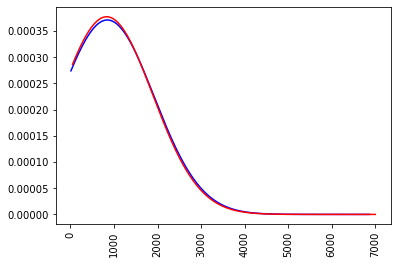

In [47]:
field7=dfa["received_packets"].sort_values()
mean7=np.mean(field7)
std7=np.std(field7)
pdf7= stats.norm.pdf(field7.sort_values(), mean7, std7)
plt.xticks(rotation=90)
plt.plot(field7, pdf7,'b')
field8=dfa["sent_packets"].sort_values()
mean8=np.mean(field8)
std8=np.std(field8)
pdf8= stats.norm.pdf(field8.sort_values(), mean8, std8)
plt.xticks(rotation=90)
plt.plot(field8, pdf8,'r')

In [48]:
#TASK2

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train,test=train_test_split(df, test_size=0.2)

In [51]:
train.shape

(29928, 40)

In [52]:
test.shape

(7483, 40)

In [53]:
(29928/(29928+7483))*100

79.99786159151053

In [54]:
(7483/(29928+7483))*100

20.002138408489483

In [55]:
test.head(50)

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,packets_matched,max_size,label,binary_label,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
24475,of:000000000000000c,Port#:2,3569,82034165,90497386,411754,1857,0,0,0,...,657230,-1,Normal,Normal,0,0,0,0,1,0
4743,of:0000000000000004,Port#:1,6384,12945741,21788,161,191,0,0,0,...,7319,-1,TCP-SYN,Attack,1,0,0,0,0,0
22724,of:0000000000000007,Port#:2,1013,135295,19059881,1761,1441,0,0,0,...,8076,-1,Diversion,Attack,0,0,1,0,0,0
352,of:0000000000000003,Port#:1,298,6312076,6322225,368,76,0,0,0,...,2625,-1,TCP-SYN,Attack,1,0,0,0,0,0
29421,of:0000000000000008,Port#:3,1335,31557460,31126,333,136,0,0,0,...,114960,-1,PortScan,Attack,0,0,0,0,0,1
11589,of:0000000000000001,Port#:3,3322,31802013,19164784,2536,2567,0,0,0,...,13589,-1,Blackhole,Attack,0,1,0,0,0,0
5838,of:0000000000000008,Port#:2,176,16757,17375,185,61,0,0,0,...,1240,-1,TCP-SYN,Attack,1,0,0,0,0,0
27683,of:0000000000000003,Port#:3,120341,49240148,70114233,317764,1527,0,0,0,...,991573,-1,Normal,Normal,0,0,0,0,1,0
14324,of:000000000000000c,Port#:2,1922,37881306,50649847,3354,1886,0,0,0,...,12102,-1,Blackhole,Attack,0,1,0,0,0,0
2667,of:0000000000000006,Port#:1,2871,6433288,12750602,2808,151,0,0,0,...,6233,-1,TCP-SYN,Attack,1,0,0,0,0,0


In [56]:
# %matplotlib inline

# import warnings
# import numpy as np
# import pandas as pd
# import scipy.stats as st
# import statsmodels.api as sm
# from scipy.stats._continuous_distns import _distn_names
# import matplotlib
# import matplotlib.pyplot as plt

# matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
# matplotlib.style.use('ggplot')

# # Create models from data
# def best_fit_distribution(data, bins=500, ax=None):
#     """Model data by finding best fit distribution to data"""
#     # Get histogram of original data
#     y, x = np.histogram(data, bins=bins, density=True)
#     x = (x + np.roll(x, -1))[:-1] / 2.0

#     # Best holders
#     best_distributions = []

#     # Estimate distribution parameters from data
#     for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

#         print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

#         distribution = getattr(st, distribution)

#         # Try to fit the distribution
#         try:
#             # Ignore warnings from data that can't be fit
#             with warnings.catch_warnings():
#                 warnings.filterwarnings('ignore')
                
#                 # fit dist to data
#                 params = distribution.fit(data)

#                 # Separate parts of parameters
#                 arg = params[:-2]
#                 loc = params[-2]
#                 scale = params[-1]
                
#                 # Calculate fitted PDF and error with fit in distribution
#                 pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
#                 sse = np.sum(np.power(y - pdf, 2.0))
                
#                 # if axis pass in add to plot
#                 try:
#                     if ax:
#                         pd.Series(pdf, x).plot(ax=ax)
#                     end
#                 except Exception:
#                     pass

#                 # identify if this distribution is better
#                 best_distributions.append((distribution, params, sse))
        
#         except Exception:
#             pass

    
#     return sorted(best_distributions, key=lambda x:x[2])

# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """

#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get sane start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf
# pdfIndex=[2,3,4,5,6,11,12,13,14,21,22,23,24,25,28,29,30]
# bestFit=[]
# for index in pdfIndex:
#     temp=train[train.columns[index]]
# # Load data from statsmodels datasets
#     data = pd.Series(temp.values.ravel())

# # Plot for comparison
#     plt.figure(figsize=(12,8))
#     ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# # Save plot limits
#     dataYLim = ax.get_ylim()

# # Find best fit distribution
#     best_distibutions = best_fit_distribution(data, 200, ax)
#     best_dist = best_distibutions[0]

# # Update plots
#     ax.set_ylim(dataYLim)
#     ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
#     ax.set_xlabel(u'Temp (°C)')
#     ax.set_ylabel('Frequency')

# # Make PDF with best params 
#     pdf = make_pdf(best_dist[0], best_dist[1])

# # Display
#     plt.figure(figsize=(12,8))
#     ax = pdf.plot(lw=2, label='PDF', legend=True)
#     data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

#     param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
#     param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
#     dist_str = '{}({})'.format(best_dist[0].name, param_str)

#     ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
#     ax.set_xlabel(u'Temp. (°C)')
#     ax.set_ylabel('Frequency')
#     bestFit.append(dist_str)

In [57]:
train.columns

Index(['switch_id', 'port_number', 'received_packets', 'received_bytes',
       'sent_bytes', 'sent_packets', 'port_alive_duration_s',
       'packets_rx_dropped', 'packets_tx_dropped', 'packets_rx_errors',
       'packets_tx_errors', 'delta_received_packets', 'delta_received_bytes',
       'delta_sent_bytes', 'delta_sent_packets', 'delta_port_alive_duration_s',
       'delta_packets_rx_dropped', '_delta_packets_tx_dropped',
       'delta_packets_rx_errors', 'delta_packets_tx_errors',
       'connection_point', 'total_load/rate', 'total_load/latest',
       'unknown_load/rate', 'unknown_load/latest', 'latest_bytes_counter',
       'is_valid', 'table_id', 'active_flow_entries', 'packets_looked_up',
       'packets_matched', 'max_size', 'label', 'binary_label', 'TCP-SYN',
       'Blackhole', 'Diversion', 'Overflow', 'Normal', 'PortScan'],
      dtype='object')

In [58]:
type(data)

str

In [59]:
type(train.set_index('switch_id'))

pandas.core.frame.DataFrame

In [60]:
type(data)

str

In [61]:
train['received_packets']

34346    18854
12088     1454
2887       237
23183      332
31435      207
         ...  
33067      396
13881     1949
17740     5548
37041      476
30741      526
Name: received_packets, Length: 29928, dtype: int64

In [62]:
pdfIndex=[2,3,4,5,6,11,12,13,14,21,22,23,24,25,28,29,30]
counter=1
num=[]
for index in pdfIndex:
     num.append(train.columns[index])

In [63]:
num

['received_packets',
 'received_bytes',
 'sent_bytes',
 'sent_packets',
 'port_alive_duration_s',
 'delta_received_packets',
 'delta_received_bytes',
 'delta_sent_bytes',
 'delta_sent_packets',
 'total_load/rate',
 'total_load/latest',
 'unknown_load/rate',
 'unknown_load/latest',
 'latest_bytes_counter',
 'active_flow_entries',
 'packets_looked_up',
 'packets_matched']

In [64]:
temp=train[train.columns[index]]
type(temp)

pandas.core.series.Series

In [65]:
temp

34346     37385
12088     19732
2887       2988
23183      1901
31435      1127
          ...  
33067    222664
13881      8756
17740     14254
37041      1800
30741    196711
Name: packets_matched, Length: 29928, dtype: int64

In [66]:
num

['received_packets',
 'received_bytes',
 'sent_bytes',
 'sent_packets',
 'port_alive_duration_s',
 'delta_received_packets',
 'delta_received_bytes',
 'delta_sent_bytes',
 'delta_sent_packets',
 'total_load/rate',
 'total_load/latest',
 'unknown_load/rate',
 'unknown_load/latest',
 'latest_bytes_counter',
 'active_flow_entries',
 'packets_looked_up',
 'packets_matched']

In [67]:
Best=pd.read_csv("D:/GUC/Sem5/(NETW504) Random Signals and Noise (466)/Project/my_csv.csv")

In [68]:
Best

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,skewcauchy,a=1.00,loc=9.00,scale=559.77,NaN
1,received_bytes,mielke,k=0.78,s=0.38,loc=-1338.40,scale=265815.21
2,sent_bytes,mielke,k=0.83,s=0.39,loc=-1145.34,scale=202128.25
3,sent_packets,halfcauchy,loc=41.00,scale=1191.35,NaN,NaN
4,port_alive_duration_s,burr12,c=3.71,d=0.17,loc=-0.11,scale=89.24
5,delta_received_packets,pearson3,skew=2.16,loc=89.66,scale=96.75,NaN
6,delta_received_bytes,exponweib,a=1.37,c=0.44,loc=-0.00,scale=16611.78
7,delta_sent_bytes,exponweib,a=0.93,c=0.47,loc=278.00,scale=15811.02
8,delta_sent_packets,pearson3,skew=2.28,loc=85.98,scale=95.62,NaN
9,total_load/rate,laplace_asymmetric,kappa=0.49,loc=-0.00,scale=12574.83,NaN


In [69]:
trainAttack=train.loc[train.binary_label=='Attack']

In [70]:
trainNormal=train.loc[train.binary_label=='Normal']

In [71]:
trainAttack

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,packets_matched,max_size,label,binary_label,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
34346,of:0000000000000003,Port#:4,18854,1022768,703778,12947,41,0,0,0,...,37385,-1,PortScan,Attack,0,0,0,0,0,1
12088,of:000000000000000a,Port#:4,1454,196754,50663420,3396,2126,0,0,0,...,19732,-1,Blackhole,Attack,0,1,0,0,0,0
2887,of:0000000000000001,Port#:1,237,16412,12618620,436,86,0,0,0,...,2988,-1,TCP-SYN,Attack,1,0,0,0,0,0
23183,of:000000000000000c,Port#:1,332,6284637,6466842,698,322,0,0,0,...,1901,-1,Overflow,Attack,0,0,0,1,0,0
31435,of:0000000000000008,Port#:3,207,20686,12855,96,96,0,0,0,...,1127,-1,PortScan,Attack,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,of:0000000000000008,Port#:1,396,6332764,24485721,219796,271,0,0,0,...,222664,-1,PortScan,Attack,0,0,0,0,0,1
13881,of:0000000000000004,Port#:1,1949,19087060,158411,1153,1716,0,0,0,...,8756,-1,Blackhole,Attack,0,1,0,0,0,0
17740,of:0000000000000004,Port#:3,5548,94822529,12776571,1725,1672,0,0,0,...,14254,-1,Diversion,Attack,0,0,1,0,0,0
37041,of:0000000000000003,Port#:1,476,12615767,6338745,537,186,0,0,0,...,1800,-1,PortScan,Attack,0,0,0,0,0,1


In [72]:
trainAttackTCP=trainAttack.loc[trainAttack.label=="TCP-SYN"]

In [73]:
trainAttackTCP

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,packets_matched,max_size,label,binary_label,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
2887,of:0000000000000001,Port#:1,237,16412,12618620,436,86,0,0,0,...,2988,-1,TCP-SYN,Attack,1,0,0,0,0,0
7971,of:0000000000000005,Port#:2,1931,116276,20246,152,171,0,0,0,...,2822,-1,TCP-SYN,Attack,1,0,0,0,0,0
8079,of:0000000000000007,Port#:2,2981,12764092,6341586,570,201,0,0,0,...,3756,-1,TCP-SYN,Attack,1,0,0,0,0,0
5073,of:000000000000000c,Port#:3,2307,137826,6432982,2359,136,0,0,0,...,5325,-1,TCP-SYN,Attack,1,0,0,0,0,0
3355,of:0000000000000002,Port#:2,1177,6365248,69822,1119,96,0,0,0,...,2226,-1,TCP-SYN,Attack,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,of:0000000000000004,Port#:2,506,12627540,6348313,686,176,0,0,0,...,4564,-1,TCP-SYN,Attack,1,0,0,0,0,0
4588,of:0000000000000001,Port#:2,187,6304489,25769,246,151,0,0,0,...,11263,-1,TCP-SYN,Attack,1,0,0,0,0,0
951,of:0000000000000002,Port#:2,311,6322262,6329872,421,161,0,0,0,...,678,-1,TCP-SYN,Attack,1,0,0,0,0,0
470,of:0000000000000004,Port#:1,103,13957,13841,101,106,0,0,0,...,3571,-1,TCP-SYN,Attack,1,0,0,0,0,0


In [74]:
'''
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

pdfIndex=[2,3,4,5,6,11,12,13,14,21,22,23,24,25,28,29,30]
bestFitAttackTCP=[]
for index in pdfIndex:
    temp=trainAttackTCP[trainAttackTCP.columns[index]]
    #Load data from statsmodels datasets
    data = pd.Series(temp.values.ravel())

    #Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

    #Save plot limits
    dataYLim = ax.get_ylim()

    #Find best fit distribution
    best_distibutions = best_fit_distribution(data, 200, ax)
    best_dist = best_distibutions[0]

    #Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
    ax.set_xlabel(u'Temp (°C)')
    ax.set_ylabel('Frequency')

    #Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    #Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
    ax.set_xlabel(u'Temp. (°C)')
    ax.set_ylabel('Frequency')
    bestFitAttackTCP.append(dist_str)
    '''

'\n%matplotlib inline\n\nimport warnings\nimport numpy as np\nimport pandas as pd\nimport scipy.stats as st\nimport statsmodels.api as sm\nfrom scipy.stats._continuous_distns import _distn_names\nimport matplotlib\nimport matplotlib.pyplot as plt\n\nmatplotlib.rcParams[\'figure.figsize\'] = (16.0, 12.0)\nmatplotlib.style.use(\'ggplot\')\n\n# Create models from data\ndef best_fit_distribution(data, bins=200, ax=None):\n    """Model data by finding best fit distribution to data"""\n    # Get histogram of original data\n    y, x = np.histogram(data, bins=bins, density=True)\n    x = (x + np.roll(x, -1))[:-1] / 2.0\n\n    # Best holders\n    best_distributions = []\n\n    # Estimate distribution parameters from data\n    for ii, distribution in enumerate([d for d in _distn_names if not d in [\'levy_stable\', \'studentized_range\']]):\n\n        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))\n\n        distribution = getattr(st, distribution)\n\n        # Try to 

In [75]:
#temp1=pd.Series(bestFitAttackTCP,num)
#temp1

In [76]:
#BestAttackTCP=temp1.to_csv('my_csvTCP.csv', sep=';', decimal=',')

In [77]:
# %matplotlib inline

# import warnings
# import numpy as np
# import pandas as pd
# import scipy.stats as st
# import statsmodels.api as sm
# from scipy.stats._continuous_distns import _distn_names
# import matplotlib
# import matplotlib.pyplot as plt

# matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
# matplotlib.style.use('ggplot')

# # Create models from data
# def best_fit_distribution(data, bins=500, ax=None):
#     """Model data by finding best fit distribution to data"""
#     # Get histogram of original data
#     y, x = np.histogram(data, bins=bins, density=True)
#     x = (x + np.roll(x, -1))[:-1] / 2.0

#     # Best holders
#     best_distributions = []

#     # Estimate distribution parameters from data
#     for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

#         print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

#         distribution = getattr(st, distribution)

#         # Try to fit the distribution
#         try:
#             # Ignore warnings from data that can't be fit
#             with warnings.catch_warnings():
#                 warnings.filterwarnings('ignore')
                
#                 # fit dist to data
#                 params = distribution.fit(data)

#                 # Separate parts of parameters
#                 arg = params[:-2]
#                 loc = params[-2]
#                 scale = params[-1]
                
#                 # Calculate fitted PDF and error with fit in distribution
#                 pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
#                 sse = np.sum(np.power(y - pdf, 2.0))
                
#                 # if axis pass in add to plot
#                 try:
#                     if ax:
#                         pd.Series(pdf, x).plot(ax=ax)
#                     end
#                 except Exception:
#                     pass

#                 # identify if this distribution is better
#                 best_distributions.append((distribution, params, sse))
        
#         except Exception:
#             pass

    
#     return sorted(best_distributions, key=lambda x:x[2])

# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """

#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get sane start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf
# pdfIndex=[2,3,4,5,6,11,12,13,14,21,22,23,24,25,28,29,30]
# bestFitNormal=[]
# for index in pdfIndex:
#     temp=trainNormal[trainNormal.columns[index]]
# # Load data from statsmodels datasets
#     data = pd.Series(temp.values.ravel())

# # Plot for comparison
#     plt.figure(figsize=(12,8))
#     ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# # Save plot limits
#     dataYLim = ax.get_ylim()

# # Find best fit distribution
#     best_distibutions = best_fit_distribution(data, 200, ax)
#     best_dist = best_distibutions[0]

# # Update plots
#     ax.set_ylim(dataYLim)
#     ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
#     ax.set_xlabel(u'Temp (°C)')
#     ax.set_ylabel('Frequency')

# # Make PDF with best params 
#     pdf = make_pdf(best_dist[0], best_dist[1])

# # Display
#     plt.figure(figsize=(12,8))
#     ax = pdf.plot(lw=2, label='PDF', legend=True)
#     data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

#     param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
#     param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
#     dist_str = '{}({})'.format(best_dist[0].name, param_str)

#     ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
#     ax.set_xlabel(u'Temp. (°C)')
#     ax.set_ylabel('Frequency')
#     bestFitNormal.append(dist_str)

In [78]:
BestAttack=pd.read_csv("D:/GUC/Sem5/(NETW504) Random Signals and Noise (466)/Project/my_csv1.csv")

In [79]:
BestNormal=pd.read_csv("D:/GUC/Sem5/(NETW504) Random Signals and Noise (466)/Project/my_csv2.csv")

In [80]:
BestAttack

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,skewcauchy,a=1.00,loc=9.00,scale=455.89,NaN
1,received_bytes,mielke,k=0.97,s=0.36,loc=-315.05,scale=54657.44
2,sent_bytes,levy,loc=-65574.80,scale=272993.63,NaN,NaN
3,sent_packets,foldcauchy,c=0.00,loc=41.00,scale=901.87,NaN
4,port_alive_duration_s,burr12,c=3.92,d=0.17,loc=-0.17,scale=85.95
5,delta_received_packets,wald,loc=-35.09,scale=132.23,NaN,NaN
6,delta_received_bytes,exponweib,a=1.37,c=0.44,loc=-0.00,scale=17137.87
7,delta_sent_bytes,exponweib,a=0.94,c=0.48,loc=278.00,scale=13468.69
8,delta_sent_packets,halfgennorm,beta=0.56,loc=2.00,scale=13.17,NaN
9,total_load/rate,laplace_asymmetric,kappa=0.47,loc=-0.00,scale=10968.72,NaN


In [81]:
BestNormal

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,t,df=0.27,loc=3295.35,scale=3394.74,NaN
1,received_bytes,laplace_asymmetric,kappa=0.30,loc=14707489.00,scale=17877709.32,NaN
2,sent_bytes,laplace_asymmetric,kappa=0.16,loc=12639721.00,scale=9751036.23,NaN
3,sent_packets,beta,a=0.84,b=0.74,loc=118809.00,scale=302789.02
4,port_alive_duration_s,vonmises_line,kappa=0.02,loc=1878.33,scale=376.14,NaN
5,delta_received_packets,mielke,k=0.61,s=1.00,loc=-0.00,scale=2.84
6,delta_received_bytes,halfgennorm,beta=0.42,loc=-0.00,scale=1867.21,NaN
7,delta_sent_bytes,exponweib,a=1.20,c=0.69,loc=278.00,scale=81150.21
8,delta_sent_packets,gennorm,beta=0.32,loc=4.00,scale=0.03,NaN
9,total_load/rate,dgamma,a=0.29,loc=0.00,scale=18257.87,NaN


In [82]:
Best

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,skewcauchy,a=1.00,loc=9.00,scale=559.77,NaN
1,received_bytes,mielke,k=0.78,s=0.38,loc=-1338.40,scale=265815.21
2,sent_bytes,mielke,k=0.83,s=0.39,loc=-1145.34,scale=202128.25
3,sent_packets,halfcauchy,loc=41.00,scale=1191.35,NaN,NaN
4,port_alive_duration_s,burr12,c=3.71,d=0.17,loc=-0.11,scale=89.24
5,delta_received_packets,pearson3,skew=2.16,loc=89.66,scale=96.75,NaN
6,delta_received_bytes,exponweib,a=1.37,c=0.44,loc=-0.00,scale=16611.78
7,delta_sent_bytes,exponweib,a=0.93,c=0.47,loc=278.00,scale=15811.02
8,delta_sent_packets,pearson3,skew=2.28,loc=85.98,scale=95.62,NaN
9,total_load/rate,laplace_asymmetric,kappa=0.49,loc=-0.00,scale=12574.83,NaN


In [83]:
pmfIndex=[0,1,7,8,9,10,15,16,17,18,19,20,26,27,31,32,33]
pmfField=[]
pmfProb=[]
pmfColName=[]
counter=1
dfOriginal=train
for index in pmfIndex:
    field1 = dfOriginal[dfOriginal.columns[index]].unique()
    prob1 = [0] * len(field1)
    for i in range(len(field1)):
        for data in dfOriginal[dfOriginal.columns[index]]:
            if(data == field1[i]):
                prob1[i] += 1

    for y in range(len(prob1)):
        prob1[y] = prob1[y]/len(dfOriginal)
    pmfColName.append(dfOriginal.columns[index])
    pmfField.append(field1)
    pmfProb.append(prob1)
    counter+=1

In [84]:
pmfAll=[]
for index in range(len(pmfField)):
    t1=pmfColName[index]
    t2=pmfField[index]
    t3=pmfProb[index]
    temp=[t1,t2,t3]
    pmfAll.append(temp)

In [85]:
pmfIndex=[0,1,7,8,9,10,15,16,17,18,19,20,26,27,31,32,33]
pmfField=[]
pmfProb=[]
pmfColName=[]
counter=1
dfOriginal=trai nAttack
for index in pmfIndex:
    field1 = dfOriginal[dfOriginal.columns[index]].unique()
    prob1 = [0] * len(field1)
    for i in range(len(field1)):
        for data in dfOriginal[dfOriginal.columns[index]]:
            if(data == field1[i]):
                prob1[i] += 1

    for y in range(len(prob1)):
        prob1[y] = prob1[y]/len(dfOriginal)
    pmfColName.append(dfOriginal.columns[index])
    pmfField.append(field1)
    pmfProb.append(prob1)
    counter+=1

SyntaxError: invalid syntax (Temp/ipykernel_4332/2738680377.py, line 6)

In [89]:
pmfAttack=[]
for index in range(len(pmfField)):
    t1=pmfColName[index]
    t2=pmfField[index]
    t3=pmfProb[index]
    temp=[t1,t2,t3]
    pmfAttack.append(temp)

In [90]:
pmfIndex=[0,1,7,8,9,10,15,16,17,18,19,20,26,27,31,32,33]
pmfField=[]
pmfProb=[]
pmfColName=[]
counter=1
dfOriginal=trainNormal
for index in pmfIndex:
    field1 = dfOriginal[dfOriginal.columns[index]].unique()
    prob1 = [0] * len(field1)
    for i in range(len(field1)):
        for data in dfOriginal[dfOriginal.columns[index]]:
            if(data == field1[i]):
                prob1[i] += 1

    for y in range(len(prob1)):
        prob1[y] = prob1[y]/len(dfOriginal)
    pmfColName.append(dfOriginal.columns[index])
    pmfField.append(field1)
    pmfProb.append(prob1)
    counter+=1

In [91]:
pmfNormal=[]
for index in range(len(pmfField)):
    t1=pmfColName[index]
    t2=pmfField[index]
    t3=pmfProb[index]
    temp=[t1,t2,t3]
    pmfNormal.append(temp)

In [92]:
pmfAttack

[['switch_id',
  array(['of:0000000000000003', 'of:000000000000000a',
         'of:0000000000000001', 'of:000000000000000c',
         'of:0000000000000008', 'of:0000000000000005',
         'of:0000000000000007', 'of:0000000000000004',
         'of:0000000000000002', 'of:0000000000000009',
         'of:000000000000000b', 'of:0000000000000006'], dtype=object),
  [0.1301790964982625,
   0.13489040363539162,
   0.10050788559208768,
   0.14735364875701684,
   0.05934242181234964,
   0.055232558139534885,
   0.0704691259021652,
   0.09018310612135792,
   0.05055466452820102,
   0.047514033680834004,
   0.06622560812616947,
   0.04754744720662924]],
 ['port_number',
  array(['Port#:4', 'Port#:1', 'Port#:3', 'Port#:2'], dtype=object),
  [0.12286153434910452,
   0.3186313819834269,
   0.24164661855118952,
   0.3168604651162791]],
 ['packets_rx_dropped', array([0], dtype=int64), [1.0]],
 ['packets_tx_dropped', array([0], dtype=int64), [1.0]],
 ['packets_rx_errors', array([0], dtype=int64), [1.0]

In [93]:
train

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,packets_matched,max_size,label,binary_label,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
34346,of:0000000000000003,Port#:4,18854,1022768,703778,12947,41,0,0,0,...,37385,-1,PortScan,Attack,0,0,0,0,0,1
12088,of:000000000000000a,Port#:4,1454,196754,50663420,3396,2126,0,0,0,...,19732,-1,Blackhole,Attack,0,1,0,0,0,0
2887,of:0000000000000001,Port#:1,237,16412,12618620,436,86,0,0,0,...,2988,-1,TCP-SYN,Attack,1,0,0,0,0,0
23183,of:000000000000000c,Port#:1,332,6284637,6466842,698,322,0,0,0,...,1901,-1,Overflow,Attack,0,0,0,1,0,0
31435,of:0000000000000008,Port#:3,207,20686,12855,96,96,0,0,0,...,1127,-1,PortScan,Attack,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,of:0000000000000008,Port#:1,396,6332764,24485721,219796,271,0,0,0,...,222664,-1,PortScan,Attack,0,0,0,0,0,1
13881,of:0000000000000004,Port#:1,1949,19087060,158411,1153,1716,0,0,0,...,8756,-1,Blackhole,Attack,0,1,0,0,0,0
17740,of:0000000000000004,Port#:3,5548,94822529,12776571,1725,1672,0,0,0,...,14254,-1,Diversion,Attack,0,0,1,0,0,0
37041,of:0000000000000003,Port#:1,476,12615767,6338745,537,186,0,0,0,...,1800,-1,PortScan,Attack,0,0,0,0,0,1


In [94]:
BestAttack

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,skewcauchy,a=1.00,loc=9.00,scale=455.89,NaN
1,received_bytes,mielke,k=0.97,s=0.36,loc=-315.05,scale=54657.44
2,sent_bytes,levy,loc=-65574.80,scale=272993.63,NaN,NaN
3,sent_packets,foldcauchy,c=0.00,loc=41.00,scale=901.87,NaN
4,port_alive_duration_s,burr12,c=3.92,d=0.17,loc=-0.17,scale=85.95
5,delta_received_packets,wald,loc=-35.09,scale=132.23,NaN,NaN
6,delta_received_bytes,exponweib,a=1.37,c=0.44,loc=-0.00,scale=17137.87
7,delta_sent_bytes,exponweib,a=0.94,c=0.48,loc=278.00,scale=13468.69
8,delta_sent_packets,halfgennorm,beta=0.56,loc=2.00,scale=13.17,NaN
9,total_load/rate,laplace_asymmetric,kappa=0.47,loc=-0.00,scale=10968.72,NaN


In [95]:
test

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,packets_matched,max_size,label,binary_label,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
24475,of:000000000000000c,Port#:2,3569,82034165,90497386,411754,1857,0,0,0,...,657230,-1,Normal,Normal,0,0,0,0,1,0
4743,of:0000000000000004,Port#:1,6384,12945741,21788,161,191,0,0,0,...,7319,-1,TCP-SYN,Attack,1,0,0,0,0,0
22724,of:0000000000000007,Port#:2,1013,135295,19059881,1761,1441,0,0,0,...,8076,-1,Diversion,Attack,0,0,1,0,0,0
352,of:0000000000000003,Port#:1,298,6312076,6322225,368,76,0,0,0,...,2625,-1,TCP-SYN,Attack,1,0,0,0,0,0
29421,of:0000000000000008,Port#:3,1335,31557460,31126,333,136,0,0,0,...,114960,-1,PortScan,Attack,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024,of:0000000000000001,Port#:3,543,6338784,6332311,453,171,0,0,0,...,7361,-1,TCP-SYN,Attack,1,0,0,0,0,0
14328,of:000000000000000a,Port#:2,3121,75712354,57001653,4234,1886,0,0,0,...,17022,-1,Blackhole,Attack,0,1,0,0,0,0
2413,of:000000000000000a,Port#:3,93,12535,6379302,1438,91,0,0,0,...,5485,-1,TCP-SYN,Attack,1,0,0,0,0,0
9562,of:0000000000000001,Port#:3,819,18946068,49393,496,316,0,0,0,...,2093,-1,Blackhole,Attack,0,1,0,0,0,0


In [96]:
predic=test.iloc[0]

In [97]:
predic

switch_id                      of:000000000000000c
port_number                                Port#:2
received_packets                              3569
received_bytes                            82034165
sent_bytes                                90497386
sent_packets                                411754
port_alive_duration_s                         1857
packets_rx_dropped                               0
packets_tx_dropped                               0
packets_rx_errors                                0
packets_tx_errors                                0
delta_received_packets                          68
delta_received_bytes                          4508
delta_sent_bytes                           3808512
delta_sent_packets                             107
delta_port_alive_duration_s                      5
delta_packets_rx_dropped                         0
_delta_packets_tx_dropped                        0
delta_packets_rx_errors                          0
delta_packets_tx_errors        

In [98]:
BestAttack

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,skewcauchy,a=1.00,loc=9.00,scale=455.89,NaN
1,received_bytes,mielke,k=0.97,s=0.36,loc=-315.05,scale=54657.44
2,sent_bytes,levy,loc=-65574.80,scale=272993.63,NaN,NaN
3,sent_packets,foldcauchy,c=0.00,loc=41.00,scale=901.87,NaN
4,port_alive_duration_s,burr12,c=3.92,d=0.17,loc=-0.17,scale=85.95
5,delta_received_packets,wald,loc=-35.09,scale=132.23,NaN,NaN
6,delta_received_bytes,exponweib,a=1.37,c=0.44,loc=-0.00,scale=17137.87
7,delta_sent_bytes,exponweib,a=0.94,c=0.48,loc=278.00,scale=13468.69
8,delta_sent_packets,halfgennorm,beta=0.56,loc=2.00,scale=13.17,NaN
9,total_load/rate,laplace_asymmetric,kappa=0.47,loc=-0.00,scale=10968.72,NaN


In [99]:
predic

switch_id                      of:000000000000000c
port_number                                Port#:2
received_packets                              3569
received_bytes                            82034165
sent_bytes                                90497386
sent_packets                                411754
port_alive_duration_s                         1857
packets_rx_dropped                               0
packets_tx_dropped                               0
packets_rx_errors                                0
packets_tx_errors                                0
delta_received_packets                          68
delta_received_bytes                          4508
delta_sent_bytes                           3808512
delta_sent_packets                             107
delta_port_alive_duration_s                      5
delta_packets_rx_dropped                         0
_delta_packets_tx_dropped                        0
delta_packets_rx_errors                          0
delta_packets_tx_errors        

In [100]:
predictionProb

[]

In [101]:
pmfAll[6][0]#PMFS

'delta_port_alive_duration_s'

In [102]:
from scipy.stats import *

In [103]:
pmfAttack[1][1][0]

'Port#:4'

In [104]:
predictionProb=[]
predictionProb.append(pmfAttack[0][2][4])#switch_id
predictionProb.append(pmfAttack[1][2][0]) #port_number
received_packets=skewcauchy.pdf(x=970, a=1,loc=-315.05, scale=54657.44) #PDFS
predictionProb.append(received_packets)
received_bytes=mielke.pdf(x=101278,loc=315.05,scale=54657.44,k=0.97,s=0.36)
predictionProb.append(received_bytes)
sent_bytes=levy.pdf(x=78869,loc=-65574.80,scale=272993.63)
predictionProb.append(sent_bytes)
sent_packets=foldcauchy.pdf(x=653,c=0,loc=41,scale=901.87)
predictionProb.append(sent_packets)
port_alive_duration_s=burr12.pdf(x=762,c=3.92,d=0.17,loc=0.17,scale=85.95)
predictionProb.append(port_alive_duration_s)
predictionProb.append(pmfAttack[2][2][0])#packets_rx_dropped
predictionProb.append(pmfAttack[3][2][0])#packets_tx_dropped
predictionProb.append(pmfAttack[4][2][0])#packets_rx_errors
predictionProb.append(pmfAttack[5][2][0])#packets_tx_errors
delta_received_packets=wald.pdf(x=4,loc=35.09,scale=132.23)#zero propability
predictionProb.append(delta_received_packets)
delta_received_bytes=exponweib.pdf(x=556,a=1.37,c=0.44,loc=0,scale=17137.87)
predictionProb.append(delta_received_bytes)
delta_sent_bytes=exponweib.pdf(x=556,a=0.94,c=0.48,loc=278,scale=13468.69)
predictionProb.append(delta_sent_bytes)
delta_sent_packets=halfgennorm.pdf(x=4,beta=0.56,loc=2,scale=13.17)
predictionProb.append(delta_sent_packets)
predictionProb.append(pmfAttack[6][2][0])#delta_port_alive_duration_s
predictionProb.append(pmfAttack[7][2][0])#delta_packets_rx_dropped
predictionProb.append(pmfAttack[8][2][0])#_delta_packets_tx_dropped
predictionProb.append(pmfAttack[9][2][0])#delta_packet_rx_errors
predictionProb.append(pmfAttack[10][2][0])#delta_packet_tx_errors
predictionProb.append(pmfAttack[11][2][1])#connection_point
total_load_rate = laplace_asymmetric.pdf(x=0, kappa=0.47, loc=-0.00, scale=10968.72)
predictionProb.append(total_load_rate)
total_load_latest = weibull_min.pdf(x=7945, c=0.58, loc=-0.00, scale=54331.22)
predictionProb.append(total_load_latest)
unknown_load_rate = laplace_asymmetric.pdf(x=0 , kappa=0.47, loc=-0.00, scale=10968.72)
predictionProb.append(unknown_load_rate)
unknown_load_latest = weibull_min.pdf(x=7945, c=0.58, loc=-0.00, scale=54331.22)
predictionProb.append(unknown_load_latest)
latest_bytes_counter = laplace_asymmetric.pdf(x=0, kappa=0.47, loc=-0.00, scale=10968.72)
predictionProb.append(latest_bytes_counter)
predictionProb.append(pmfAttack[12][2][0])#is_valid
predictionProb.append(pmfAttack[13][2][0])#table_id
active_flow_entries = wald.pdf(x=5, loc=-9.66, scale=51.42)
predictionProb.append(active_flow_entries)
packets_looked_up = lomax.pdf(x=4046, c=1.06, loc=87.00, scale=6060.93)
predictionProb.append(packets_looked_up)
packets_matched = pareto.pdf(x=3919, b=1.01, loc=-5962.73, scale=5999.52)
predictionProb.append(packets_matched)
predictionProb.append(pmfAttack[14][2][0])#max_size

In [105]:
Best

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,skewcauchy,a=1.00,loc=9.00,scale=559.77,NaN
1,received_bytes,mielke,k=0.78,s=0.38,loc=-1338.40,scale=265815.21
2,sent_bytes,mielke,k=0.83,s=0.39,loc=-1145.34,scale=202128.25
3,sent_packets,halfcauchy,loc=41.00,scale=1191.35,NaN,NaN
4,port_alive_duration_s,burr12,c=3.71,d=0.17,loc=-0.11,scale=89.24
5,delta_received_packets,pearson3,skew=2.16,loc=89.66,scale=96.75,NaN
6,delta_received_bytes,exponweib,a=1.37,c=0.44,loc=-0.00,scale=16611.78
7,delta_sent_bytes,exponweib,a=0.93,c=0.47,loc=278.00,scale=15811.02
8,delta_sent_packets,pearson3,skew=2.28,loc=85.98,scale=95.62,NaN
9,total_load/rate,laplace_asymmetric,kappa=0.49,loc=-0.00,scale=12574.83,NaN


In [106]:
predictionProb1=[]
predictionProb1.append(pmfAll[0][2][4])#switch_id
predictionProb1.append(pmfAll[1][2][0]) #port_number
received_packets=skewcauchy.pdf(x=970, a=1.00, loc=9.00, scale=559.77) #PDFS
predictionProb1.append(received_packets)
received_bytes=mielke.pdf(x=101278,k=0.78, s=0.38, loc=-1338.40, scale=265815.21)
predictionProb1.append(received_bytes)
sent_bytes=mielke.pdf(x=78869,k=0.83, s=0.39, loc=-1145.34, scale=202128.25)
predictionProb1.append(sent_bytes)
sent_packets=halfcauchy.pdf(x=653,loc=41.00, scale=1191.35)
predictionProb1.append(sent_packets)
port_alive_duration_s=burr12.pdf(x=762,c=3.71, d=0.17, loc=-0.11, scale=89.24)
predictionProb1.append(port_alive_duration_s)
predictionProb1.append(pmfAll[2][2][0])#packets_rx_dropped
predictionProb1.append(pmfAll[3][2][0])#packets_tx_dropped
predictionProb1.append(pmfAll[4][2][0])#packets_rx_errors
predictionProb1.append(pmfAll[5][2][0])#packets_tx_errors
delta_received_packets=pearson3.pdf(x=4,skew=2.16, loc=89.66, scale=96.75)#zero propability
predictionProb1.append(delta_received_packets)
delta_received_bytes=exponweib.pdf(x=556,a=1.37, c=0.44, loc=-0.00, scale=16611.78)
predictionProb1.append(delta_received_bytes)
delta_sent_bytes=exponweib.pdf(x=556,a=0.93, c=0.47, loc=278.00, scale=15811.02)
predictionProb1.append(delta_sent_bytes)
delta_sent_packets=pearson3.pdf(x=4,skew=2.28, loc=85.98, scale=95.62)
predictionProb1.append(delta_sent_packets)
predictionProb1.append(pmfAll[6][2][0])#delta_port_alive_duration_s
predictionProb1.append(pmfAll[7][2][0])#delta_packets_rx_dropped
predictionProb1.append(pmfAll[8][2][0])#_delta_packets_tx_dropped
predictionProb1.append(pmfAll[9][2][0])#delta_packet_rx_errors
predictionProb1.append(pmfAll[10][2][0])#delta_packet_tx_errors
predictionProb1.append(pmfAll[11][2][1])#connection_point
total_load_rate = laplace_asymmetric.pdf(x=0, kappa=0.49, loc=-0.00, scale=12574.83)
predictionProb1.append(total_load_rate)
total_load_latest = halfgennorm.pdf(x=7945, beta=0.46, loc=-0.00, scale=5669.48)
predictionProb1.append(total_load_latest)
unknown_load_rate = laplace_asymmetric.pdf(x=0 , kappa=0.49, loc=-0.00, scale=12574.83)
predictionProb1.append(unknown_load_rate)
unknown_load_latest = halfgennorm.pdf(x=7945, beta=0.46, loc=-0.00, scale=5669.48)
predictionProb1.append(unknown_load_latest)
latest_bytes_counter = laplace_asymmetric.pdf(x=0, kappa=0.49, loc=-0.00, scale=12574.83)
predictionProb1.append(latest_bytes_counter)
predictionProb1.append(pmfAll[12][2][0])#is_valid
predictionProb1.append(pmfAll[13][2][0])#table_id
active_flow_entries = wald.pdf(x=5, loc=-8.10, scale=46.03)
predictionProb1.append(active_flow_entries)
packets_looked_up = betaprime.pdf(x=4046, a=2.96, b=0.54, loc=-1.77, scale=735.87)
predictionProb1.append(packets_looked_up)
packets_matched = betaprime.pdf(x=3919, a=2.12, b=0.54, loc=-2.49, scale=1085.79)
predictionProb1.append(packets_matched)
predictionProb1.append(pmfAll[14][2][0])#max_size

In [107]:
pmfAll[1][2][2]

0.24164661855118952

In [108]:
skewcauchy.pdf(x=970, a=1,loc=-315.05, scale=54657.44)

nan

In [109]:
predictionProbAttack=[]
dropping=[]
counter=0
for x in predictionProb:
    if x==0.0 or math.isnan(x):
      dropping.append(counter)
    else:
        predictionProbAttack.append(x)
    counter=counter+1
                   #dropping received_packets,sent_packets,delta_received_packets,

In [110]:
predictionProbAll=[]
counter1=0
for x in predictionProb1:
    if x==0.0 or math.isnan(x) or counter1 in dropping:
      print('')
    else:
        predictionProbAll.append(x)
    counter1=counter1+1
                   #dropping received_packets,sent_packets,delta_received_packets like the first prob given attack

In [111]:
len(predictionProbAttack)

29

In [112]:
predictionProbAll

[0.05934242181234964,
 0.12286153434910452,
 7.206263206810607e-07,
 9.196523804582053e-07,
 0.00021387333638429334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.00010731500094931398,
 0.00023264860661455211,
 0.019110129770851466,
 0.8428896017107725,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2549452018176958,
 3.142224785912551e-05,
 2.3225808555714507e-05,
 3.142224785912551e-05,
 2.3225808555714507e-05,
 3.142224785912551e-05,
 1.0,
 1.0,
 0.023228415828737498,
 5.74636891271271e-05,
 5.7289417348662045e-05,
 1.0]

In [113]:
predictionProbAttack    

[0.05934242181234964,
 0.12286153434910452,
 8.749612983020836e-07,
 1.4758337047100893e-06,
 0.0002043102430484145,
 1.0,
 1.0,
 1.0,
 1.0,
 0.00010569680256377385,
 0.00024237787177488018,
 0.03236415020144183,
 0.8428896017107725,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2549452018176958,
 3.509633880184891e-05,
 1.7244866515933743e-05,
 3.509633880184891e-05,
 1.7244866515933743e-05,
 3.509633880184891e-05,
 1.0,
 1.0,
 0.020797713656828507,
 6.208922417891284e-05,
 6.174541978625564e-05,
 1.0]

In [114]:
TotalProbGivenAttack=1
for x in predictionProbAttack:
    TotalProbGivenAttack=TotalProbGivenAttack*x
print(TotalProbGivenAttack)

3.512981517649145e-61


In [115]:
TotalProbGivenAll=1
for x in predictionProbAll:
    TotalProbGivenAll=TotalProbGivenAll*x
print(TotalProbGivenAll)

1.3559843127304894e-61


In [116]:
probAttack=len(trainAttack)/len(train)

In [117]:
print((TotalProbGivenAttack/TotalProbGivenAll)*probAttack*100)

233.17211276554795


In [118]:
#trainAttack["delta_received_packets"].unique()

In [119]:
from scipy.stats import skewcauchy
skewcauchy.pdf(x=970,loc=9,scale=455.89,a = 1)

nan

In [120]:
BestAttack

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,skewcauchy,a=1.00,loc=9.00,scale=455.89,NaN
1,received_bytes,mielke,k=0.97,s=0.36,loc=-315.05,scale=54657.44
2,sent_bytes,levy,loc=-65574.80,scale=272993.63,NaN,NaN
3,sent_packets,foldcauchy,c=0.00,loc=41.00,scale=901.87,NaN
4,port_alive_duration_s,burr12,c=3.92,d=0.17,loc=-0.17,scale=85.95
5,delta_received_packets,wald,loc=-35.09,scale=132.23,NaN,NaN
6,delta_received_bytes,exponweib,a=1.37,c=0.44,loc=-0.00,scale=17137.87
7,delta_sent_bytes,exponweib,a=0.94,c=0.48,loc=278.00,scale=13468.69
8,delta_sent_packets,halfgennorm,beta=0.56,loc=2.00,scale=13.17,NaN
9,total_load/rate,laplace_asymmetric,kappa=0.47,loc=-0.00,scale=10968.72,NaN


In [121]:
temp=BestAttack.iloc[0]

In [122]:
temp

Field_Name           received_packets
Distribution_Name          skewcauchy
Info0                          a=1.00
Info1                        loc=9.00
Info2                    scale=455.89
Info3                             NaN
Name: 0, dtype: object

In [123]:
dist=temp[1]
params=temp[2:].dropna()

In [124]:
dist

'skewcauchy'

In [125]:
params

Info0           a=1.00
Info1         loc=9.00
Info2     scale=455.89
Name: 0, dtype: object

In [126]:
arg = params[:-2]
loc = params[-2]
loc=loc[5:]
loc=float(loc)
scale = params[-1]
scale=scale[7:]
scale=float(scale)

In [127]:
arg

Info0    a=1.00
Name: 0, dtype: object

In [128]:
loc

9.0

In [129]:
scale

455.89

In [130]:
type(dist)

str

In [131]:
import scipy.stats as st
dist=getattr(st,dist)

In [132]:
predic

switch_id                      of:000000000000000c
port_number                                Port#:2
received_packets                              3569
received_bytes                            82034165
sent_bytes                                90497386
sent_packets                                411754
port_alive_duration_s                         1857
packets_rx_dropped                               0
packets_tx_dropped                               0
packets_rx_errors                                0
packets_tx_errors                                0
delta_received_packets                          68
delta_received_bytes                          4508
delta_sent_bytes                           3808512
delta_sent_packets                             107
delta_port_alive_duration_s                      5
delta_packets_rx_dropped                         0
_delta_packets_tx_dropped                        0
delta_packets_rx_errors                          0
delta_packets_tx_errors        

In [133]:
from scipy.stats import skewcauchy
skewcauchy.pdf(970,loc=loc,scale=scale,a=1)

nan

In [134]:
from scipy.stats import skewcauchy
skewcauchy.pdf(x=970,loc=9,scale=455.89,a = 1)

nan

In [135]:
pmfAll[0][2][4]#switch_id

0.05934242181234964

In [136]:
predic[0]

'of:000000000000000c'

In [137]:
pmfAll[0][2][np.where(pmfAll[0][1]==predic[0])[0][0]]

0.14735364875701684

In [138]:
test

,switch_id,port_number,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,...,packets_matched,max_size,label,binary_label,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
24475,of:000000000000000c,Port#:2,3569,82034165,90497386,411754,1857,0,0,0,...,657230,-1,Normal,Normal,0,0,0,0,1,0
4743,of:0000000000000004,Port#:1,6384,12945741,21788,161,191,0,0,0,...,7319,-1,TCP-SYN,Attack,1,0,0,0,0,0
22724,of:0000000000000007,Port#:2,1013,135295,19059881,1761,1441,0,0,0,...,8076,-1,Diversion,Attack,0,0,1,0,0,0
352,of:0000000000000003,Port#:1,298,6312076,6322225,368,76,0,0,0,...,2625,-1,TCP-SYN,Attack,1,0,0,0,0,0
29421,of:0000000000000008,Port#:3,1335,31557460,31126,333,136,0,0,0,...,114960,-1,PortScan,Attack,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024,of:0000000000000001,Port#:3,543,6338784,6332311,453,171,0,0,0,...,7361,-1,TCP-SYN,Attack,1,0,0,0,0,0
14328,of:000000000000000a,Port#:2,3121,75712354,57001653,4234,1886,0,0,0,...,17022,-1,Blackhole,Attack,0,1,0,0,0,0
2413,of:000000000000000a,Port#:3,93,12535,6379302,1438,91,0,0,0,...,5485,-1,TCP-SYN,Attack,1,0,0,0,0,0
9562,of:0000000000000001,Port#:3,819,18946068,49393,496,316,0,0,0,...,2093,-1,Blackhole,Attack,0,1,0,0,0,0


In [139]:
everyProbAll=[]
for z in range(len(test)):
    predic=test.iloc[z]
    predictionProb1=[]
    predictionProb1.append(pmfAll[0][2][np.where(pmfAll[0][1]==predic[0])[0][0]])#switch_id
    predictionProb1.append(pmfAll[1][2][np.where(pmfAll[1][1]==predic[1])[0][0]]) #port_number
    received_packets=skewcauchy.pdf(x=predic[2], a=1.00, loc=9.00, scale=559.77) #PDFS
    predictionProb1.append(received_packets)
    received_bytes=mielke.pdf(x=predic[3],k=0.78, s=0.38, loc=-1338.40, scale=265815.21)
    predictionProb1.append(received_bytes)
    sent_bytes=mielke.pdf(x=predic[4],k=0.83, s=0.39, loc=-1145.34, scale=202128.25)
    predictionProb1.append(sent_bytes)
    sent_packets=halfcauchy.pdf(x=predic[5],loc=41.00, scale=1191.35)
    predictionProb1.append(sent_packets)
    port_alive_duration_s=burr12.pdf(x=predic[6],c=3.71, d=0.17, loc=-0.11, scale=89.24)
    predictionProb1.append(port_alive_duration_s)
    predictionProb1.append(pmfAll[2][2][np.where(pmfAll[2][1]==predic[7])[0][0]])#packets_rx_dropped
    predictionProb1.append(pmfAll[3][2][np.where(pmfAll[3][1]==predic[8])[0][0]])#packets_tx_dropped
    predictionProb1.append(pmfAll[4][2][np.where(pmfAll[4][1]==predic[9])[0][0]])#packets_rx_errors
    predictionProb1.append(pmfAll[5][2][np.where(pmfAll[5][1]==predic[10])[0][0]])#packets_tx_errors
    delta_received_packets=pearson3.pdf(x=predic[11],skew=2.16, loc=89.66, scale=96.75)#zero propability
    predictionProb1.append(delta_received_packets)
    delta_received_bytes=exponweib.pdf(x=predic[12],a=1.37, c=0.44, loc=-0.00, scale=16611.78)
    predictionProb1.append(delta_received_bytes)
    delta_sent_bytes=exponweib.pdf(x=predic[13],a=0.93, c=0.47, loc=278.00, scale=15811.02)
    predictionProb1.append(delta_sent_bytes)
    delta_sent_packets=pearson3.pdf(x=predic[14],skew=2.28, loc=85.98, scale=95.62)
    predictionProb1.append(delta_sent_packets)
    predictionProb1.append(pmfAll[6][2][np.where(pmfAll[6][1]==predic[15])[0][0]])#delta_port_alive_duration_s
    predictionProb1.append(pmfAll[7][2][np.where(pmfAll[7][1]==predic[16])[0][0]])#delta_packets_rx_dropped
    predictionProb1.append(pmfAll[8][2][np.where(pmfAll[8][1]==predic[17])[0][0]])#_delta_packets_tx_dropped
    predictionProb1.append(pmfAll[9][2][np.where(pmfAll[9][1]==predic[18])[0][0]])#delta_packet_rx_errors
    predictionProb1.append(pmfAll[10][2][np.where(pmfAll[10][1]==predic[19])[0][0]])#delta_packet_tx_errors
    predictionProb1.append(pmfAll[11][2][np.where(pmfAll[11][1]==predic[20])[0][0]])#connection_point
    total_load_rate = laplace_asymmetric.pdf(x=predic[21], kappa=0.49, loc=-0.00, scale=12574.83)
    predictionProb1.append(total_load_rate)
    total_load_latest = halfgennorm.pdf(x=predic[22], beta=0.46, loc=-0.00, scale=5669.48)
    predictionProb1.append(total_load_latest)
    unknown_load_rate = laplace_asymmetric.pdf(x=predic[23] , kappa=0.49, loc=-0.00, scale=12574.83)
    predictionProb1.append(unknown_load_rate)
    unknown_load_latest = halfgennorm.pdf(x=predic[24], beta=0.46, loc=-0.00, scale=5669.48)
    predictionProb1.append(unknown_load_latest)
    latest_bytes_counter = laplace_asymmetric.pdf(x=predic[25], kappa=0.49, loc=-0.00, scale=12574.83)
    predictionProb1.append(latest_bytes_counter)
    predictionProb1.append(pmfAll[12][2][np.where(pmfAll[12][1]==predic[26])[0][0]])#is_valid
    predictionProb1.append(pmfAll[13][2][np.where(pmfAll[13][1]==predic[27])[0][0]])#table_id
    active_flow_entries = wald.pdf(x=predic[28], loc=-8.10, scale=46.03)
    predictionProb1.append(active_flow_entries)
    packets_looked_up = betaprime.pdf(x=predic[29], a=2.96, b=0.54, loc=-1.77, scale=735.87)
    predictionProb1.append(packets_looked_up)
    packets_matched = betaprime.pdf(x=predic[30], a=2.12, b=0.54, loc=-2.49, scale=1085.79)
    predictionProb1.append(packets_matched)
    predictionProb1.append(pmfAll[14][2][np.where(pmfAll[14][1]==predic[31])[0][0]])#max_size
            



    predictionProb=[]
    predictionProb.append(pmfAttack[0][2][np.where(pmfAttack[0][1]==predic[0])[0][0]])#switch_id
    predictionProb.append(pmfAttack[1][2][np.where(pmfAttack[1][1]==predic[1])[0][0]]) #port_number
    received_packets=skewcauchy.pdf(x=predic[2], a=1,loc=-315.05, scale=54657.44) #PDFS
    predictionProb.append(received_packets)
    received_bytes=mielke.pdf(x=predic[3],loc=315.05,scale=54657.44,k=0.97,s=0.36)
    predictionProb.append(received_bytes)
    sent_bytes=levy.pdf(x=predic[4],loc=-65574.80,scale=272993.63)
    predictionProb.append(sent_bytes)
    sent_packets=foldcauchy.pdf(x=predic[5],c=0,loc=41,scale=901.87)
    predictionProb.append(sent_packets)
    port_alive_duration_s=burr12.pdf(x=predic[6],c=3.92,d=0.17,loc=0.17,scale=85.95)
    predictionProb.append(port_alive_duration_s)
    predictionProb.append(pmfAttack[2][2][np.where(pmfAttack[2][1]==predic[7])[0][0]])#packets_rx_dropped
    predictionProb.append(pmfAttack[3][2][np.where(pmfAttack[3][1]==predic[8])[0][0]])#packets_tx_dropped
    predictionProb.append(pmfAttack[4][2][np.where(pmfAttack[4][1]==predic[9])[0][0]])#packets_rx_errors
    predictionProb.append(pmfAttack[5][2][np.where(pmfAttack[5][1]==predic[10])[0][0]])#packets_tx_errors
    delta_received_packets=wald.pdf(x=predic[11],loc=35.09,scale=132.23)#zero propability
    predictionProb.append(delta_received_packets)
    delta_received_bytes=exponweib.pdf(x=predic[12],a=1.37,c=0.44,loc=0,scale=17137.87)
    predictionProb.append(delta_received_bytes)
    delta_sent_bytes=exponweib.pdf(x=predic[13],a=0.94,c=0.48,loc=278,scale=13468.69)
    predictionProb.append(delta_sent_bytes)
    delta_sent_packets=halfgennorm.pdf(x=predic[14],beta=0.56,loc=2,scale=13.17)
    predictionProb.append(delta_sent_packets)
    predictionProb.append(pmfAttack[6][2][np.where(pmfAttack[6][1]==predic[15])[0][0]])#delta_port_alive_duration_s
    predictionProb.append(pmfAttack[7][2][np.where(pmfAttack[7][1]==predic[16])[0][0]])#delta_packets_rx_dropped
    predictionProb.append(pmfAttack[8][2][np.where(pmfAttack[8][1]==predic[17])[0][0]])#_delta_packets_tx_dropped
    predictionProb.append(pmfAttack[9][2][np.where(pmfAttack[9][1]==predic[18])[0][0]])#delta_packet_rx_errors
    predictionProb.append(pmfAttack[10][2][np.where(pmfAttack[10][1]==predic[19])[0][0]])#delta_packet_tx_errors
    predictionProb.append(pmfAttack[11][2][np.where(pmfAttack[11][1]==predic[20])[0][0]])#connection_point
    total_load_rate = laplace_asymmetric.pdf(x=predic[21], kappa=0.47, loc=-0.00, scale=10968.72)
    predictionProb.append(total_load_rate)
    total_load_latest = weibull_min.pdf(x=predic[22], c=0.58, loc=-0.00, scale=54331.22)
    predictionProb.append(total_load_latest)
    unknown_load_rate = laplace_asymmetric.pdf(x=predic[23] , kappa=0.47, loc=-0.00, scale=10968.72)
    predictionProb.append(unknown_load_rate)
    unknown_load_latest = weibull_min.pdf(x=predic[24], c=0.58, loc=-0.00, scale=54331.22)
    predictionProb.append(unknown_load_latest)
    latest_bytes_counter = laplace_asymmetric.pdf(x=predic[25], kappa=0.47, loc=-0.00, scale=10968.72)
    predictionProb.append(latest_bytes_counter)
    predictionProb.append(pmfAttack[12][2][np.where(pmfAttack[12][1]==predic[26])[0][0]])#is_valid
    predictionProb.append(pmfAttack[13][2][np.where(pmfAttack[13][1]==predic[27])[0][0]])#table_id
    active_flow_entries = wald.pdf(x=predic[28], loc=-9.66, scale=51.42)
    predictionProb.append(active_flow_entries)
    packets_looked_up = lomax.pdf(x=predic[29], c=1.06, loc=87.00, scale=6060.93)
    predictionProb.append(packets_looked_up)
    packets_matched = pareto.pdf(x=predic[30], b=1.01, loc=-5962.73, scale=5999.52)
    predictionProb.append(packets_matched)
    predictionProb.append(pmfAttack[14][2][np.where(pmfAttack[14][1]==predic[31])[0][0]])#max_size        
        
        
    predictionProbAttack=[]#dropping received_packets,sent_packets,delta_received_packets,
    dropping=[]
    counter=0
    for x in predictionProb:
        if x==0.0 or math.isnan(x)or math.isinf(x):
            dropping.append(counter)
        else:
            predictionProbAttack.append(x)
        counter=counter+1
                   
 #dropping received_packets,sent_packets,delta_received_packets like the first prob given attack
    predictionProbAll=[]
    counter1=0
    dropping1=[]
    for x in predictionProb1:
        if x==0.0 or math.isnan(x) or counter1 in dropping or math.isinf(x):
            dropping1.append(counter1)
        else:
            predictionProbAll.append(x)
        counter1=counter1+1
    #dropping received_packets,sent_packets,delta_received_packets,
    predictionProbAttack=[]
    counter=0
    for x in predictionProb:
        if counter in dropping1:
            dropping.append(counter)
        else:
            predictionProbAttack.append(x)
        counter=counter+1
    
    counter1=0
    predictionProbAll=[]
    for x in predictionProb1:
        if counter1 in dropping:
            dropping1.append(counter1)
        else:
            predictionProbAll.append(x)
        counter1=counter1+1
    print(len(predictionProbAll))
    print(len(predictionProbAttack))
    TotalProbGivenAll=1
    for x in predictionProbAll:
        TotalProbGivenAll=TotalProbGivenAll*x
    
    print(TotalProbGivenAll)
    TotalProbGivenAttack=1
    for x in predictionProbAttack:
        TotalProbGivenAttack=TotalProbGivenAttack*x
    print(TotalProbGivenAttack)
    everyProbAll.append((TotalProbGivenAttack/TotalProbGivenAll)*probAttack*100)

30
30
3.134068530019987e-116
1.8264541146704562e-116
28
28
9.133797159068376e-57
3.898902583799381e-56
25
25
4.359862466593428e-50
4.533667216454729e-50
30
30
1.469662293526961e-125
2.2571365005945377e-127
26
26
9.155789350796495e-55
8.99826828734447e-55
25
25
3.112893868406108e-53
2.2960453241916867e-53
28
28
5.884409683941818e-56
1.886935902249712e-57
27
27
2.453661864580474e-65
9.841228343766721e-67
26
26
1.175709768034404e-54
1.2364818336150696e-54
30
30
2.9595547551185155e-111
1.6382033565434738e-108
26
26
2.2938096838693774e-48
7.819570554129075e-48
26
26
1.56397346916727e-54
1.6933813772913265e-54
26
26
1.9618413284209858e-57
1.6850088931935434e-58
27
27
4.856823835489811e-60
8.824320608578961e-60
28
28
3.381024496310161e-111
4.3599765820384254e-91
27
27
3.3919603201544913e-49
8.69858152454711e-49
27
27
5.233915965911911e-60
5.890402128819345e-60
27
27
3.2368699145304753e-51
8.420335512730235e-51
25
25
9.492806140267273e-48
1.0953636815141792e-47
27
27
3.561775142813552e-66
2.14

C:\Users\mohamed hatem\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2108: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))
C:\Users\mohamed hatem\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


30
30
3.230951259797322e-86
8.470315656287255e-88
27
27
1.0385091097098746e-51
1.6796749721622137e-51
25
25
1.4346177835056462e-49
1.884925005530403e-49
29
29
2.3339883379219317e-125
2.7304442775246645e-126
30
30
5.1967143298488944e-70
3.691324382348848e-69
27
27
7.046680976171994e-53
1.6120196229807644e-52
27
27
8.414954155703684e-53
1.622164014703729e-52
25
25
6.638834894720689e-45
1.2579490163007854e-44
30
30
2.423551816033051e-71
6.131307532620115e-71
30
30
2.0290439982697076e-79
5.993097572195102e-82
27
27
2.409825746997507e-57
1.1147257742572617e-57
26
26
5.969890565736907e-54
6.441431887606795e-54
27
27
3.063246377051406e-59
3.352840130685739e-59
29
29
1.3374968287169257e-83
1.6177195606062936e-78
26
26
1.6189185442229825e-44
5.229046963299513e-44
26
26
2.2419811483639697e-47
4.536534303777393e-47
25
25
3.0606201707382404e-46
2.4547892515306923e-46
27
27
6.720249528420766e-50
2.049166827625857e-48
28
28
1.2289858385543043e-53
4.0913128614080466e-53
25
25
4.629386653185328e-53
2.

In [140]:
everyProbAll

[52.451231045999705,
 384.19033017402916,
 93.59060554592847,
 1.3822789048841888,
 88.45421928586762,
 66.38524325939711,
 2.886088567226088,
 3.6098570472807077,
 94.65488275122605,
 49819.210435597175,
 306.8180665443069,
 97.44976721680275,
 7.7302533266811215,
 163.52506695873447,
 1.1606231998227424e+22,
 230.80918269581474,
 101.29164101503684,
 234.131344293915,
 103.85302077864893,
 5.430262270274689,
 95.65879245975253,
 244.70759290410538,
 179112852907.91696,
 1.0023785111899952e+23,
 4.416138654622802,
 300.1831016430078,
 45.759180869826274,
 95.86788507236884,
 33.28814145432516,
 170.86256098921828,
 102.13999169153256,
 260.20976628368925,
 230.94510092517518,
 1.1357408633709513e+22,
 49.67339014855867,
 214.34102693152735,
 60.32341870818825,
 5.272368223652698,
 1931.569366031285,
 46536267572.40599,
 4.006955161082402,
 7737260.227718753,
 585330.5112234058,
 33.857015989782575,
 272.6099993352347,
 164.90594698070004,
 68.8994937135138,
 334.33661715109866,
 74.79

In [141]:
predictionPerc=[]
for x in everyProbAll:
    if x>50:
        predictionPerc.append("Attack")
    else:
        predictionPerc.append("Normal")

In [142]:
df=[]
for x in test["binary_label"]:
    df.append(x)

predictionn=np.zeros(len(predictionPerc))
for x in range(len(predictionPerc)):
    y=df[x]
    z=predictionPerc[x]
    if y==z:
        predictionn[x]=1
sum=0
for x in predictionn:
    sum=sum+x
print(sum/len(predictionn)*100)

87.30455699585727


In [143]:
predic[23]

139

In [144]:
test.iloc[0]

switch_id                      of:000000000000000c
port_number                                Port#:2
received_packets                              3569
received_bytes                            82034165
sent_bytes                                90497386
sent_packets                                411754
port_alive_duration_s                         1857
packets_rx_dropped                               0
packets_tx_dropped                               0
packets_rx_errors                                0
packets_tx_errors                                0
delta_received_packets                          68
delta_received_bytes                          4508
delta_sent_bytes                           3808512
delta_sent_packets                             107
delta_port_alive_duration_s                      5
delta_packets_rx_dropped                         0
_delta_packets_tx_dropped                        0
delta_packets_rx_errors                          0
delta_packets_tx_errors        

In [145]:
predic=test.iloc[1]
predictionProb1=[]
predictionProb1.append(pmfAll[0][2][np.where(pmfAll[0][1]==predic[0])[0][0]])#switch_id
predictionProb1.append(pmfAll[1][2][np.where(pmfAll[1][1]==predic[1])[0][0]]) #port_number
received_packets=skewcauchy.pdf(x=predic[2], a=1.00, loc=9.00, scale=559.77) #PDFS
predictionProb1.append(received_packets)
received_bytes=mielke.pdf(x=predic[3],k=0.78, s=0.38, loc=-1338.40, scale=265815.21)
predictionProb1.append(received_bytes)
sent_bytes=mielke.pdf(x=predic[4],k=0.83, s=0.39, loc=-1145.34, scale=202128.25)
predictionProb1.append(sent_bytes)
sent_packets=halfcauchy.pdf(x=predic[5],loc=41.00, scale=1191.35)
predictionProb1.append(sent_packets)
port_alive_duration_s=burr12.pdf(x=predic[6],c=3.71, d=0.17, loc=-0.11, scale=89.24)
predictionProb1.append(port_alive_duration_s)
predictionProb1.append(pmfAll[2][2][np.where(pmfAll[2][1]==predic[7])[0][0]])#packets_rx_dropped
predictionProb1.append(pmfAll[3][2][np.where(pmfAll[3][1]==predic[8])[0][0]])#packets_tx_dropped
predictionProb1.append(pmfAll[4][2][np.where(pmfAll[4][1]==predic[9])[0][0]])#packets_rx_errors
predictionProb1.append(pmfAll[5][2][np.where(pmfAll[5][1]==predic[10])[0][0]])#packets_tx_errors
delta_received_packets=pearson3.pdf(x=predic[11],skew=2.16, loc=89.66, scale=96.75)#zero propability
predictionProb1.append(delta_received_packets)
delta_received_bytes=exponweib.pdf(x=predic[12],a=1.37, c=0.44, loc=-0.00, scale=16611.78)
predictionProb1.append(delta_received_bytes)
delta_sent_bytes=exponweib.pdf(x=predic[13],a=0.93, c=0.47, loc=278.00, scale=15811.02)
predictionProb1.append(delta_sent_bytes)
delta_sent_packets=pearson3.pdf(x=predic[14],skew=2.28, loc=85.98, scale=95.62)
predictionProb1.append(delta_sent_packets)
predictionProb1.append(pmfAll[6][2][np.where(pmfAll[6][1]==predic[15])[0][0]])#delta_port_alive_duration_s
predictionProb1.append(pmfAll[7][2][np.where(pmfAll[7][1]==predic[16])[0][0]])#delta_packets_rx_dropped
predictionProb1.append(pmfAll[8][2][np.where(pmfAll[8][1]==predic[17])[0][0]])#_delta_packets_tx_dropped
predictionProb1.append(pmfAll[9][2][np.where(pmfAll[9][1]==predic[18])[0][0]])#delta_packet_rx_errors
predictionProb1.append(pmfAll[10][2][np.where(pmfAll[10][1]==predic[19])[0][0]])#delta_packet_tx_errors
predictionProb1.append(pmfAll[11][2][np.where(pmfAll[11][1]==predic[20])[0][0]])#connection_point
total_load_rate = laplace_asymmetric.pdf(x=predic[21], kappa=0.49, loc=-0.00, scale=12574.83)
predictionProb1.append(total_load_rate)
total_load_latest = halfgennorm.pdf(x=predic[22], beta=0.46, loc=-0.00, scale=5669.48)
predictionProb1.append(total_load_latest)
unknown_load_rate = laplace_asymmetric.pdf(x=predic[23] , kappa=0.49, loc=-0.00, scale=12574.83)
predictionProb1.append(unknown_load_rate)
unknown_load_latest = halfgennorm.pdf(x=predic[24], beta=0.46, loc=-0.00, scale=5669.48)
predictionProb1.append(unknown_load_latest)
latest_bytes_counter = laplace_asymmetric.pdf(x=predic[25], kappa=0.49, loc=-0.00, scale=12574.83)
predictionProb1.append(latest_bytes_counter)
predictionProb1.append(pmfAll[12][2][np.where(pmfAll[12][1]==predic[26])[0][0]])#is_valid
predictionProb1.append(pmfAll[13][2][np.where(pmfAll[13][1]==predic[27])[0][0]])#table_id
active_flow_entries = wald.pdf(x=predic[28], loc=-8.10, scale=46.03)
predictionProb1.append(active_flow_entries)
packets_looked_up = betaprime.pdf(x=predic[29], a=2.96, b=0.54, loc=-1.77, scale=735.87)
predictionProb1.append(packets_looked_up)
packets_matched = betaprime.pdf(x=predic[30], a=2.12, b=0.54, loc=-2.49, scale=1085.79)
predictionProb1.append(packets_matched)
predictionProb1.append(pmfAll[14][2][np.where(pmfAll[14][1]==predic[31])[0][0]])#max_size

In [146]:
predictionProb1

[0.09018310612135792,
 0.3186313819834269,
 nan,
 7.343541694991975e-09,
 1.9505595238832527e-06,
 0.0005290012727130873,
 0.0019084567388114183,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0012261317902125853,
 1.6235572339132176e-05,
 0.00023264860661455211,
 0.019110129770851466,
 0.8428896017107725,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2549452018176958,
 3.142224785912551e-05,
 7.467793558757709e-05,
 3.142224785912551e-05,
 7.467793558757709e-05,
 3.142224785912551e-05,
 1.0,
 1.0,
 0.023307396186592916,
 2.9105880051997446e-05,
 2.90481114999148e-05,
 1.0]

In [147]:
predictionProb=[]
predictionProb.append(pmfAttack[0][2][np.where(pmfAttack[0][1]==predic[0])[0][0]])#switch_id
predictionProb.append(pmfAttack[1][2][np.where(pmfAttack[1][1]==predic[1])[0][0]]) #port_number
received_packets=skewcauchy.pdf(x=predic[2], a=1,loc=-315.05, scale=54657.44) #PDFS
predictionProb.append(received_packets)
received_bytes=mielke.pdf(x=predic[3],loc=315.05,scale=54657.44,k=0.97,s=0.36)
predictionProb.append(received_bytes)
sent_bytes=levy.pdf(x=predic[4],loc=-65574.80,scale=272993.63)
predictionProb.append(sent_bytes)
sent_packets=foldcauchy.pdf(x=predic[5],c=0,loc=41,scale=901.87)
predictionProb.append(sent_packets)
port_alive_duration_s=burr12.pdf(x=predic[6],c=3.92,d=0.17,loc=0.17,scale=85.95)
predictionProb.append(port_alive_duration_s)
predictionProb.append(pmfAttack[2][2][np.where(pmfAttack[2][1]==predic[7])[0][0]])#packets_rx_dropped
predictionProb.append(pmfAttack[3][2][np.where(pmfAttack[3][1]==predic[8])[0][0]])#packets_tx_dropped
predictionProb.append(pmfAttack[4][2][np.where(pmfAttack[4][1]==predic[9])[0][0]])#packets_rx_errors
predictionProb.append(pmfAttack[5][2][np.where(pmfAttack[5][1]==predic[10])[0][0]])#packets_tx_errors
delta_received_packets=wald.pdf(x=predic[11],loc=35.09,scale=132.23)#zero propability
predictionProb.append(delta_received_packets)
delta_received_bytes=exponweib.pdf(x=predic[12],a=1.37,c=0.44,loc=0,scale=17137.87)
predictionProb.append(delta_received_bytes)
delta_sent_bytes=exponweib.pdf(x=predic[13],a=0.94,c=0.48,loc=278,scale=13468.69)
predictionProb.append(delta_sent_bytes)
delta_sent_packets=halfgennorm.pdf(x=predic[14],beta=0.56,loc=2,scale=13.17)
predictionProb.append(delta_sent_packets)
predictionProb.append(pmfAttack[6][2][np.where(pmfAttack[6][1]==predic[15])[0][0]])#delta_port_alive_duration_s
predictionProb.append(pmfAttack[7][2][np.where(pmfAttack[7][1]==predic[16])[0][0]])#delta_packets_rx_dropped
predictionProb.append(pmfAttack[8][2][np.where(pmfAttack[8][1]==predic[17])[0][0]])#_delta_packets_tx_dropped
predictionProb.append(pmfAttack[9][2][np.where(pmfAttack[9][1]==predic[18])[0][0]])#delta_packet_rx_errors
predictionProb.append(pmfAttack[10][2][np.where(pmfAttack[10][1]==predic[19])[0][0]])#delta_packet_tx_errors
predictionProb.append(pmfAttack[11][2][np.where(pmfAttack[11][1]==predic[20])[0][0]])#connection_point
total_load_rate = laplace_asymmetric.pdf(x=predic[21], kappa=0.47, loc=-0.00, scale=10968.72)
predictionProb.append(total_load_rate)
total_load_latest = weibull_min.pdf(x=predic[22], c=0.58, loc=-0.00, scale=54331.22)
predictionProb.append(total_load_latest)
unknown_load_rate = laplace_asymmetric.pdf(x=predic[23] , kappa=0.47, loc=-0.00, scale=10968.72)
predictionProb.append(unknown_load_rate)
unknown_load_latest = weibull_min.pdf(x=predic[24], c=0.58, loc=-0.00, scale=54331.22)
predictionProb.append(unknown_load_latest)
latest_bytes_counter = laplace_asymmetric.pdf(x=predic[25], kappa=0.47, loc=-0.00, scale=10968.72)
predictionProb.append(latest_bytes_counter)
predictionProb.append(pmfAttack[12][2][np.where(pmfAttack[12][1]==predic[26])[0][0]])#is_valid
predictionProb.append(pmfAttack[13][2][np.where(pmfAttack[13][1]==predic[27])[0][0]])#table_id
active_flow_entries = wald.pdf(x=predic[28], loc=-9.66, scale=51.42)
predictionProb.append(active_flow_entries)
packets_looked_up = lomax.pdf(x=predic[29], c=1.06, loc=87.00, scale=6060.93)
predictionProb.append(packets_looked_up)
packets_matched = pareto.pdf(x=predic[30], b=1.01, loc=-5962.73, scale=5999.52)
predictionProb.append(packets_matched)
predictionProb.append(pmfAttack[14][2][np.where(pmfAttack[14][1]==predic[31])[0][0]])#max_size        
predictionProb

[0.09018310612135792,
 0.3186313819834269,
 nan,
 6.457133747108669e-09,
 1.692189357109667e-06,
 nan,
 0.001951791587731143,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0022278878789370915,
 1.6143592224066355e-05,
 0.00024237787177488018,
 0.03236415020144183,
 0.8428896017107725,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2549452018176958,
 3.509633880184891e-05,
 inf,
 3.509633880184891e-05,
 inf,
 3.509633880184891e-05,
 1.0,
 1.0,
 0.020866144799471367,
 3.413763089893161e-05,
 3.40782436029476e-05,
 1.0]

In [148]:
st1="[0.11212278876170656,0.31979337000148655,nan,8.749612983020836e-07,1.4758337047100893e-06,nan,0.0002043102430484145,1.0,1.0,1.0,1.0,0.0,0.00010569680256377385,0.00024237787177488018,0.03236415020144183,0.14471532629701203,1.0,1.0,1.0,1.0,0.24985134532481046,3.509633880184891e-05,1.7244866515933743e-05,3.509633880184891e-05,1.7244866515933743e-05,3.509633880184891e-05,1.0,1.0,0.020797713656828507,6.208922417891284e-05,6.174541978625564e-05,1.0]"
str2="[0.07793221346811358,0.2431990486100788,nan,8.749612983020836e-07,1.4758337047100893e-06,nan,0.0002043102430484145,1.0,1.0,1.0,1.0,0.0,0.00010569680256377385,0.00024237787177488018,0.03236415020144183,0.855284673702988,1.0,1.0,1.0,1.0,0.15352311580199196,3.509633880184891e-05,1.7244866515933743e-05,3.509633880184891e-05,1.7244866515933743e-05,3.509633880184891e-05,1.0,1.0,0.020797713656828507,6.208922417891284e-05,6.174541978625564e-05,1.0]"
print(st1==str2)

False


In [149]:
predic

switch_id                      of:0000000000000004
port_number                                Port#:1
received_packets                              6384
received_bytes                            12945741
sent_bytes                                   21788
sent_packets                                   161
port_alive_duration_s                          191
packets_rx_dropped                               0
packets_tx_dropped                               0
packets_rx_errors                                0
packets_tx_errors                                0
delta_received_packets                         195
delta_received_bytes                         10870
delta_sent_bytes                               556
delta_sent_packets                               4
delta_port_alive_duration_s                      5
delta_packets_rx_dropped                         0
_delta_packets_tx_dropped                        0
delta_packets_rx_errors                          0
delta_packets_tx_errors        

In [150]:
predictionProbAttack=[]#dropping received_packets,sent_packets,delta_received_packets,
dropping=[]
counter=0
for x in predictionProb:
    if x==0.0 or math.isnan(x) or math.isinf(x):
        dropping.append(counter)
    else:
        predictionProbAttack.append(x)
    counter=counter+1

In [151]:
predictionProbAll=[]
counter1=0
for x in predictionProb1:
    if x==0.0 or math.isnan(x) or counter1 in dropping:
        print('')
    else:
        predictionProbAll.append(x)
    counter1=counter1+1

In [152]:
predictionProbAttack

[0.09018310612135792,
 0.3186313819834269,
 6.457133747108669e-09,
 1.692189357109667e-06,
 0.001951791587731143,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0022278878789370915,
 1.6143592224066355e-05,
 0.00024237787177488018,
 0.03236415020144183,
 0.8428896017107725,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2549452018176958,
 3.509633880184891e-05,
 3.509633880184891e-05,
 3.509633880184891e-05,
 1.0,
 1.0,
 0.020866144799471367,
 3.413763089893161e-05,
 3.40782436029476e-05,
 1.0]

In [153]:
TotalProbGivenAll=1
for x in predictionProbAll:
    TotalProbGivenAll=TotalProbGivenAll*x

print(TotalProbGivenAll)
TotalProbGivenAttack=1
for x in predictionProbAttack:
    TotalProbGivenAttack=TotalProbGivenAttack*x
print(TotalProbGivenAttack)
print((TotalProbGivenAttack/TotalProbGivenAll)*probAttack*100)

9.133797159068376e-57
3.898902583799381e-56
384.19033017402916


In [154]:
test.corr().style.background_gradient(cmap='coolwarm')

C:\Users\mohamed hatem\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\mohamed hatem\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,received_packets,received_bytes,sent_bytes,sent_packets,port_alive_duration_s,packets_rx_dropped,packets_tx_dropped,packets_rx_errors,packets_tx_errors,delta_received_packets,delta_received_bytes,delta_sent_bytes,delta_sent_packets,delta_port_alive_duration_s,delta_packets_rx_dropped,_delta_packets_tx_dropped,delta_packets_rx_errors,delta_packets_tx_errors,connection_point,total_load/rate,total_load/latest,unknown_load/rate,unknown_load/latest,latest_bytes_counter,is_valid,table_id,active_flow_entries,packets_looked_up,packets_matched,max_size,TCP-SYN,Blackhole,Diversion,Overflow,Normal,PortScan
received_packets,1.000000,0.214645,0.260726,0.604670,0.208453,nan,nan,nan,nan,0.164218,0.025122,-0.012188,0.081093,-0.063955,nan,nan,nan,nan,0.152185,0.005022,0.013265,0.005022,0.013265,0.005022,nan,nan,-0.033978,0.758094,0.758094,nan,-0.181078,-0.168252,-0.123966,-0.054210,0.709790,-0.038808
received_bytes,0.214645,1.000000,0.679903,0.382952,0.751261,nan,nan,nan,nan,-0.041381,0.121198,0.011425,-0.067382,-0.013996,nan,nan,nan,nan,0.112087,0.026968,0.001688,0.026968,0.001688,0.026968,nan,nan,-0.034724,0.361858,0.361768,nan,-0.316497,0.091119,0.333475,-0.078200,0.380415,-0.290880
sent_bytes,0.260726,0.679903,1.000000,0.470423,0.751177,nan,nan,nan,nan,-0.076091,0.014866,0.090475,-0.040658,-0.017809,nan,nan,nan,nan,0.052298,0.028581,0.018003,0.028581,0.018003,0.028581,nan,nan,-0.035149,0.429481,0.429400,nan,-0.322643,0.075526,0.296183,-0.073488,0.452523,-0.291664
sent_packets,0.604670,0.382952,0.470423,1.000000,0.289324,nan,nan,nan,nan,0.032860,0.011120,0.014242,0.110662,-0.114114,nan,nan,nan,nan,-0.023772,0.006912,0.003649,0.006912,0.003649,0.006912,nan,nan,-0.038873,0.933942,0.933940,nan,-0.208238,-0.196235,-0.146283,-0.061574,0.916191,-0.109023
port_alive_duration_s,0.208453,0.751261,0.751177,0.289324,1.000000,nan,nan,nan,nan,-0.127108,0.024556,0.004506,-0.125335,0.004646,nan,nan,nan,nan,0.172185,-0.000211,-0.031031,-0.000211,-0.031031,-0.000211,nan,nan,-0.035417,0.285295,0.285181,nan,-0.435344,0.344515,0.427844,-0.105385,0.332838,-0.453015
packets_rx_dropped,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_tx_dropped,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_rx_errors,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
packets_tx_errors,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
delta_received_packets,0.164218,-0.041381,-0.076091,0.032860,-0.127108,nan,nan,nan,nan,1.000000,0.111984,0.030910,0.572851,0.025460,nan,nan,nan,nan,-0.012816,-0.013116,-0.000078,-0.013116,-0.000078,-0.013116,nan,nan,-0.017408,0.039185,0.039201,nan,-0.076325,-0.090784,-0.070345,-0.027604,-0.056849,0.267760


In [155]:
test.corr().mean()

received_packets               0.172090
received_bytes                 0.161733
sent_bytes                     0.170689
sent_packets                   0.193210
port_alive_duration_s          0.141499
packets_rx_dropped                  NaN
packets_tx_dropped                  NaN
packets_rx_errors                   NaN
packets_tx_errors                   NaN
delta_received_packets         0.065929
delta_received_bytes           0.052196
delta_sent_bytes               0.090008
delta_sent_packets             0.064986
delta_port_alive_duration_s    0.018245
delta_packets_rx_dropped            NaN
_delta_packets_tx_dropped           NaN
delta_packets_rx_errors             NaN
delta_packets_tx_errors             NaN
connection_point               0.061522
total_load/rate                0.185857
total_load/latest              0.169005
unknown_load/rate              0.185857
unknown_load/latest            0.169005
latest_bytes_counter           0.185857
is_valid                            NaN


In [156]:
BestAttackDfTCP=pd.read_csv("D:/GUC/Sem5/(NETW504) Random Signals and Noise (466)/Project/my_csvTCP.csv")

In [157]:
BestAttackDfTCP

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,norminvgauss,a=3.70,b=3.68,loc=-0.55,scale=84.84
1,received_bytes,invgauss,mu=113.75,loc=-6530.23,scale=44891.84,NaN
2,sent_bytes,skewcauchy,a=1.00,loc=6728.00,scale=50886.89,NaN
3,sent_packets,levy,loc=40.14,scale=143.50,NaN,NaN
4,port_alive_duration_s,rdist,loc=131.63,scale=131.90,NaN,NaN
5,delta_received_packets,tukeylambda,lam=-2.43,loc=3.43,scale=0.34,NaN
6,delta_received_bytes,halfgennorm,beta=0.25,loc=-0.00,scale=14.52,NaN
7,delta_sent_bytes,beta,a=0.23,b=267.38,loc=278.00,scale=46404021.35
8,delta_sent_packets,cauchy,loc=3.67,scale=1.94,NaN,NaN
9,total_load/rate,gennorm,beta=0.28,loc=0.00,scale=2.63,NaN


In [158]:
pmfIndex=[0,1,7,8,9,10,15,16,17,18,19,20,26,27,31,32,33]
pmfField=[]
pmfProb=[]
pmfColName=[]
counter=1
dfOriginal=trainAttackTCP
for index in pmfIndex:
    field1 = dfOriginal[dfOriginal.columns[index]].unique()
    prob1 = [0] * len(field1)
    for i in range(len(field1)):
        for data in dfOriginal[dfOriginal.columns[index]]:
            if(data == field1[i]):
                prob1[i] += 1

    for y in range(len(prob1)):
        prob1[y] = prob1[y]/len(dfOriginal)
    pmfColName.append(dfOriginal.columns[index])
    pmfField.append(field1)
    pmfProb.append(prob1)
    counter+=1

In [159]:
pmfAttackTCP=[]
for index in range(len(pmfField)):
    t1=pmfColName[index]
    t2=pmfField[index]
    t3=pmfProb[index]
    temp=[t1,t2,t3]
    pmfAttackTCP.append(temp)

In [160]:
BestAttackDfTCP

,Field_Name,Distribution_Name,Info0,Info1,Info2,Info3
0,received_packets,norminvgauss,a=3.70,b=3.68,loc=-0.55,scale=84.84
1,received_bytes,invgauss,mu=113.75,loc=-6530.23,scale=44891.84,NaN
2,sent_bytes,skewcauchy,a=1.00,loc=6728.00,scale=50886.89,NaN
3,sent_packets,levy,loc=40.14,scale=143.50,NaN,NaN
4,port_alive_duration_s,rdist,loc=131.63,scale=131.90,NaN,NaN
5,delta_received_packets,tukeylambda,lam=-2.43,loc=3.43,scale=0.34,NaN
6,delta_received_bytes,halfgennorm,beta=0.25,loc=-0.00,scale=14.52,NaN
7,delta_sent_bytes,beta,a=0.23,b=267.38,loc=278.00,scale=46404021.35
8,delta_sent_packets,cauchy,loc=3.67,scale=1.94,NaN,NaN
9,total_load/rate,gennorm,beta=0.28,loc=0.00,scale=2.63,NaN


In [161]:
probAttackTCP=len(trainAttackTCP)/len(trainAttack)
probAttackTCP

0.2724235224235224

In [162]:
everyProbAllTCP=[]
for z in range(len(test)):
    predic=test.iloc[z]
    predictionProbAttackTCP=[] #numerator
    predictionProbAttackTCP.append(pmfAttackTCP[0][2][np.where(pmfAttackTCP[0][1]==predic[0])[0][0]])#switch_id
    predictionProbAttackTCP.append(pmfAttackTCP[1][2][np.where(pmfAttackTCP[1][1]==predic[1])[0][0]]) #port_number
    received_packets=norminvgauss.pdf(x=predic[2], a=3.70, b=3.68, loc=-0.55, scale=84.84) #PDFS
    predictionProbAttackTCP.append(received_packets)
    received_bytes=invgauss.pdf(x=predic[3],mu=113.75, loc=-6530.23, scale=44891.84)
    predictionProbAttackTCP.append(received_bytes)
    sent_bytes=skewcauchy.pdf(x=predic[4], a=1.00, loc=6728.00, scale=50886.89)
    predictionProbAttackTCP.append(sent_bytes)
    sent_packets=levy.pdf(x=predic[5], loc=40.14, scale=143.50)
    predictionProbAttackTCP.append(sent_packets)
    port_alive_duration_s=rdist.pdf(x=predic[6],c=8.03, loc=131.63, scale=131.90)
    predictionProbAttackTCP.append(port_alive_duration_s)
    predictionProbAttackTCP.append(pmfAttackTCP[2][2][np.where(pmfAttackTCP[2][1]==predic[7])[0][0]])#packets_rx_dropped
    predictionProbAttackTCP.append(pmfAttackTCP[3][2][np.where(pmfAttackTCP[3][1]==predic[8])[0][0]])#packets_tx_dropped
    predictionProbAttackTCP.append(pmfAttackTCP[4][2][np.where(pmfAttackTCP[4][1]==predic[9])[0][0]])#packets_rx_errors
    predictionProbAttackTCP.append(pmfAttackTCP[5][2][np.where(pmfAttackTCP[5][1]==predic[10])[0][0]])#packets_tx_errors
    delta_received_packets=tukeylambda.pdf(x=predic[11],lam=-2.43, loc=3.43, scale=0.34)#zero propability
    predictionProbAttackTCP.append(delta_received_packets)
    delta_received_bytes=halfgennorm.pdf(x=predic[12],beta=0.25, loc=-0.00, scale=14.52)
    predictionProbAttackTCP.append(delta_received_bytes)
    delta_sent_bytes=beta.pdf(x=predic[13],a=0.23, b=267.38, loc=278.00, scale=46404021.35)
    predictionProbAttackTCP.append(delta_sent_bytes)
    delta_sent_packets=cauchy.pdf(x=predic[14],loc=3.67, scale=1.94)
    predictionProbAttackTCP.append(delta_sent_packets)
    predictionProbAttackTCP.append(pmfAttackTCP[6][2][np.where(pmfAttackTCP[6][1]==predic[15])[0][0]])#delta_port_alive_duration_s
    predictionProbAttackTCP.append(pmfAttackTCP[7][2][np.where(pmfAttackTCP[7][1]==predic[16])[0][0]])#delta_packets_rx_dropped
    predictionProbAttackTCP.append(pmfAttackTCP[8][2][np.where(pmfAttackTCP[8][1]==predic[17])[0][0]])#_delta_packets_tx_dropped
    predictionProbAttackTCP.append(pmfAttackTCP[9][2][np.where(pmfAttackTCP[9][1]==predic[18])[0][0]])#delta_packet_rx_errors
    predictionProbAttackTCP.append(pmfAttackTCP[10][2][np.where(pmfAttackTCP[10][1]==predic[19])[0][0]])#delta_packet_tx_errors
    predictionProbAttackTCP.append(pmfAttackTCP[11][2][np.where(pmfAttackTCP[11][1]==predic[20])[0][0]])#connection_point
    total_load_rate = gennorm.pdf(x=predic[21], beta=0.28, loc=0.00, scale=2.63)
    predictionProbAttackTCP.append(total_load_rate)
    total_load_latest = gilbrat.pdf(x=predic[22], loc=-21234.54, scale=64199.18)
    predictionProbAttackTCP.append(total_load_latest)
    unknown_load_rate = gennorm.pdf(x=predic[23] , beta=0.28, loc=0.00, scale=2.63)
    predictionProbAttackTCP.append(unknown_load_rate)
    unknown_load_latest = gilbrat.pdf(x=predic[24], loc=-21234.54, scale=64199.18)
    predictionProbAttackTCP.append(unknown_load_latest)
    latest_bytes_counter = gennorm.pdf(x=predic[25],beta=0.28, loc=0.00, scale=2.63)
    predictionProbAttackTCP.append(latest_bytes_counter)
    predictionProbAttackTCP.append(pmfAttackTCP[12][2][np.where(pmfAttackTCP[12][1]==predic[26])[0][0]])#is_valid
    predictionProbAttackTCP.append(pmfAttackTCP[13][2][np.where(pmfAttackTCP[13][1]==predic[27])[0][0]])#table_id
    active_flow_entries = gennorm.pdf(x=predic[28], beta=0.14, loc=6.00, scale=0.00)
    predictionProbAttackTCP.append(active_flow_entries)
    packets_looked_up = exponnorm.pdf(x=predic[29], K=11.16, loc=458.13, scale=257.50)
    predictionProbAttackTCP.append(packets_looked_up)
    packets_matched = johnsonsb.pdf(x=predic[30], a=1.55, b=0.90, loc=-30.98, scale=16546.45)
    predictionProbAttackTCP.append(packets_matched)
    predictionProbAttackTCP.append(pmfAttackTCP[14][2][np.where(pmfAttackTCP[14][1]==predic[31])[0][0]])#max_size
            



    predictionProbAttack=[] #denominator
    predictionProbAttack.append(pmfAttack[0][2][np.where(pmfAttack[0][1]==predic[0])[0][0]])#switch_id
    predictionProbAttack.append(pmfAttack[1][2][np.where(pmfAttack[1][1]==predic[1])[0][0]]) #port_number
    received_packets=skewcauchy.pdf(x=predic[2], a=1,loc=-315.05, scale=54657.44) #PDFS
    predictionProbAttack.append(received_packets)
    received_bytes=mielke.pdf(x=predic[3],loc=315.05,scale=54657.44,k=0.97,s=0.36)
    predictionProbAttack.append(received_bytes)
    sent_bytes=levy.pdf(x=predic[4],loc=-65574.80,scale=272993.63)
    predictionProbAttack.append(sent_bytes)
    sent_packets=foldcauchy.pdf(x=predic[5],c=0,loc=41,scale=901.87)
    predictionProbAttack.append(sent_packets)
    port_alive_duration_s=burr12.pdf(x=predic[6],c=3.92,d=0.17,loc=0.17,scale=85.95)
    predictionProbAttack.append(port_alive_duration_s)
    predictionProbAttack.append(pmfAttack[2][2][np.where(pmfAttack[2][1]==predic[7])[0][0]])#packets_rx_dropped
    predictionProbAttack.append(pmfAttack[3][2][np.where(pmfAttack[3][1]==predic[8])[0][0]])#packets_tx_dropped
    predictionProbAttack.append(pmfAttack[4][2][np.where(pmfAttack[4][1]==predic[9])[0][0]])#packets_rx_errors
    predictionProbAttack.append(pmfAttack[5][2][np.where(pmfAttack[5][1]==predic[10])[0][0]])#packets_tx_errors
    delta_received_packets=wald.pdf(x=predic[11],loc=35.09,scale=132.23)#zero propability
    predictionProbAttack.append(delta_received_packets)
    delta_received_bytes=exponweib.pdf(x=predic[12],a=1.37,c=0.44,loc=0,scale=17137.87)
    predictionProbAttack.append(delta_received_bytes)
    delta_sent_bytes=exponweib.pdf(x=predic[13],a=0.94,c=0.48,loc=278,scale=13468.69)
    predictionProbAttack.append(delta_sent_bytes)
    delta_sent_packets=halfgennorm.pdf(x=predic[14],beta=0.56,loc=2,scale=13.17)
    predictionProbAttack.append(delta_sent_packets)
    predictionProbAttack.append(pmfAttack[6][2][np.where(pmfAttack[6][1]==predic[15])[0][0]])#delta_port_alive_duration_s
    predictionProbAttack.append(pmfAttack[7][2][np.where(pmfAttack[7][1]==predic[16])[0][0]])#delta_packets_rx_dropped
    predictionProbAttack.append(pmfAttack[8][2][np.where(pmfAttack[8][1]==predic[17])[0][0]])#_delta_packets_tx_dropped
    predictionProbAttack.append(pmfAttack[9][2][np.where(pmfAttack[9][1]==predic[18])[0][0]])#delta_packet_rx_errors
    predictionProbAttack.append(pmfAttack[10][2][np.where(pmfAttack[10][1]==predic[19])[0][0]])#delta_packet_tx_errors
    predictionProbAttack.append(pmfAttack[11][2][np.where(pmfAttack[11][1]==predic[20])[0][0]])#connection_point
    total_load_rate = laplace_asymmetric.pdf(x=predic[21], kappa=0.47, loc=-0.00, scale=10968.72)
    predictionProbAttack.append(total_load_rate)
    total_load_latest = weibull_min.pdf(x=predic[22], c=0.58, loc=-0.00, scale=54331.22)
    predictionProbAttack.append(total_load_latest)
    unknown_load_rate = laplace_asymmetric.pdf(x=predic[23] , kappa=0.47, loc=-0.00, scale=10968.72)
    predictionProbAttack.append(unknown_load_rate)
    unknown_load_latest = weibull_min.pdf(x=predic[24], c=0.58, loc=-0.00, scale=54331.22)
    predictionProbAttack.append(unknown_load_latest)
    latest_bytes_counter = laplace_asymmetric.pdf(x=predic[25], kappa=0.47, loc=-0.00, scale=10968.72)
    predictionProbAttack.append(latest_bytes_counter)
    predictionProbAttack.append(pmfAttack[12][2][np.where(pmfAttack[12][1]==predic[26])[0][0]])#is_valid
    predictionProbAttack.append(pmfAttack[13][2][np.where(pmfAttack[13][1]==predic[27])[0][0]])#table_id
    active_flow_entries = wald.pdf(x=predic[28], loc=-9.66, scale=51.42)
    predictionProbAttack.append(active_flow_entries)
    packets_looked_up = lomax.pdf(x=predic[29], c=1.06, loc=87.00, scale=6060.93)
    predictionProbAttack.append(packets_looked_up)
    packets_matched = pareto.pdf(x=predic[30], b=1.01, loc=-5962.73, scale=5999.52)
    predictionProbAttack.append(packets_matched)
    predictionProbAttack.append(pmfAttack[14][2][np.where(pmfAttack[14][1]==predic[31])[0][0]])#max_size        
        
        
    predictionProbAttackAttack=[]#dropping received_packets,sent_packets,delta_received_packets,
    dropping=[]
    counter=0
    for x in predictionProbAttack:
        if x==0.0 or math.isnan(x)or math.isinf(x):
            dropping.append(counter)
        else:
            predictionProbAttackAttack.append(x)
        counter=counter+1
                   
 #dropping received_packets,sent_packets,delta_received_packets like the first prob given attack
    predictionProbAttackAll=[]
    counter1=0
    dropping1=[]
    for x in predictionProbAttackTCP:
        if x==0.0 or math.isnan(x) or counter1 in dropping or math.isinf(x):
            dropping1.append(counter1)
        else:
            predictionProbAttackAll.append(x)
        counter1=counter1+1
    #dropping received_packets,sent_packets,delta_received_packets,
    predictionProbAttackAttack=[]
    counter=0
    for x in predictionProbAttack:
        if counter in dropping1:
            dropping.append(counter)
        else:
            predictionProbAttackAttack.append(x)
        counter=counter+1
    
    counter1=0
    predictionProbAttackAll=[]
    for x in predictionProbAttackTCP:
        if counter1 in dropping:
            dropping1.append(counter1)
        else:
            predictionProbAttackAll.append(x)
        counter1=counter1+1
    print(len(predictionProbAttackAll))#TCP
    print(len(predictionProbAttackAttack))#Attack
    TotalProbGivenAll=1
    for x in predictionProbAttackAll:
        TotalProbGivenAll=TotalProbGivenAll*x
    
    print(TotalProbGivenAll)
    TotalProbGivenAttack=1
    for x in predictionProbAttackAttack:
        TotalProbGivenAttack=TotalProbGivenAttack*x
    print(TotalProbGivenAttack)
    everyProbAllTCP.append((TotalProbGivenAll/TotalProbGivenAttack)*probAttackTCP*100)

C:\Users\mohamed hatem\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\mohamed hatem\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2108: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))
C:\Users\mohamed hatem\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\mohamed hatem\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


26
26
1.722248107861135e-204
5.9553326220452305e-93
26
26
1.042344317810338e-41
1.1042088107477377e-48
23
23
2.443264302052623e-28
5.787448915289126e-37
28
28
1.4353814392016132e-115
8.962893618639067e-118
24
24
1.1318756736905519e-49
2.949343841044663e-42
23
23
1.9960347750834317e-33
7.735071116697118e-40
27
27
1.9149738283799486e-41
2.4969133550503602e-51
23
23
5.2974958919592215e-180
3.640539001926937e-43
23
23
1.0114730044809926e-32
2.281507662416747e-39
28
28
1.3278618540712944e-110
1.7466359580963408e-98
24
24
8.878168813368544e-32
2.2136599283286297e-40
23
23
4.006361540497638e-33
1.8753513227221984e-39
22
22
3.2990860124734673e-121
9.43268004543284e-37
24
24
6.373402840270793e-36
3.517098661362395e-43
25
25
4.15946637743369e-77
2.230227148699446e-74
25
25
6.923045106426732e-31
2.4947200228930936e-41
23
23
4.000001664535832e-33
8.025546842937858e-40
26
26
1.480073052325329e-36
1.1214073196647119e-44
23
23
5.626448473547275e-26
9.167668721399342e-36
24
24
1.553997243850766e-54
1.

In [163]:
everyProbAllTCP

[7.87833234190783e-111,
 257160699.9257206,
 11500795551.187561,
 4362.783765228078,
 1.0454852827978838e-06,
 70298878.45947313,
 208931525245.33704,
 3.964145117379062e-136,
 120774978.43033001,
 2.071071546999369e-11,
 10925896926.880928,
 58198541.7740403,
 9.52803050636023e-84,
 493663959.6280437,
 0.05080811981880328,
 755996791817.3561,
 135778229.75535795,
 3595542023.7416925,
 167193749957.43066,
 3.4553765839934156,
 102.15154881621125,
 1.466749490656624,
 3.1678999720764546e-06,
 5.607260081798572e-07,
 3.051929896099769e-88,
 24459350435.69014,
 1.3497294919240832,
 91724923478.34547,
 6.036236516175814e-06,
 49884.662512874726,
 17628616941.5533,
 1.8749309349596924e+34,
 734838019.8804599,
 4.888617656385349e-11,
 8564110015.620603,
 4392.250530988954,
 2039811211.9932137,
 6.843933788804956e-87,
 7168411745.569918,
 0.0012085177600561986,
 7.574813678222345e-05,
 3324403324410.9604,
 1.9583079730361903e-09,
 0.00023979323144044065,
 241109159.68455192,
 0.06986645905145

In [164]:
predictionPercTCP=[]
for x in everyProbAllTCP:
    if x>1.1570046258671475e+125:
        predictionPercTCP.append("TCP-SYN")
    else:
        predictionPercTCP.append("Not_TCP")

In [165]:
np.mean(everyProbAllTCP)

3.6428867148473466e+125

In [166]:
dfTCP=[]
for x in test["label"]:
    dfTCP.append(x)

predictionn1=np.zeros(len(predictionPercTCP))
for x in range(len(predictionPercTCP)):
    y=dfTCP[x]
    z=predictionPercTCP[x]
    if y!=z:
        predictionn1[x]=1
sum=0
for x in predictionn1:
    sum=sum+x
print(sum/len(predictionn1)*100)

99.95990912735535
